# Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.utils.fixes import loguniform

from xgboost import XGBRegressor

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp

# Settings

## Set display options

In [3]:
pd.set_option("display.max_columns", None)

## Set size of figures and font

In [4]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (8,6)

## Set seed

In [5]:
np.random.seed(42)

# Read data

In [7]:
df = pd.read_excel("Urinary_QoL_analysis.xlsx")
df.head()

Unnamed: 0 Pseudonym  Age_at_Survey Hospital  EPIC_1  EPIC_2  EPIC_3  \
0           0     KSW_1           72.3      KSW       4       5       5   
1           1     KSW_3           75.5      KSW       5       5       5   
2           3     KSW_7           76.5      KSW       3       5       5   
3           5     KSW_9           71.0      KSW       2       5       1   
4           7    KSW_11           76.0      KSW       5       5       5   

   EPIC_4  EPIC_5  EPIC_6a  EPIC_6b  EPIC_6c  EPIC_6d  EPIC_6e  EPIC_6f  \
0       3       0        1        0        0        0        1        0   
1       4       0        0        0        0        0        1        0   
2       2       1        3        0        0        0        1        1   
3       3       1        2        2        0        0        1        1   
4       4       1        1        0        0        0        0        0   

   EPIC_7  Urinary_Summary  Urinary_Function  Urinary_Bother  \
0       1        91.000000              88.4       92.857143   
1       1        97.916667             100.0       96.428571   
2       2        75.000000              70.0       78.571429   
3       3        63.250000              51.8       71.428571   
4       1        95.166667              93.4       96.428571   

   Urinary_Incontinence  Urinary_Irritative_Obstructive  IPSS_1  IPSS_2  \
0                 79.25                       96.428571       0       1   
1                100.00                       96.428571       0       0   
2                 43.75                       92.857143       0       1   
3                 52.25                       71.428571       0       2   
4                 85.50                      100.000000       0       1   

   IPSS_3  IPSS_4  IPSS_5  IPSS_6  IPSS_7  IPSS_Total  
0       0       0       0       0       3           4  
1       0       0       0       0       1           1  
2       0       2       1       0       2           6  
3       0       1       1       0       2           6  
4       0       0       1       0       1           3

# Define training and test set

## Basic split

In [8]:
training_set = df[df["Hospital"] == "KSW"]
test_set = df[df["Hospital"] == "UKRB"]

## Subsets

In [9]:
# Input variables
X_train_ipss_total = training_set[["IPSS_Total"]]
X_test_ipss_total = test_set[["IPSS_Total"]]
X_train_epic_urinary_summary = training_set[["Urinary_Summary"]]
X_test_epic_urinary_summary = test_set[["Urinary_Summary"]]
X_train_epic_urinary_irritative_obstructive = training_set[["Urinary_Irritative_Obstructive"]]
X_test_epic_urinary_irritative_obstructive = test_set[["Urinary_Irritative_Obstructive"]]
X_train_all_ipss_questions = training_set[
    [
        "IPSS_1",
        "IPSS_2",
        "IPSS_3",
        "IPSS_4",
        "IPSS_5",
        "IPSS_6",
        "IPSS_7",
    ]
]
X_test_all_ipss_questions = test_set[
    [
        "IPSS_1",
        "IPSS_2",
        "IPSS_3",
        "IPSS_4",
        "IPSS_5",
        "IPSS_6",
        "IPSS_7",
    ]
]
X_train_all_epic_urinary_questions = training_set[
    [
        "EPIC_1",
        "EPIC_2",
        "EPIC_3",
        "EPIC_4",
        "EPIC_5",
        "EPIC_6a",
        "EPIC_6b",
        "EPIC_6c",
        "EPIC_6d",
        "EPIC_6e",
        "EPIC_6f",
        "EPIC_7",
    ]
]
X_test_all_epic_urinary_questions = test_set[
    [
        "EPIC_1",
        "EPIC_2",
        "EPIC_3",
        "EPIC_4",
        "EPIC_5",
        "EPIC_6a",
        "EPIC_6b",
        "EPIC_6c",
        "EPIC_6d",
        "EPIC_6e",
        "EPIC_6f",
        "EPIC_7",
    ]
]
X_train_relevant_epic_urinary_questions = training_set[
    [
        "EPIC_6d",
        "EPIC_6e",
        "EPIC_6f",
    ]
]
X_test_relevant_epic_urinary_questions = test_set[
    [
        "EPIC_6d",
        "EPIC_6e",
        "EPIC_6f",
    ]
]


# Target variables
y_train_epic_urinary_summary = training_set["Urinary_Summary"]
y_test_epic_urinary_summary = test_set["Urinary_Summary"]
y_train_epic_urinary_irritative_obstructive = training_set["Urinary_Irritative_Obstructive"]
y_test_epic_urinary_irritative_obstructive = test_set["Urinary_Irritative_Obstructive"]
y_train_ipss_total = training_set["IPSS_Total"]
y_test_ipss_total = test_set["IPSS_Total"]

# Plot study characteristics

## Age at survey

### Training set

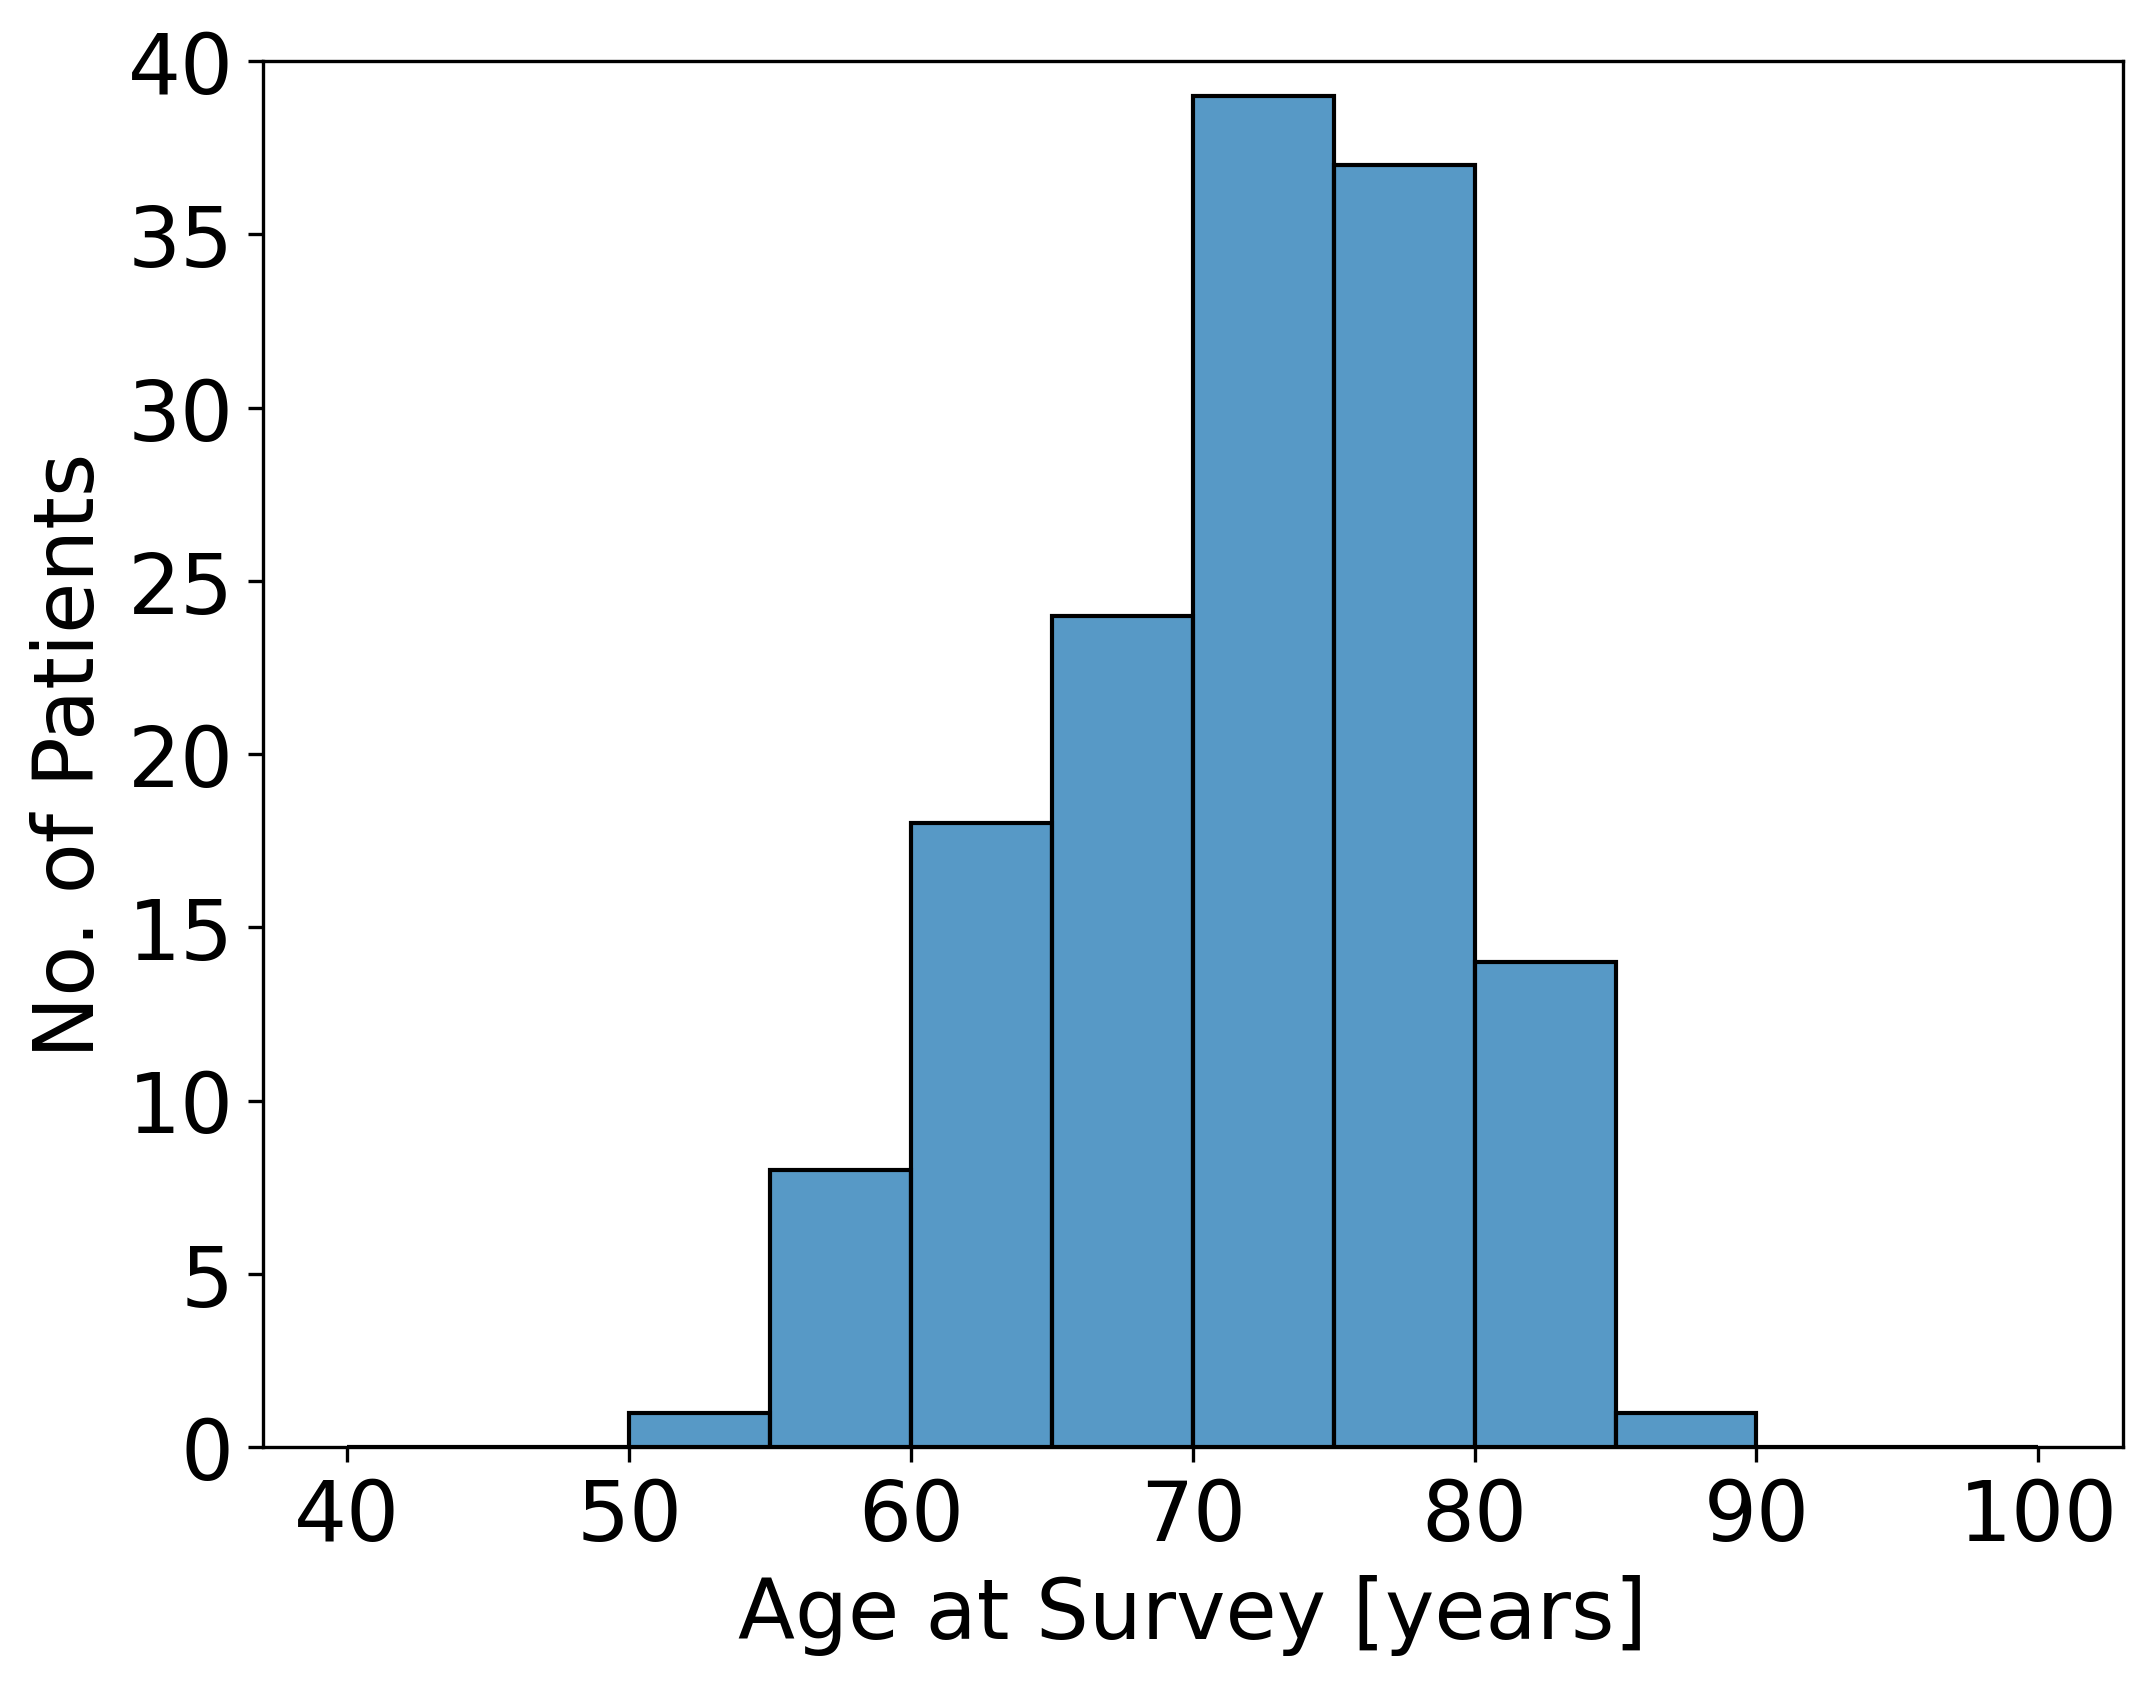

In [6]:
age_at_survey_training_plot = sns.histplot(training_set["Age_at_Survey"], binwidth=5, binrange=(40, 100))
age_at_survey_training_plot.set(
    xlabel="Age at Survey [years]", ylabel="No. of Patients"
)
age_at_survey_training_plot.set(ylim=(0, 40))

plt.show
plt.savefig("plots/age_at_survey_training_plot.png", bbox_inches='tight')

### Test set

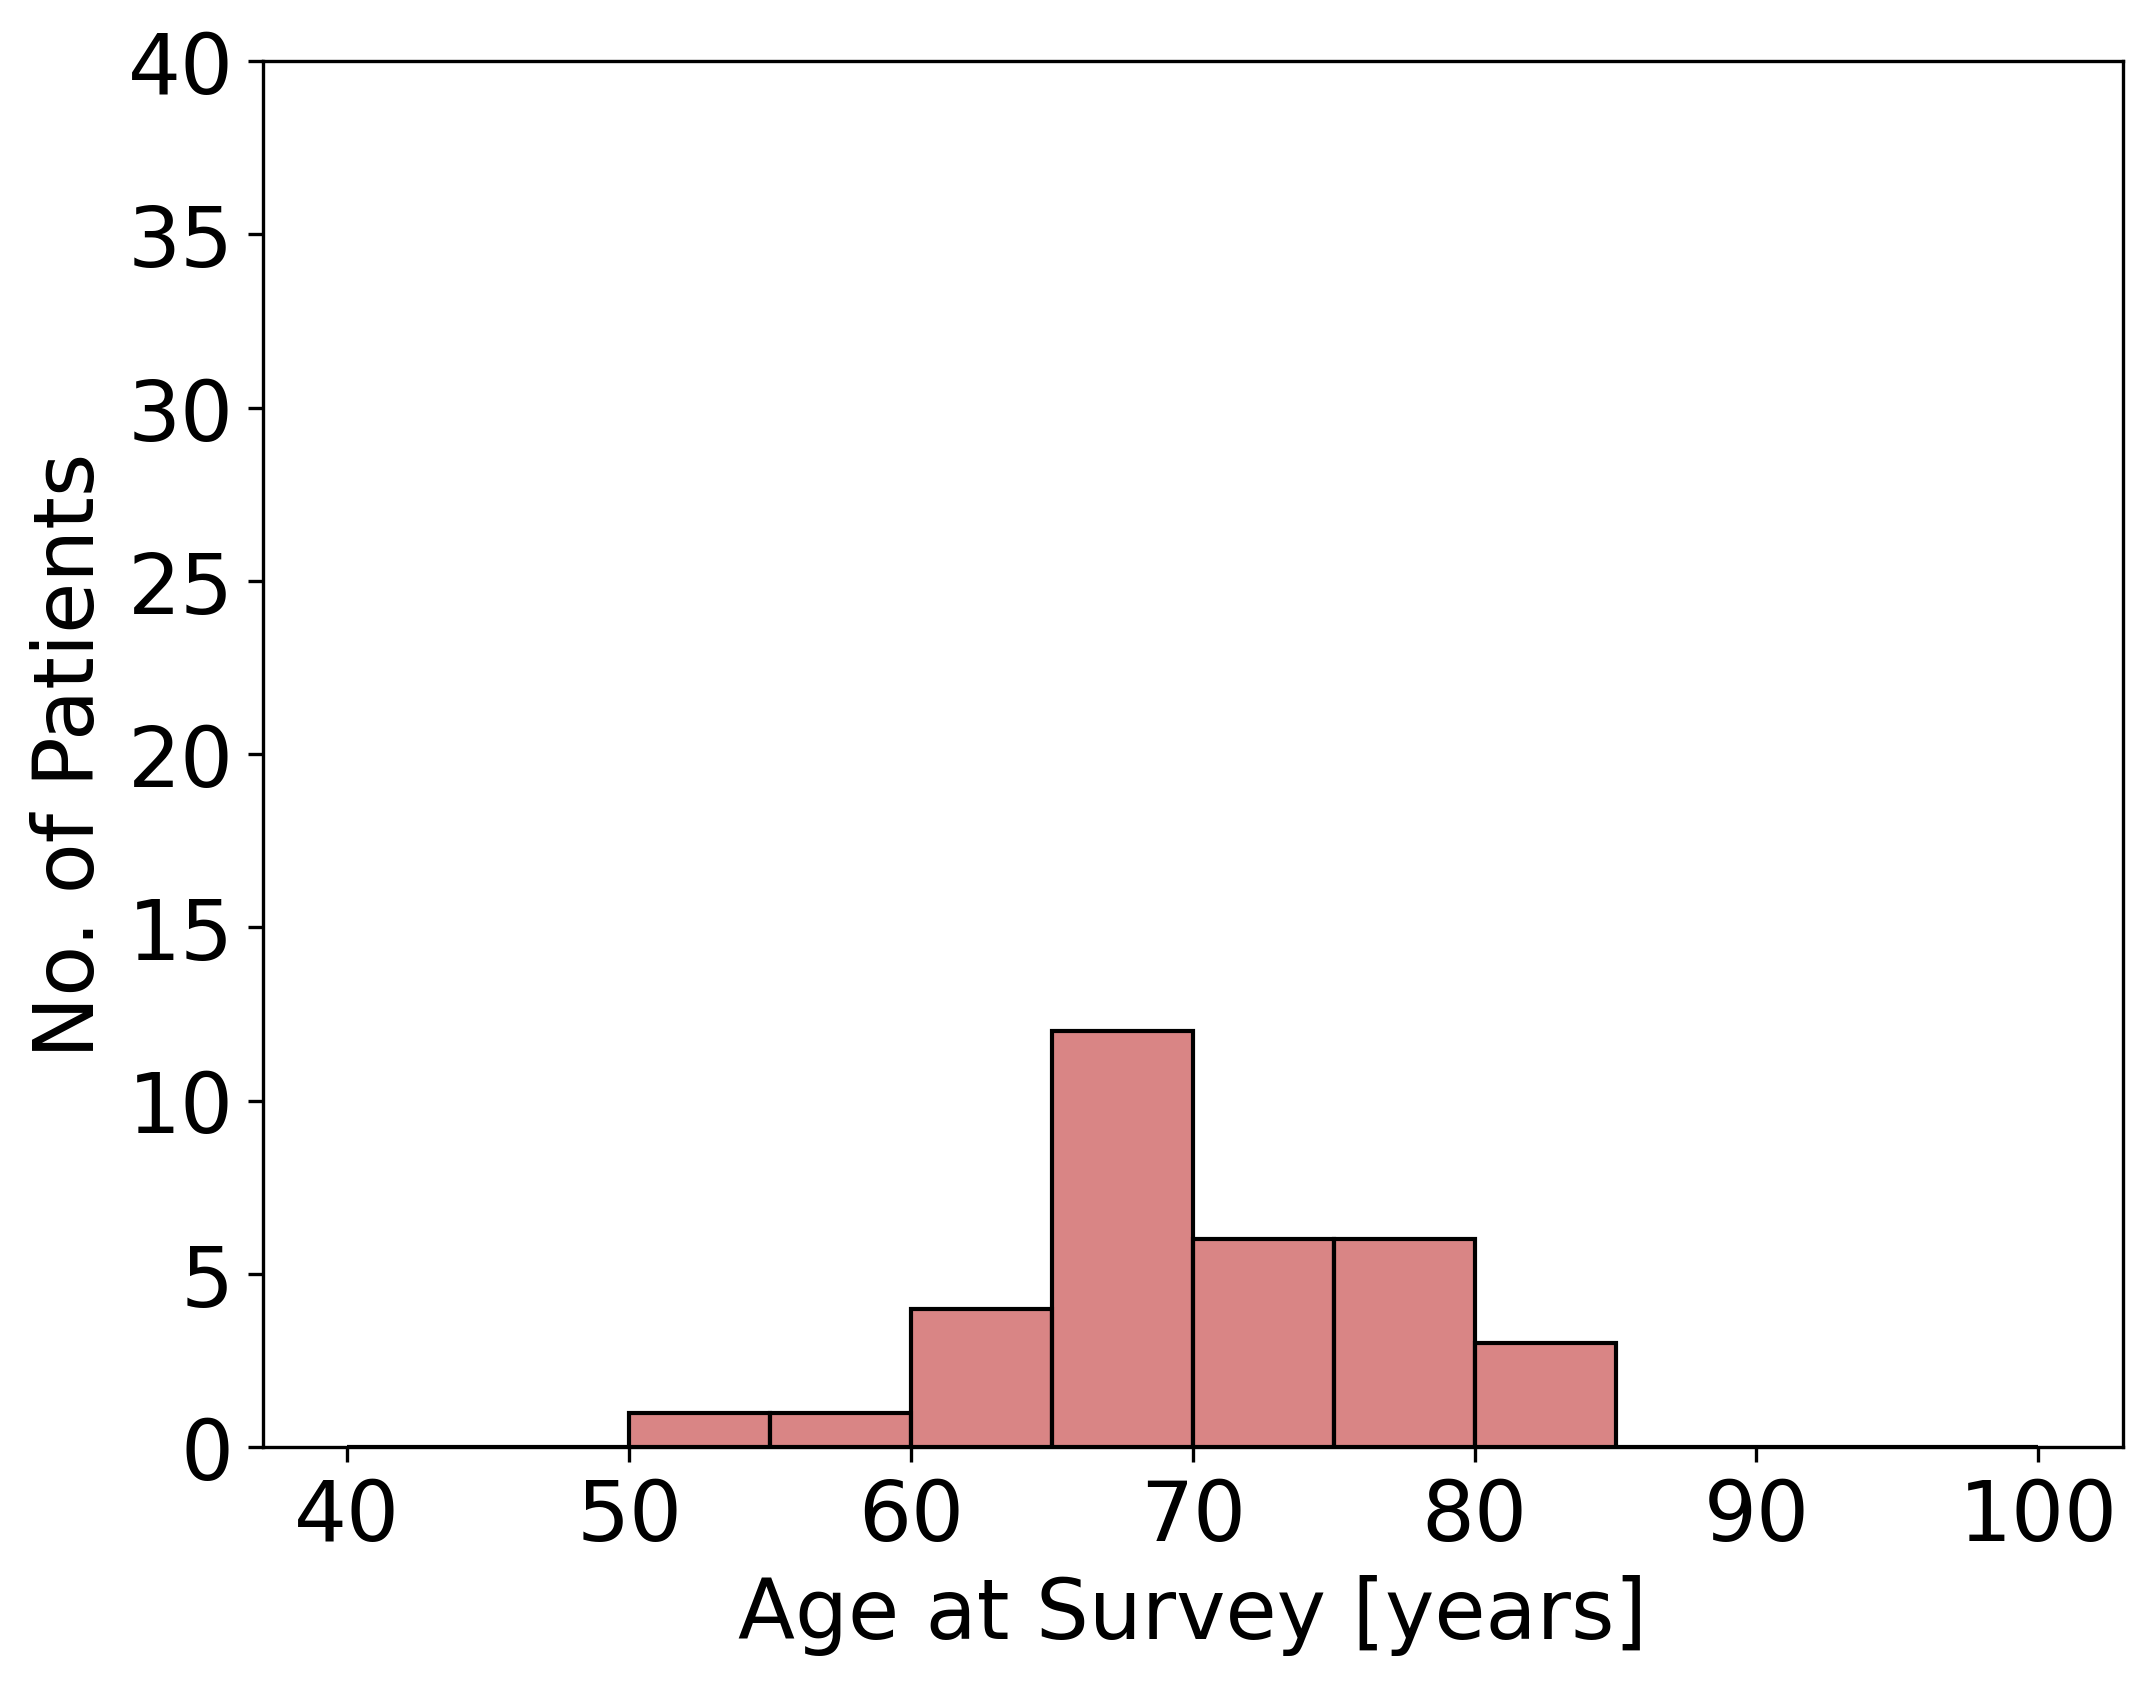

In [7]:
age_at_survey_test_plot = sns.histplot(test_set["Age_at_Survey"], binwidth=5, binrange=(40, 100), color="indianred")
age_at_survey_test_plot.set(
    xlabel="Age at Survey [years]", ylabel="No. of Patients"
)
age_at_survey_test_plot.set(ylim=(0, 40))

plt.show
plt.savefig("plots/age_at_survey_test_plot.png", bbox_inches='tight')

## IPSS scores

### Training set

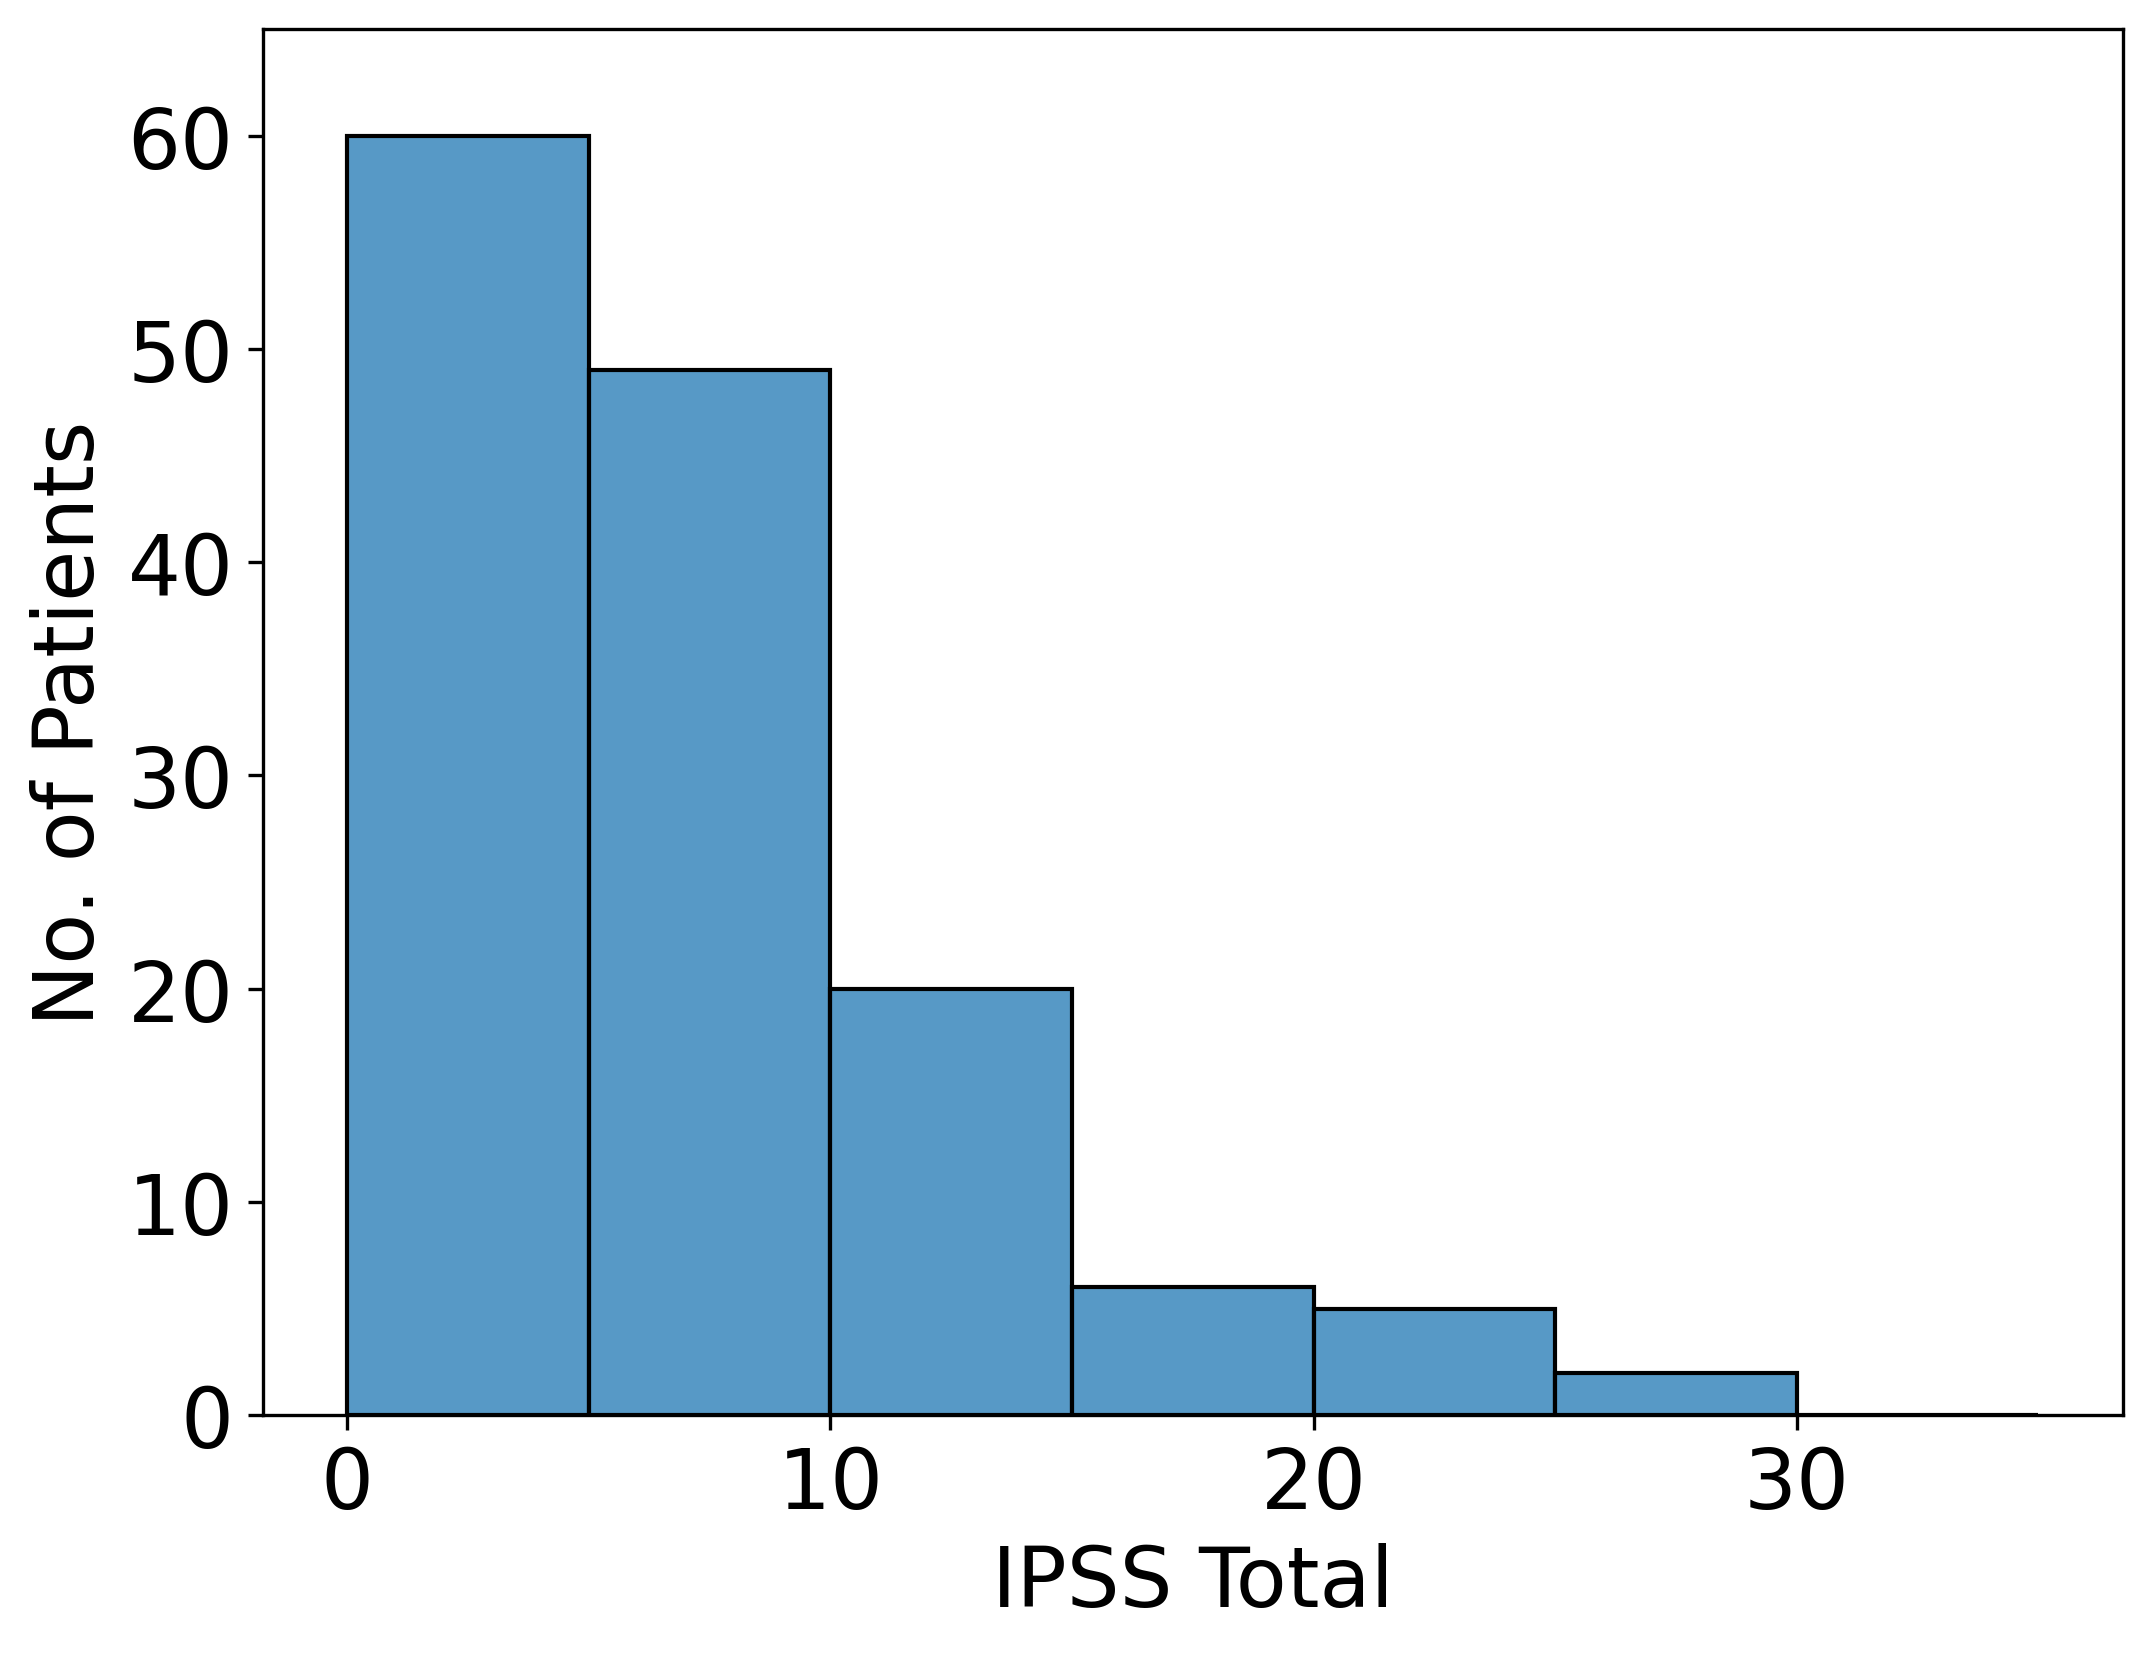

In [8]:
ipss_training_plot = sns.histplot(training_set["IPSS_Total"], binwidth=5, binrange=(0, 35))
ipss_training_plot.set(
    xlabel="IPSS Total", ylabel="No. of Patients"
)
ipss_training_plot.set(ylim=(0, 65))

plt.rcParams["figure.figsize"] = (8,6)
plt.show
plt.savefig("plots/ipss_training_plot.png", bbox_inches='tight')

### Test set

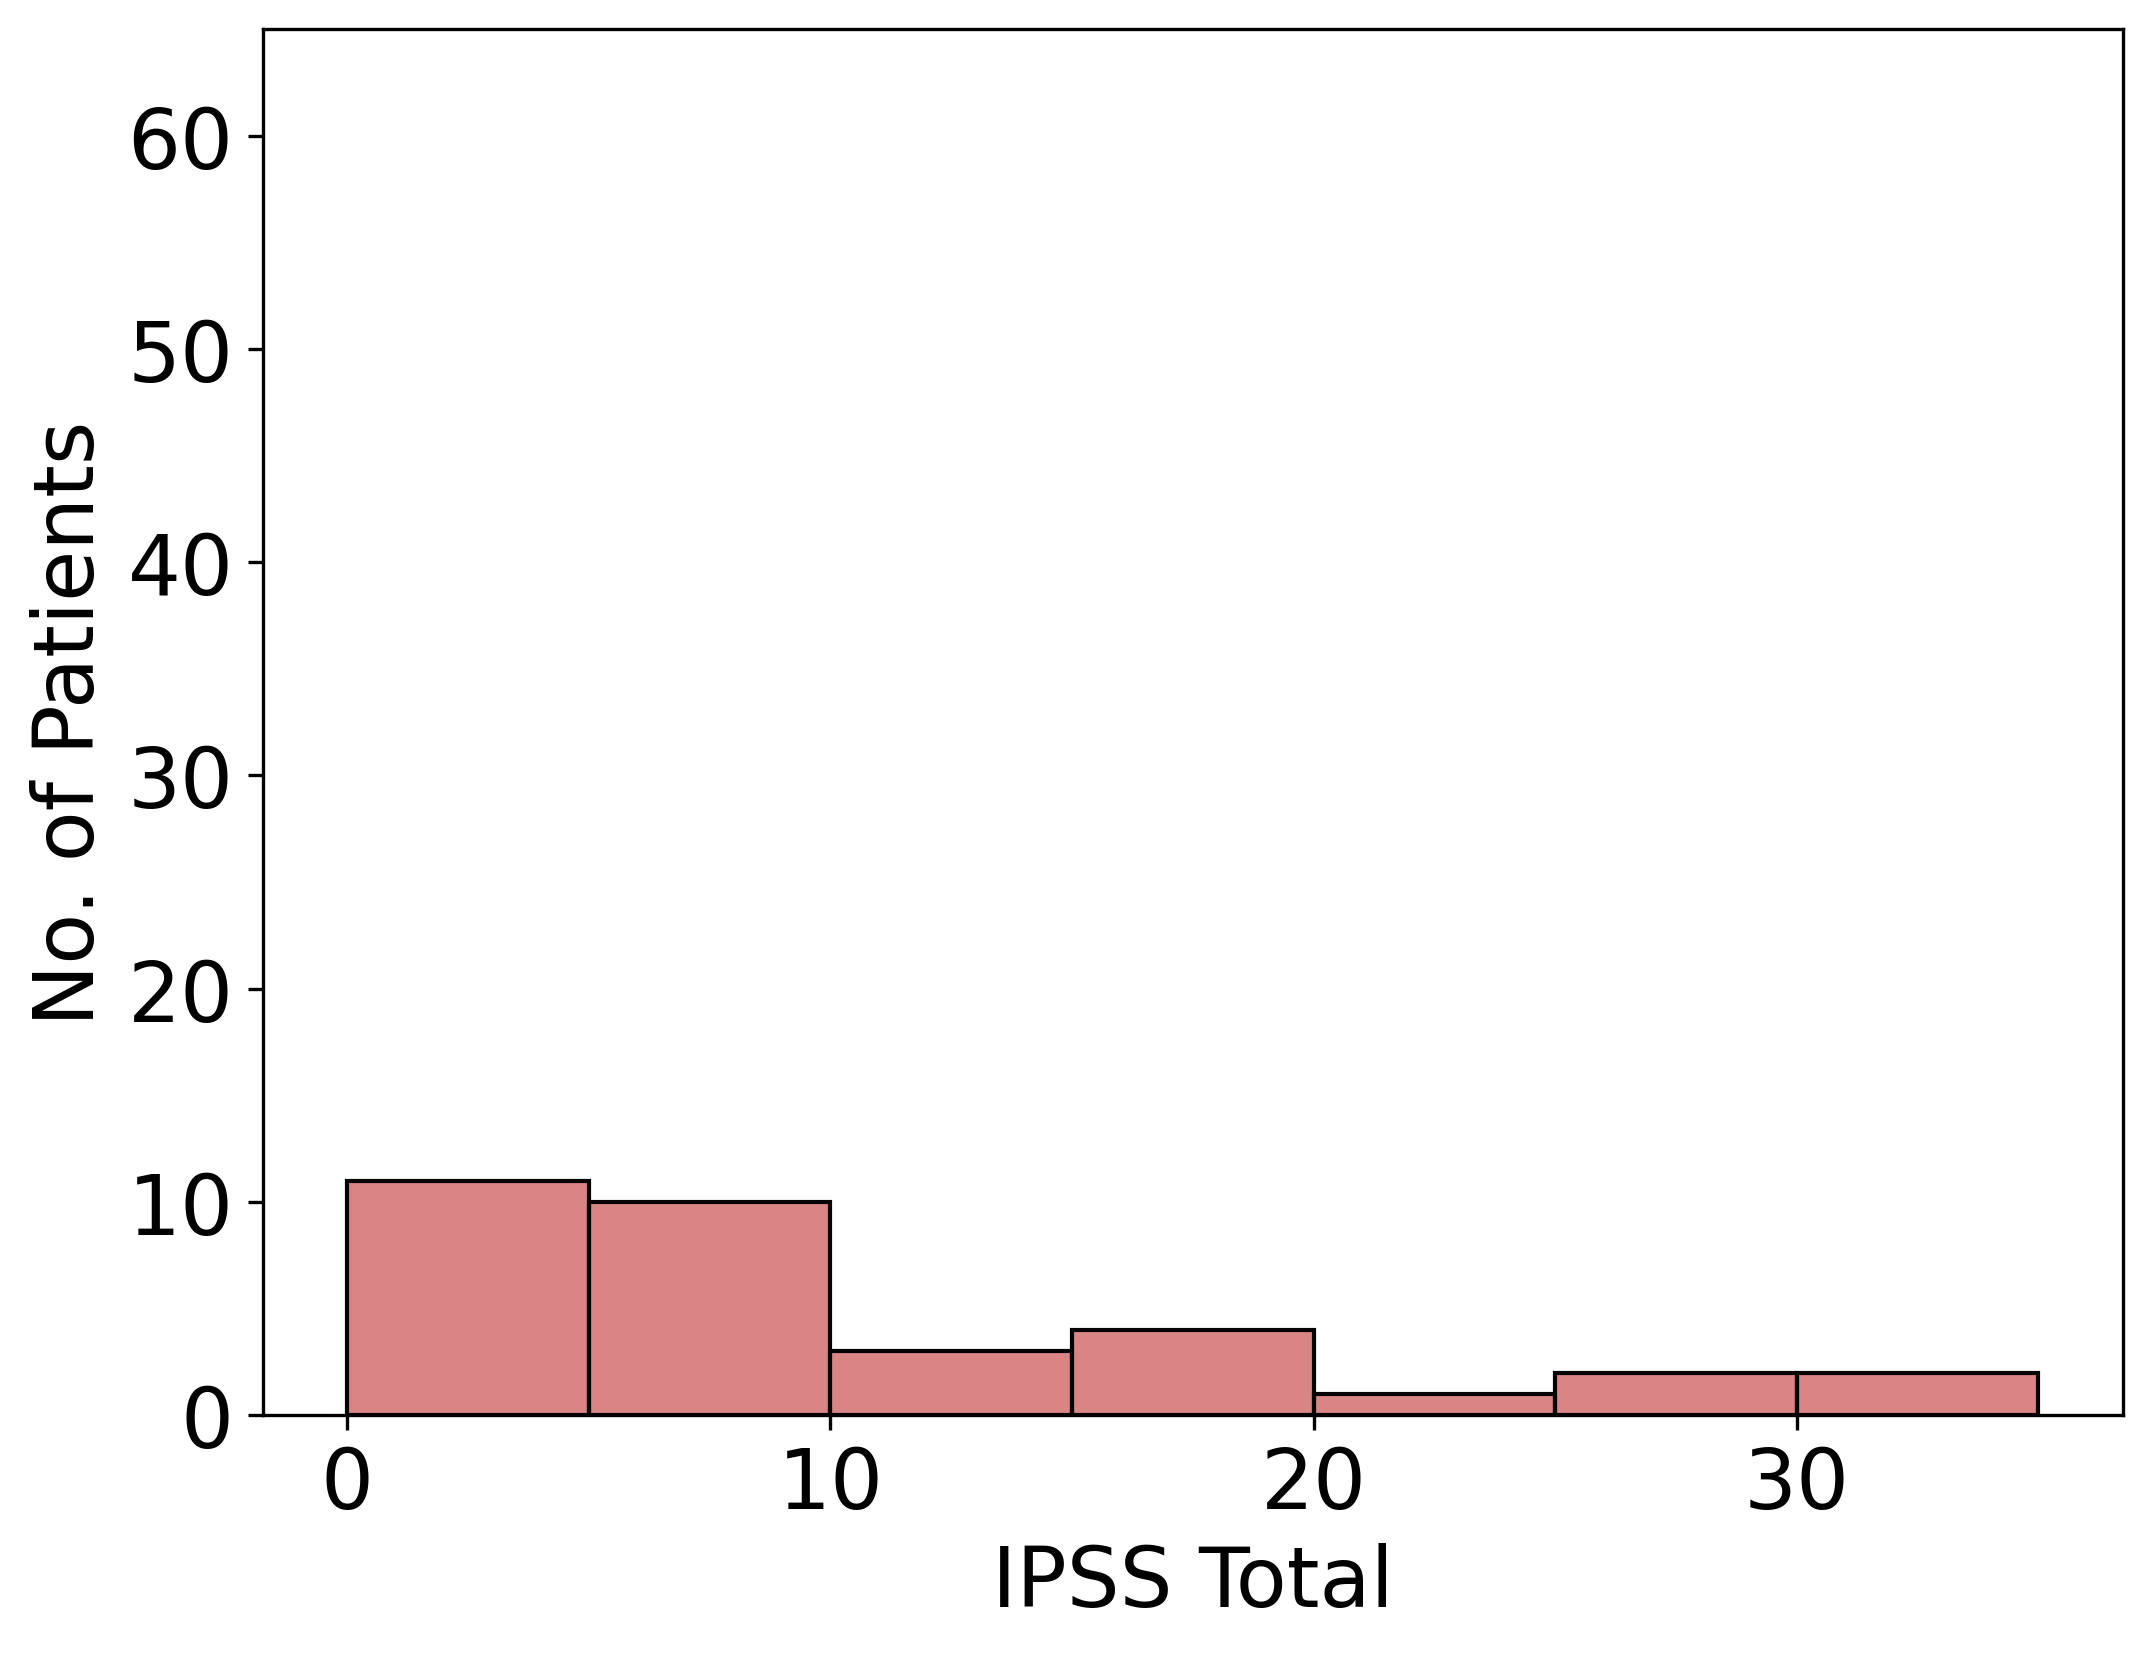

In [9]:
ipss_test_plot = sns.histplot(test_set["IPSS_Total"], binwidth=5, binrange=(0, 35), color="indianred")
ipss_test_plot.set(
    xlabel="IPSS Total", ylabel="No. of Patients"
)
ipss_test_plot.set(ylim=(0, 65))

plt.show
plt.savefig("plots/ipss_test_plot.png", bbox_inches='tight')

## EPIC urinary summary

### Training set

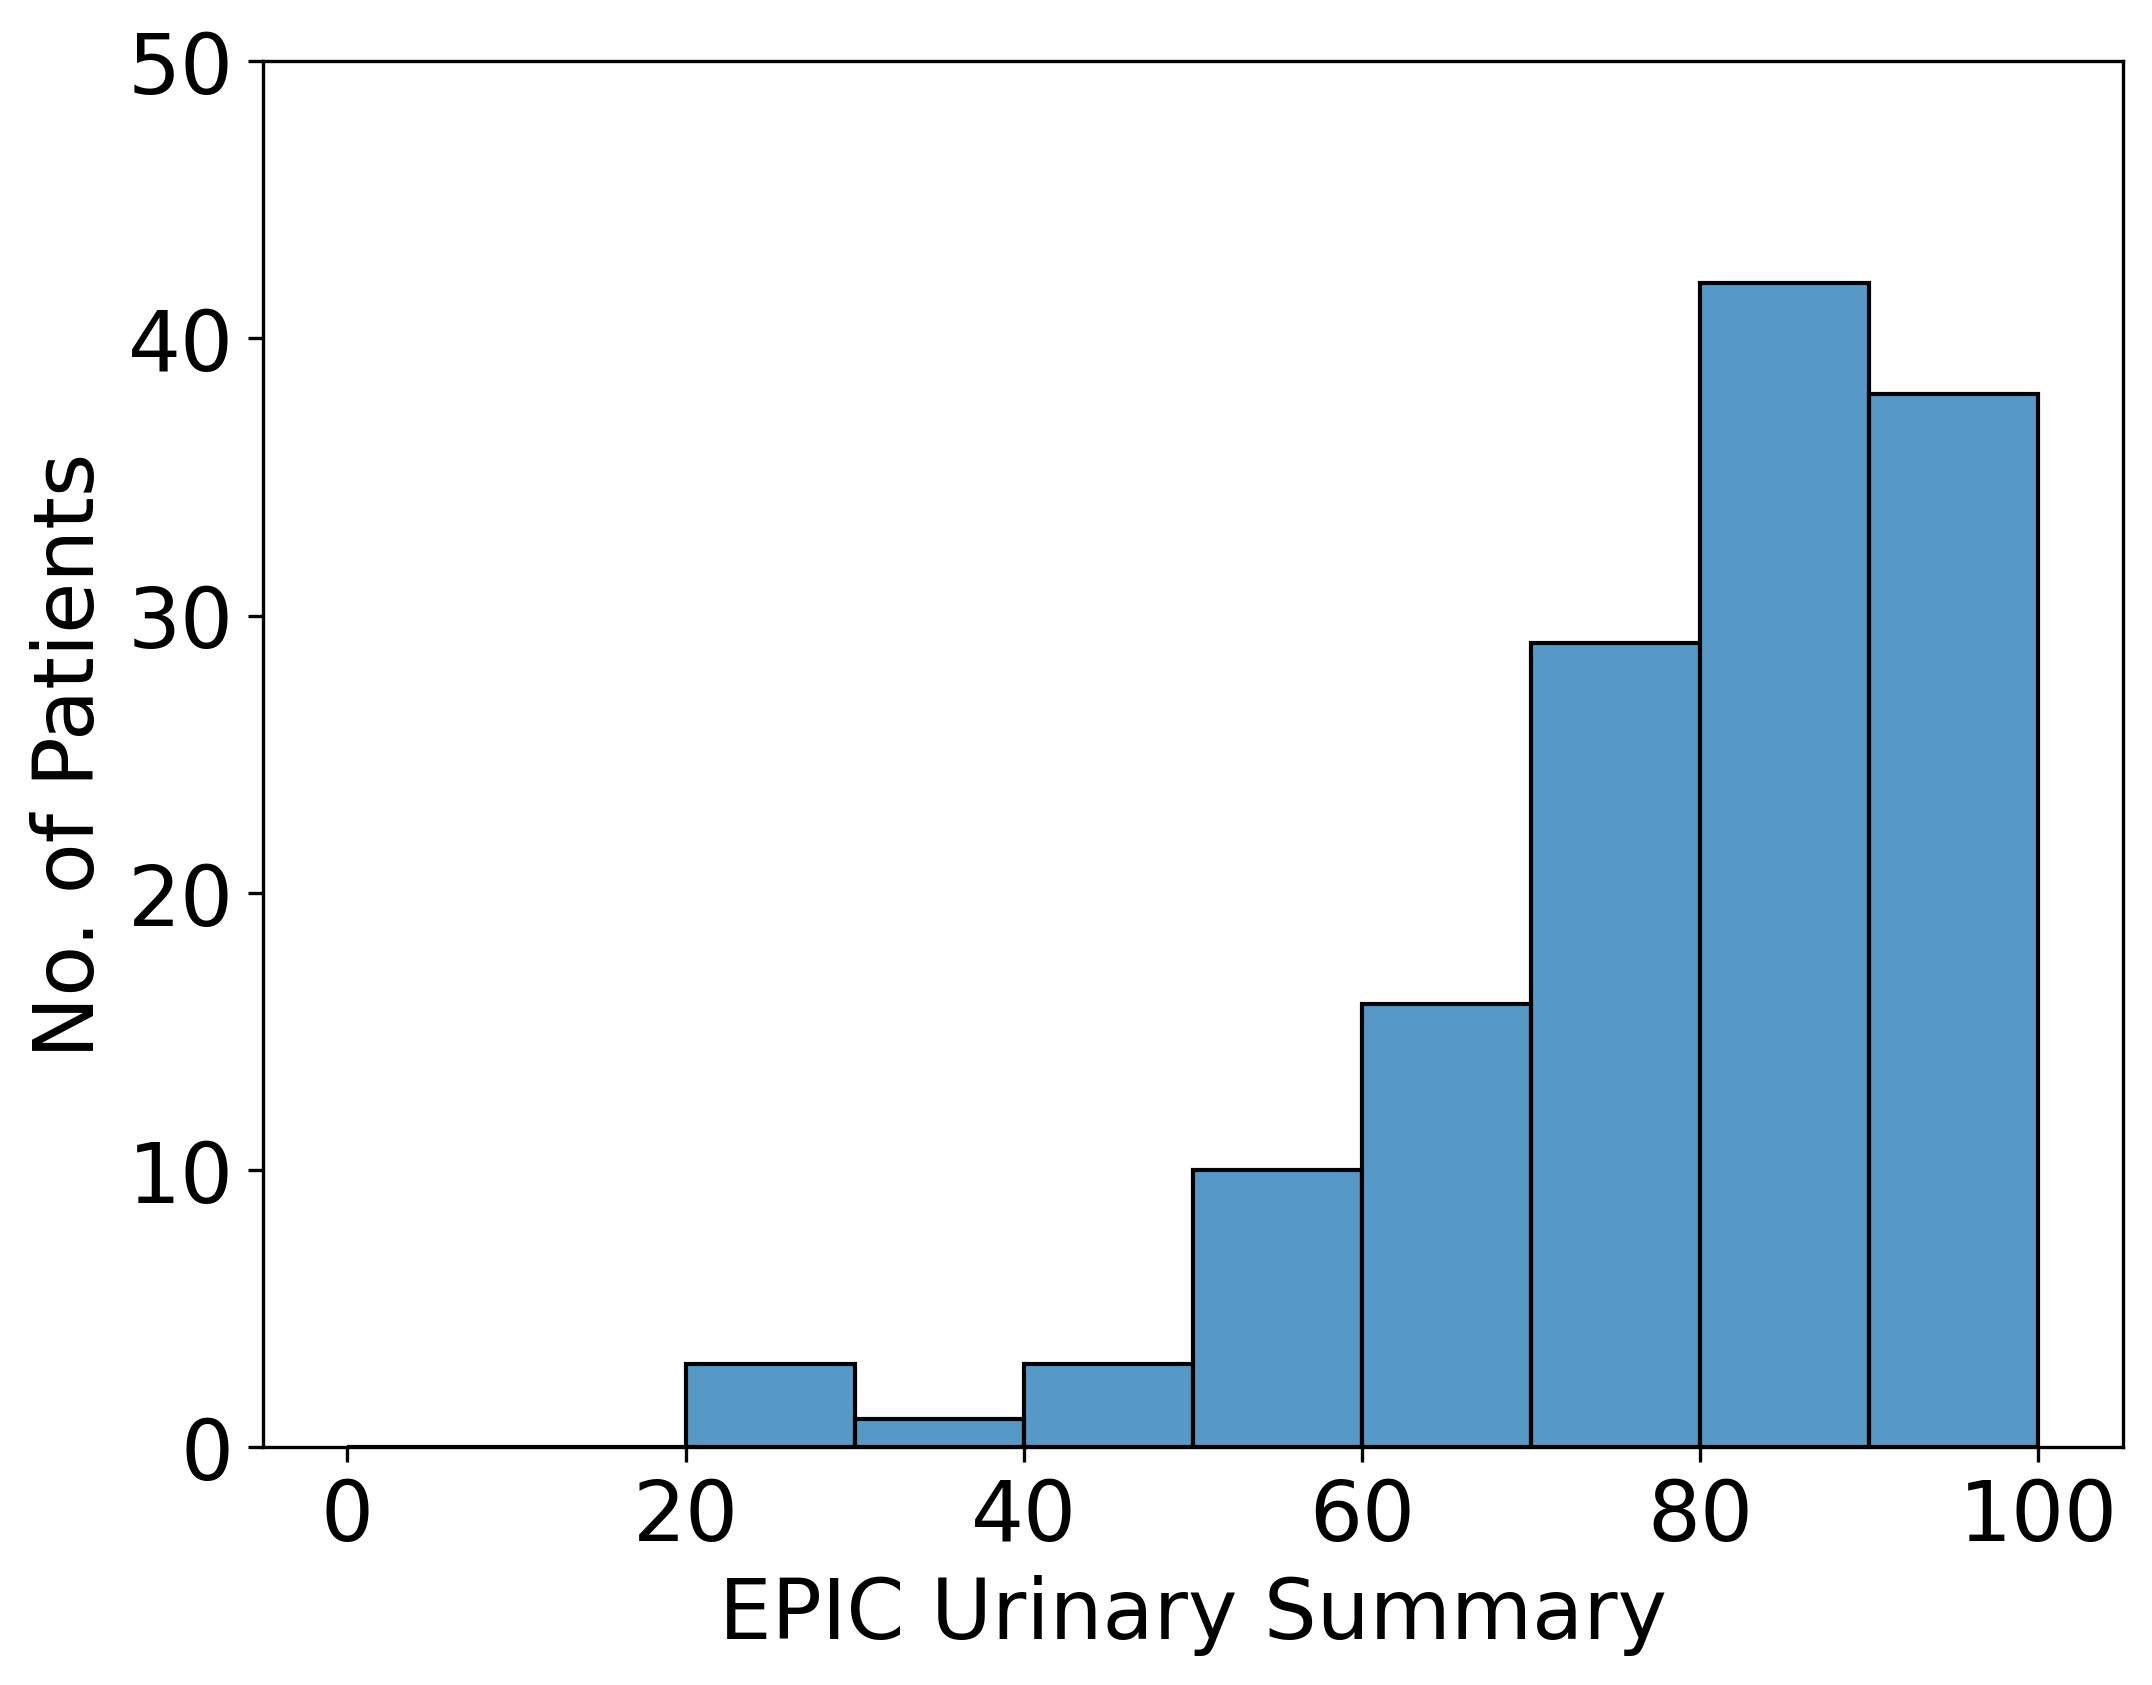

In [10]:
epic_summary_training_plot = sns.histplot(training_set["Urinary_Summary"], binwidth=10, binrange=(0, 100))
epic_summary_training_plot.set(
    xlabel="EPIC Urinary Summary", ylabel="No. of Patients"
)
epic_summary_training_plot.set(ylim=(0, 50))

plt.show
plt.savefig("plots/epic_summary_training_plot.png", bbox_inches='tight')

### Test set

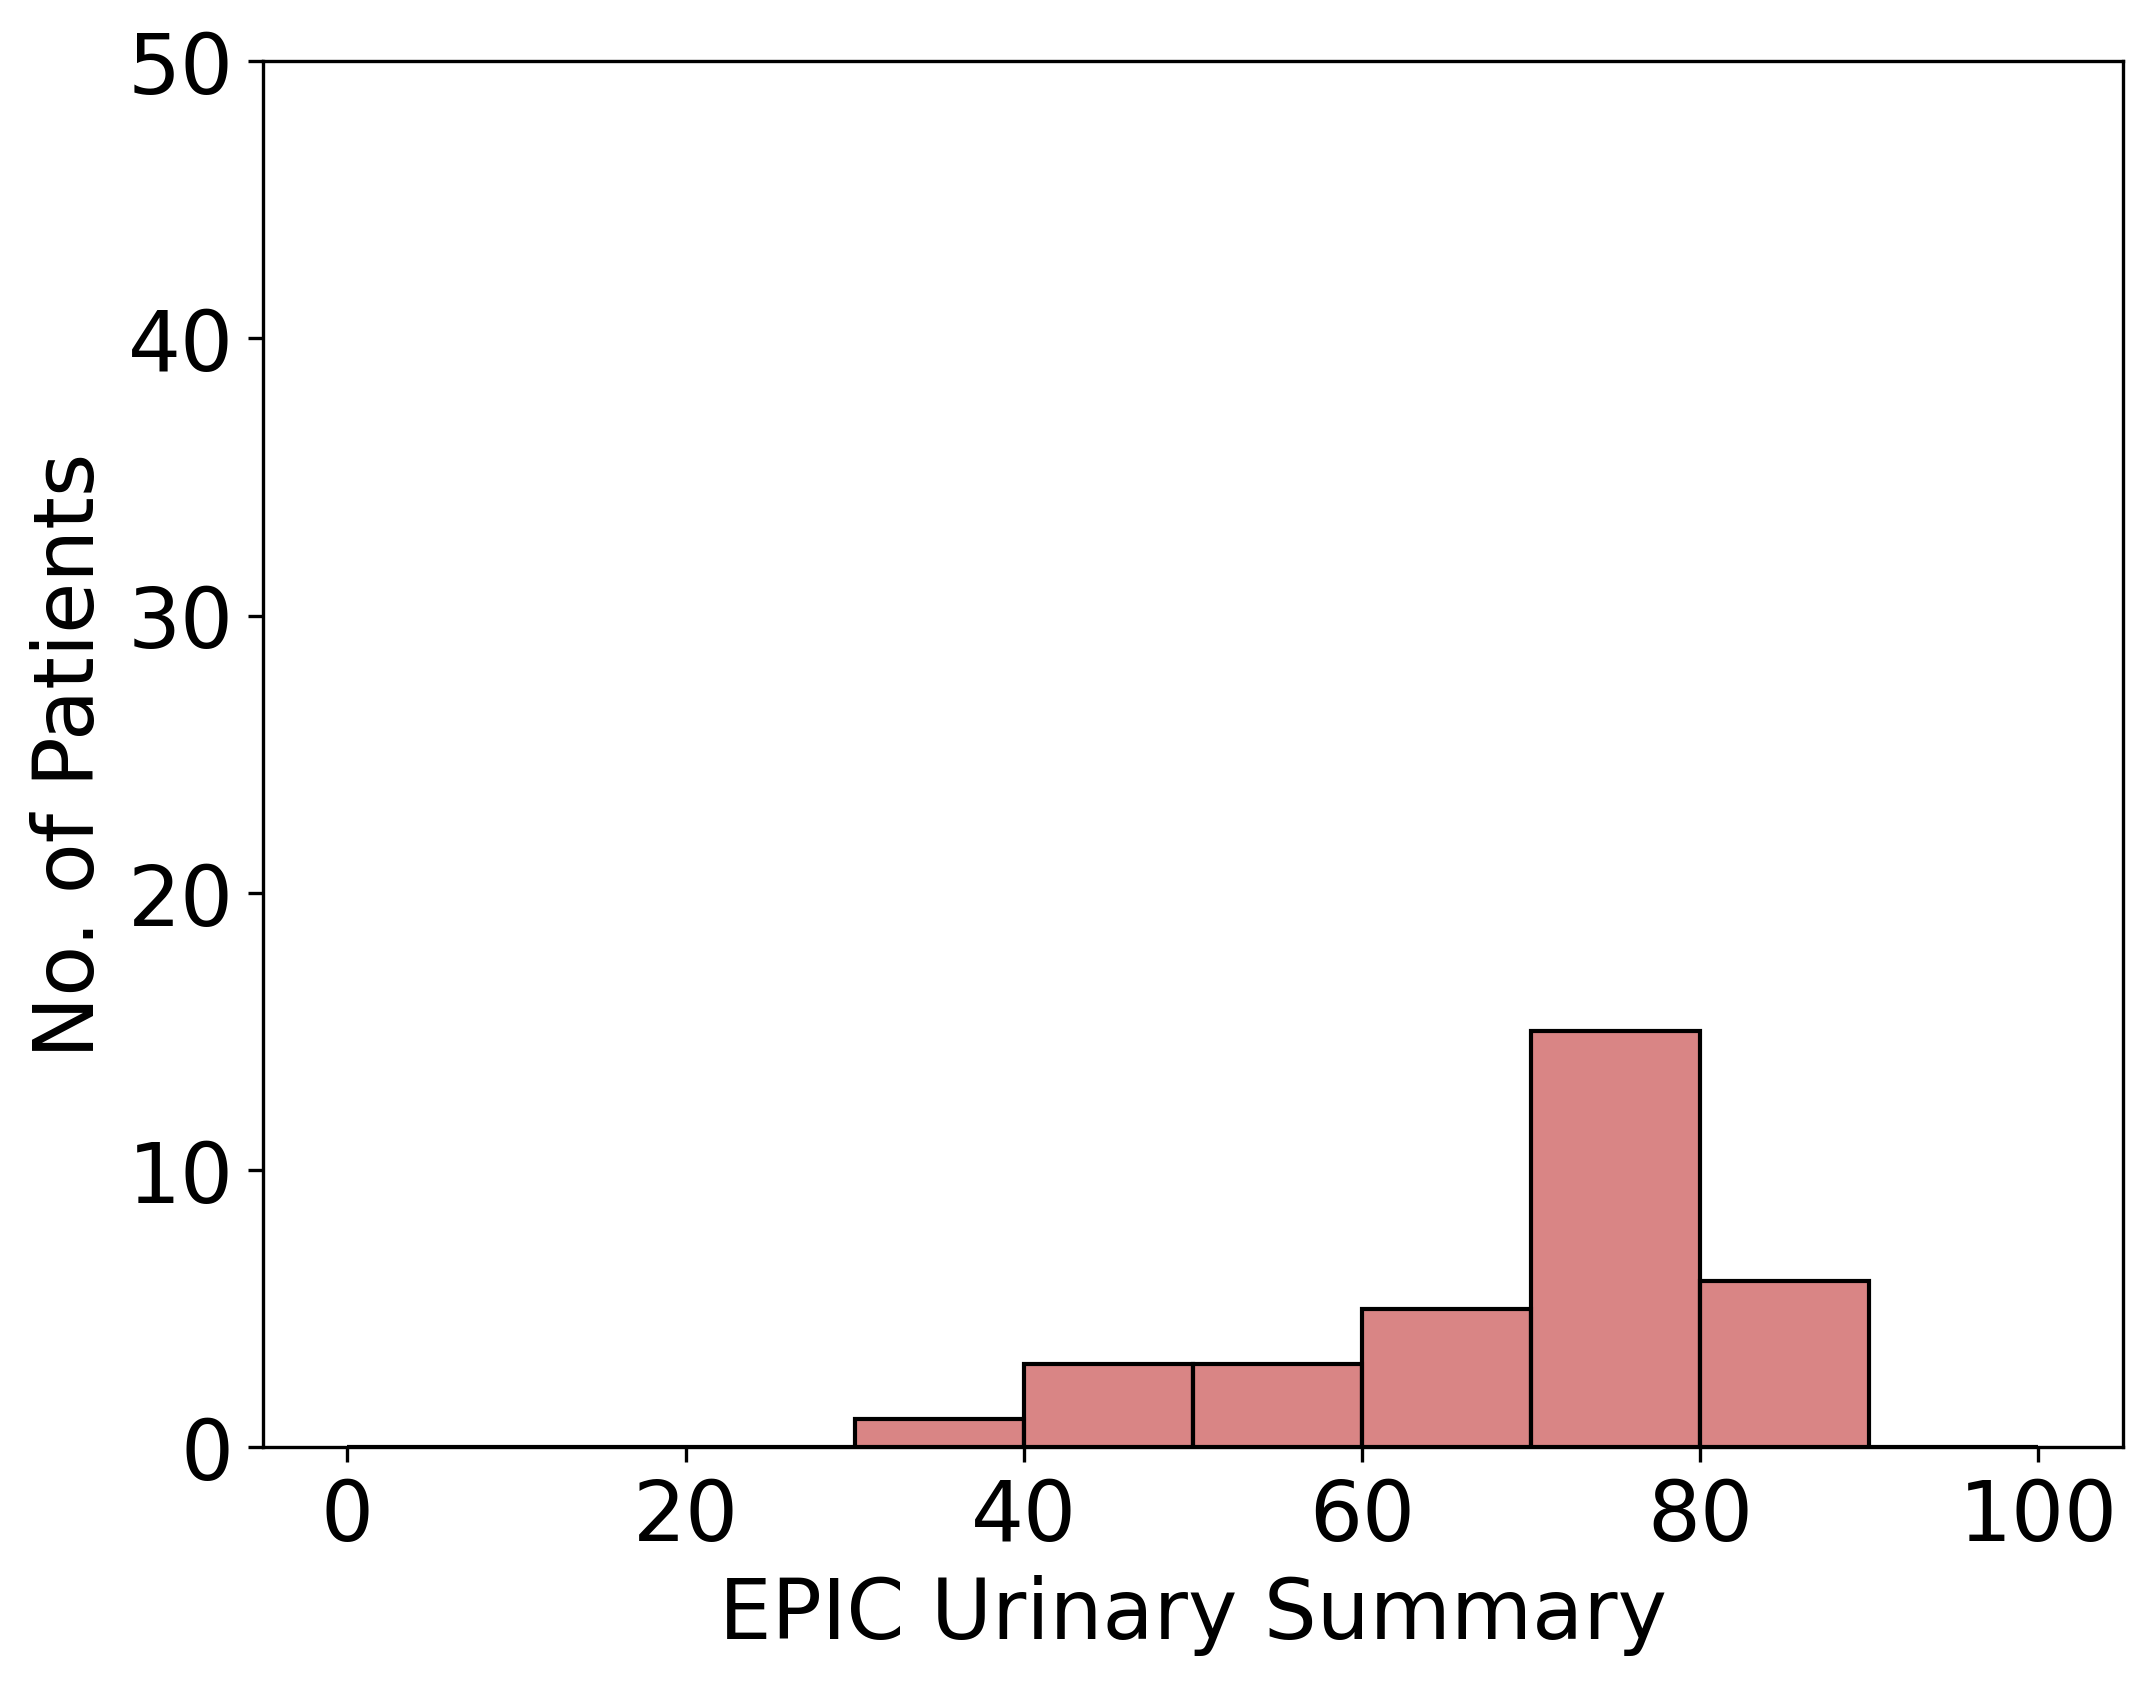

In [11]:
epic_summary_test_plot = sns.histplot(test_set["Urinary_Summary"], binwidth=10, binrange=(0, 100), color="indianred")
epic_summary_test_plot.set(
    xlabel="EPIC Urinary Summary", ylabel="No. of Patients"
)
epic_summary_test_plot.set(ylim=(0, 50))

plt.show
plt.savefig("plots/epic_summary_test_plot.png", bbox_inches='tight')

## EPIC urinary irritative/obstructive

### Training set

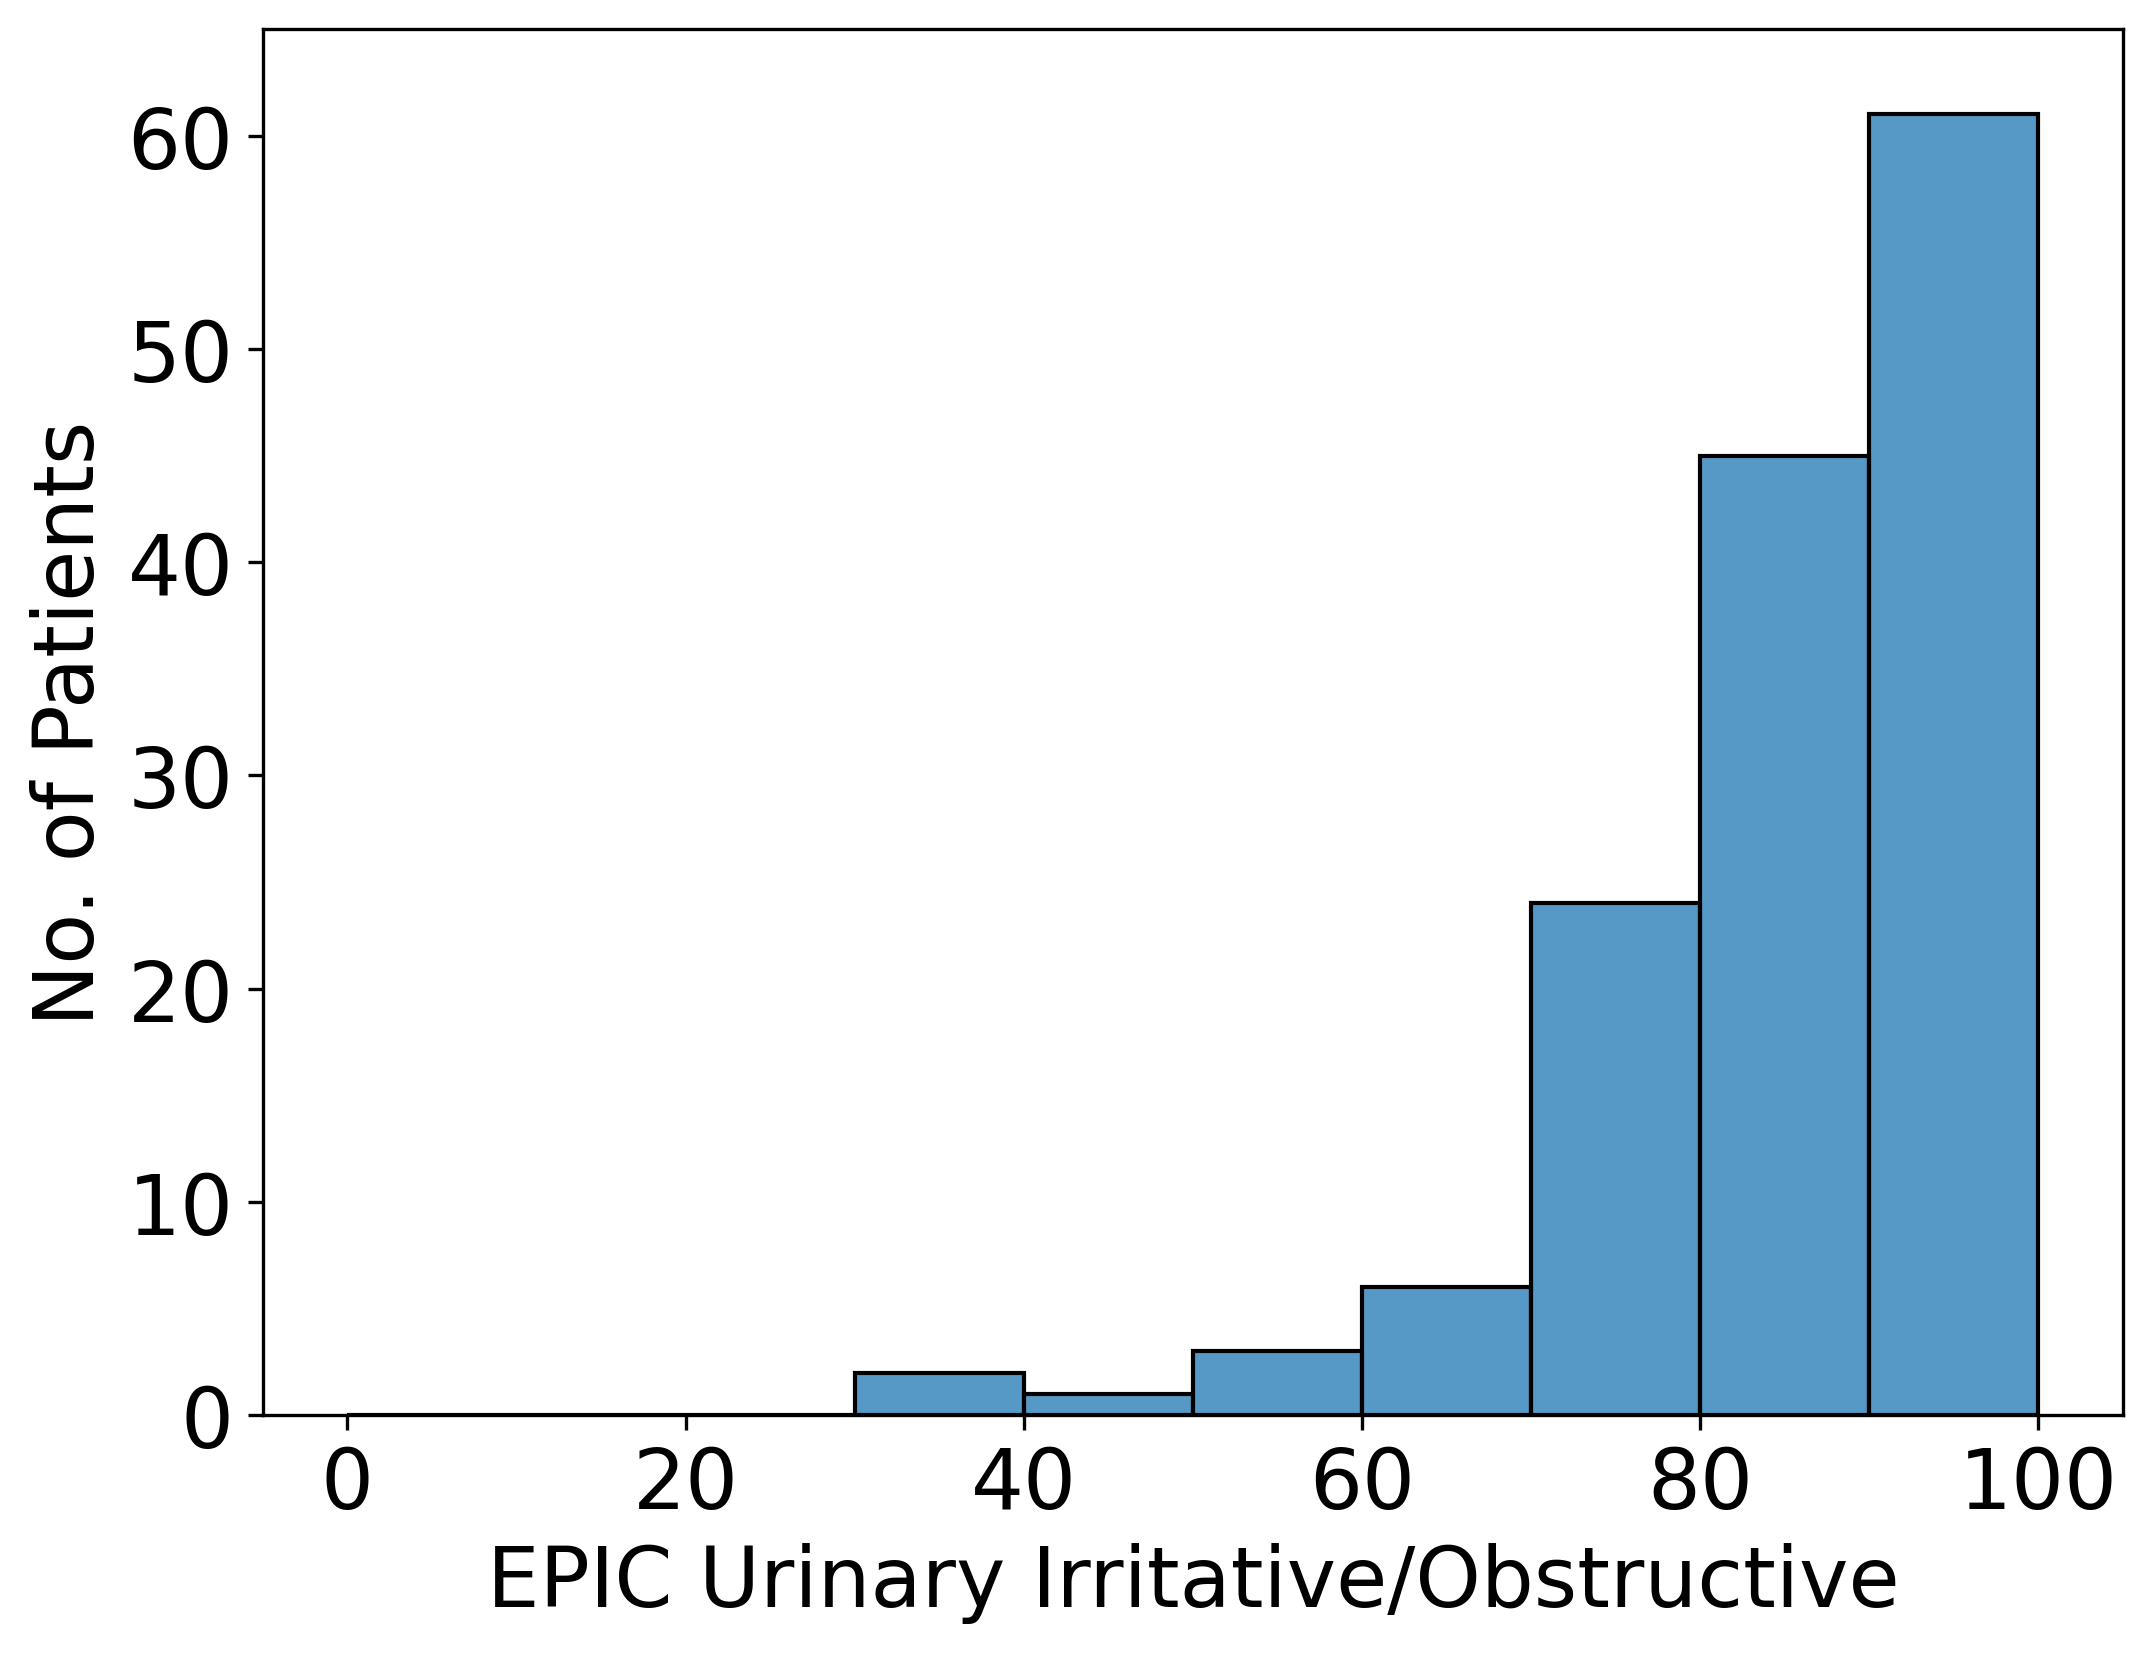

In [12]:
epic_irritative_obstructive_training_plot = sns.histplot(training_set["Urinary_Irritative_Obstructive"], binwidth=10, binrange=(0, 100))
epic_irritative_obstructive_training_plot.set(
    xlabel="EPIC Urinary Irritative/Obstructive", ylabel="No. of Patients"
)
epic_irritative_obstructive_training_plot.set(ylim=(0, 65))

plt.show
plt.savefig("plots/epic_irritative_obstructive_training_plot.png", bbox_inches='tight')

### Test set

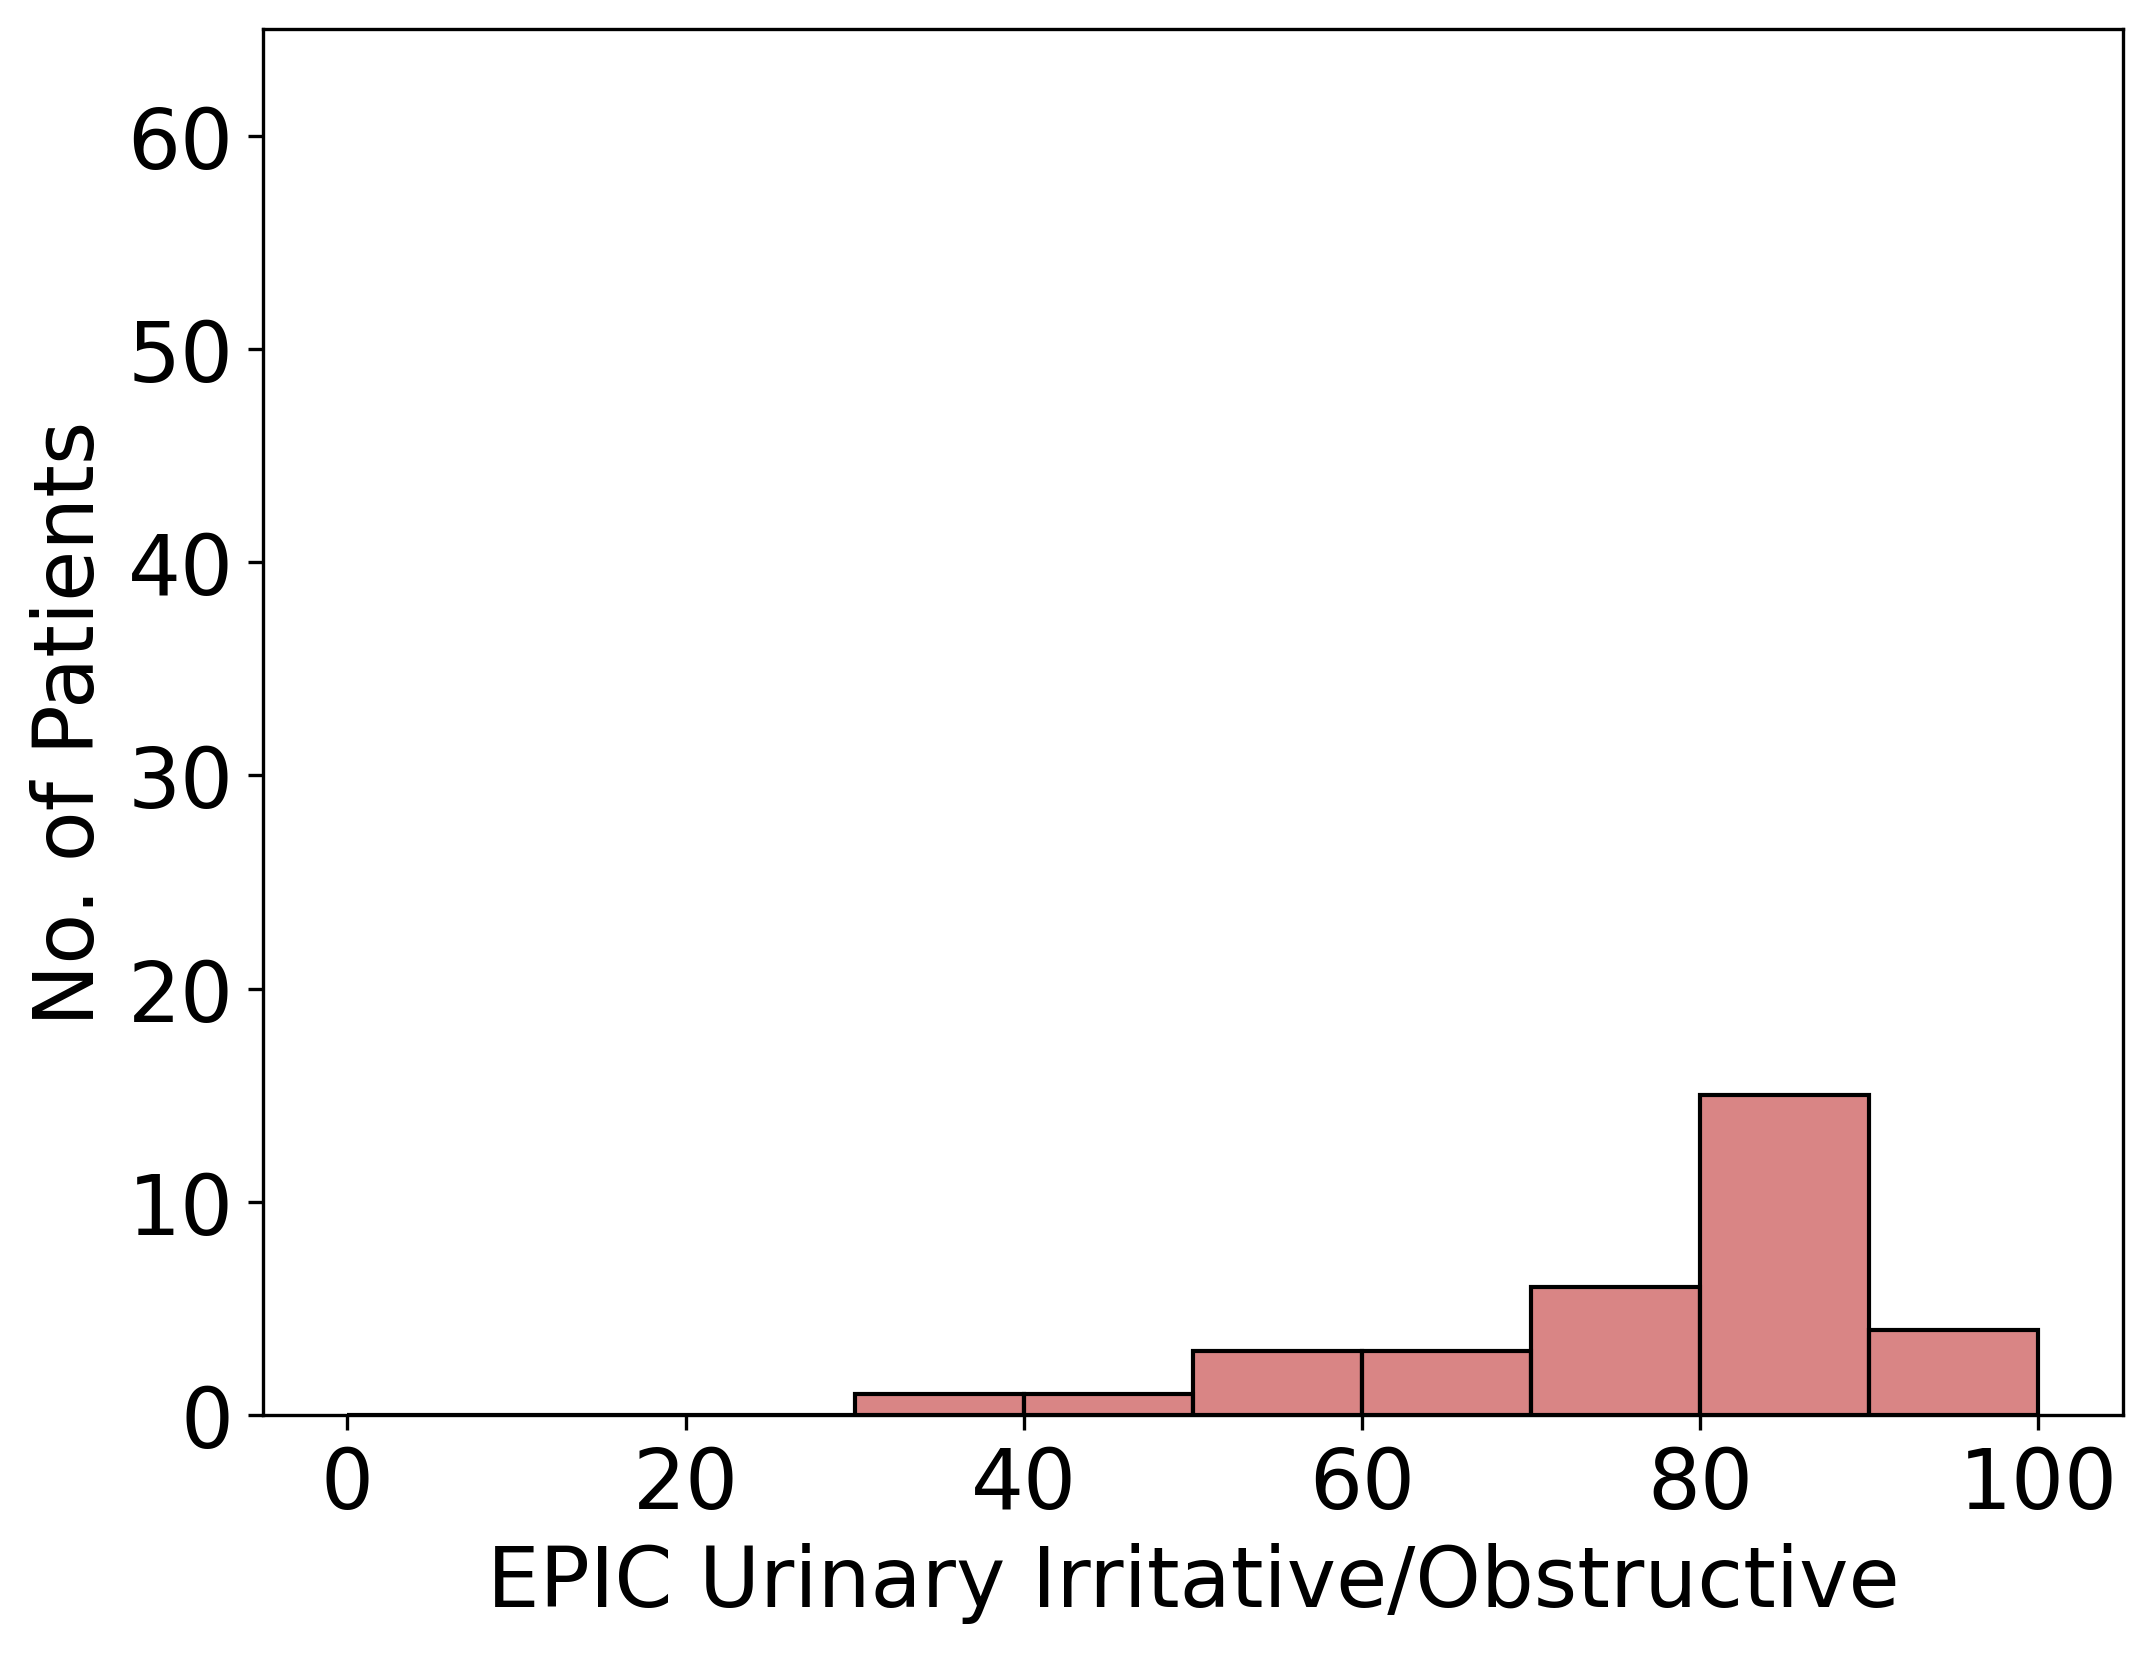

In [13]:
epic_irritative_obstructive_test_plot = sns.histplot(test_set["Urinary_Irritative_Obstructive"], binwidth=10, binrange=(0, 100), color="indianred")
epic_irritative_obstructive_test_plot.set(
    xlabel="EPIC Urinary Irritative/Obstructive", ylabel="No. of Patients"
)
epic_irritative_obstructive_test_plot.set(ylim=(0, 65))

plt.show
plt.savefig("plots/epic_irritative_obstructive_test_plot.png", bbox_inches='tight')

## Correlation between IPSS and EPIC urinary summary

### Training set

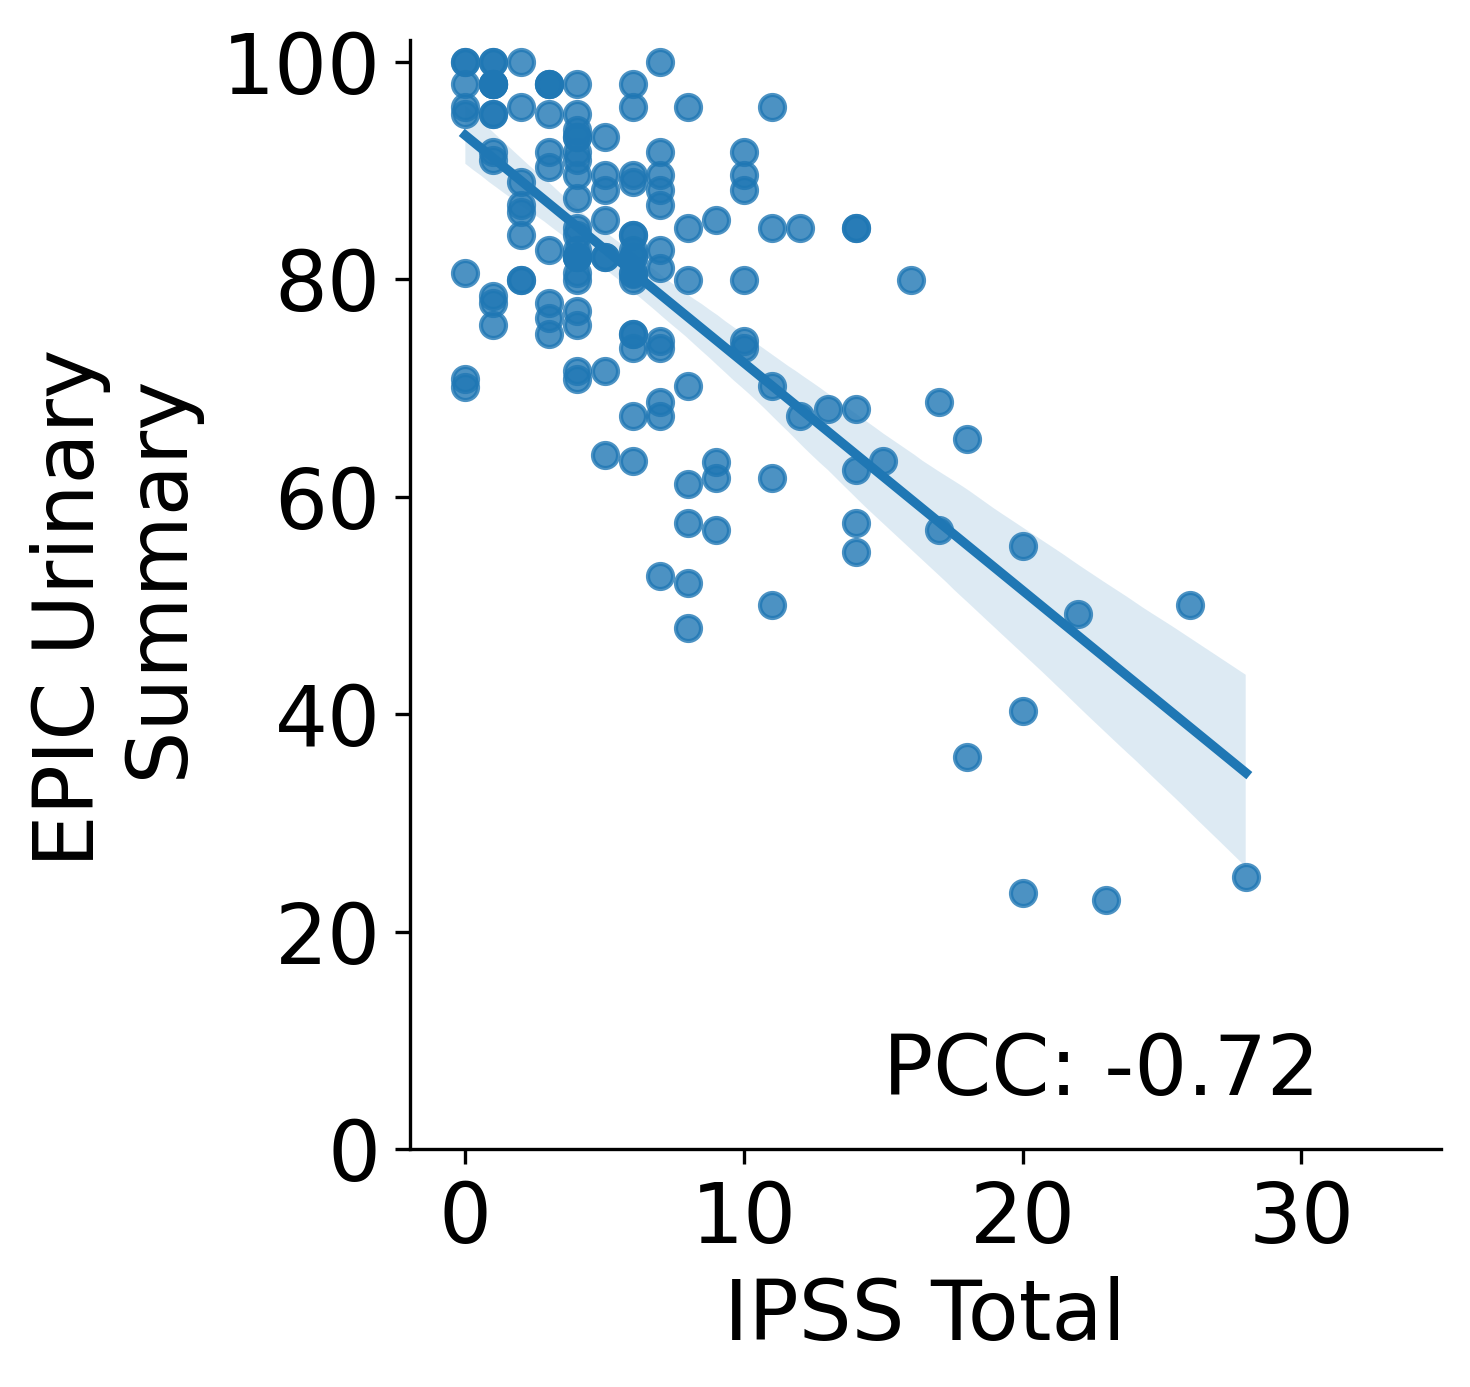

In [14]:
epic_summary_ipss_training_plot = sns.lmplot(data=training_set, x="IPSS_Total", y="Urinary_Summary")
epic_summary_ipss_training_plot.set(
    xlabel="IPSS Total", ylabel="EPIC Urinary \n Summary"
)
epic_summary_ipss_training_plot.set(xlim=(-2, 35), ylim=(0, 102))

# Calculate and plot correlation coefficient
(
    r_epic_summary_ipss_training,
    p_epic_summary_ipss_training,
) = sp.stats.pearsonr(x=training_set["IPSS_Total"], y=training_set["Urinary_Summary"])
plt.text(15,5,f"PCC: {r_epic_summary_ipss_training:.2f}")

plt.show
plt.savefig("plots/epic_summary_ipss_training_plot.png", bbox_inches='tight')

### Test set

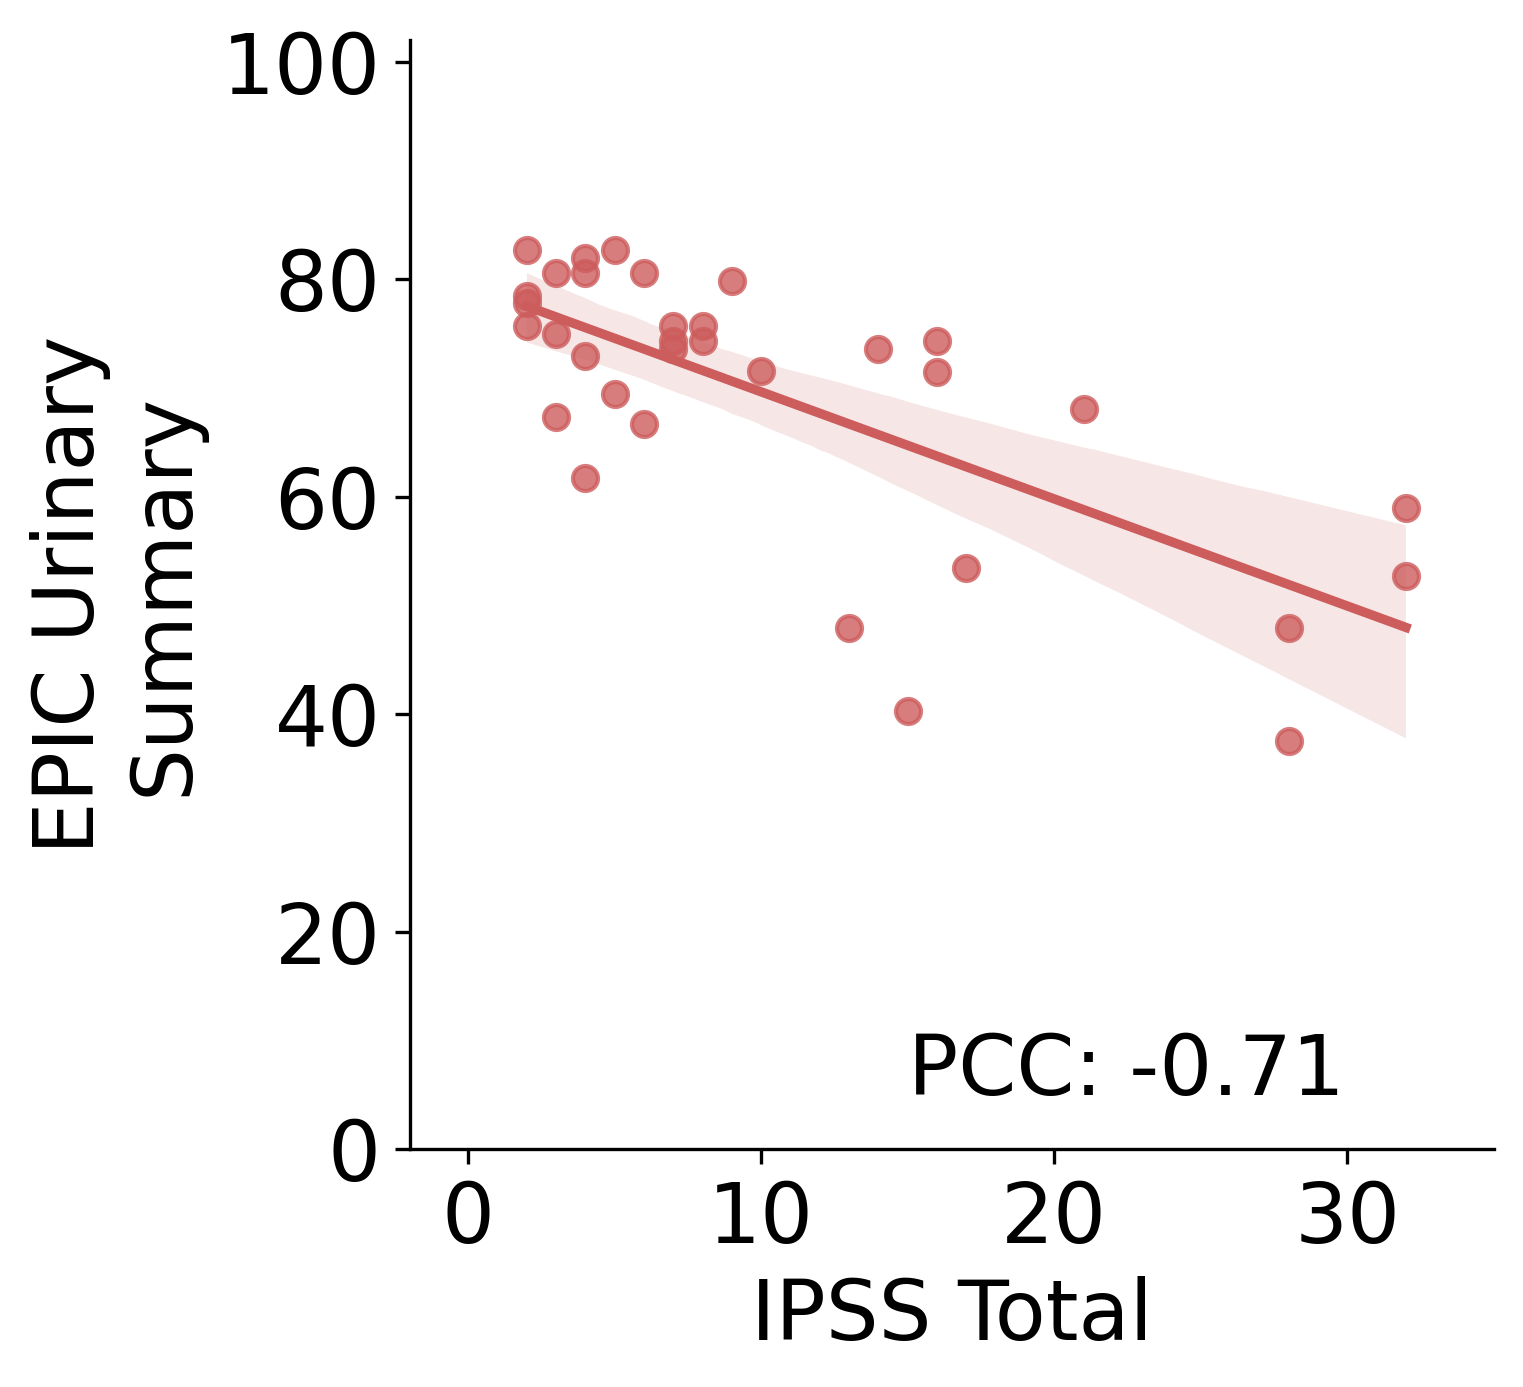

In [15]:
epic_summary_ipss_test_plot = sns.lmplot(data=test_set, x="IPSS_Total", y="Urinary_Summary", scatter_kws={'color': 'indianred'}, line_kws={'color': 'indianred'})
epic_summary_ipss_test_plot.set(
    xlabel="IPSS Total", ylabel="EPIC Urinary\nSummary"
)
epic_summary_ipss_test_plot.set(xlim=(-2, 35), ylim=(0, 102))

# Calculate and plot correlation coefficient
(
    r_epic_summary_ipss_test,
    p_epic_summary_ipss_test,
) = sp.stats.pearsonr(x=test_set["IPSS_Total"], y=test_set["Urinary_Summary"])
plt.text(15,5,f"PCC: {r_epic_summary_ipss_test:.2f}")

plt.show
plt.savefig("plots/epic_summary_ipss_test_plot.png", bbox_inches='tight')

## Correlation between IPSS and EPIC urinary irritative/obstructive

### Training set

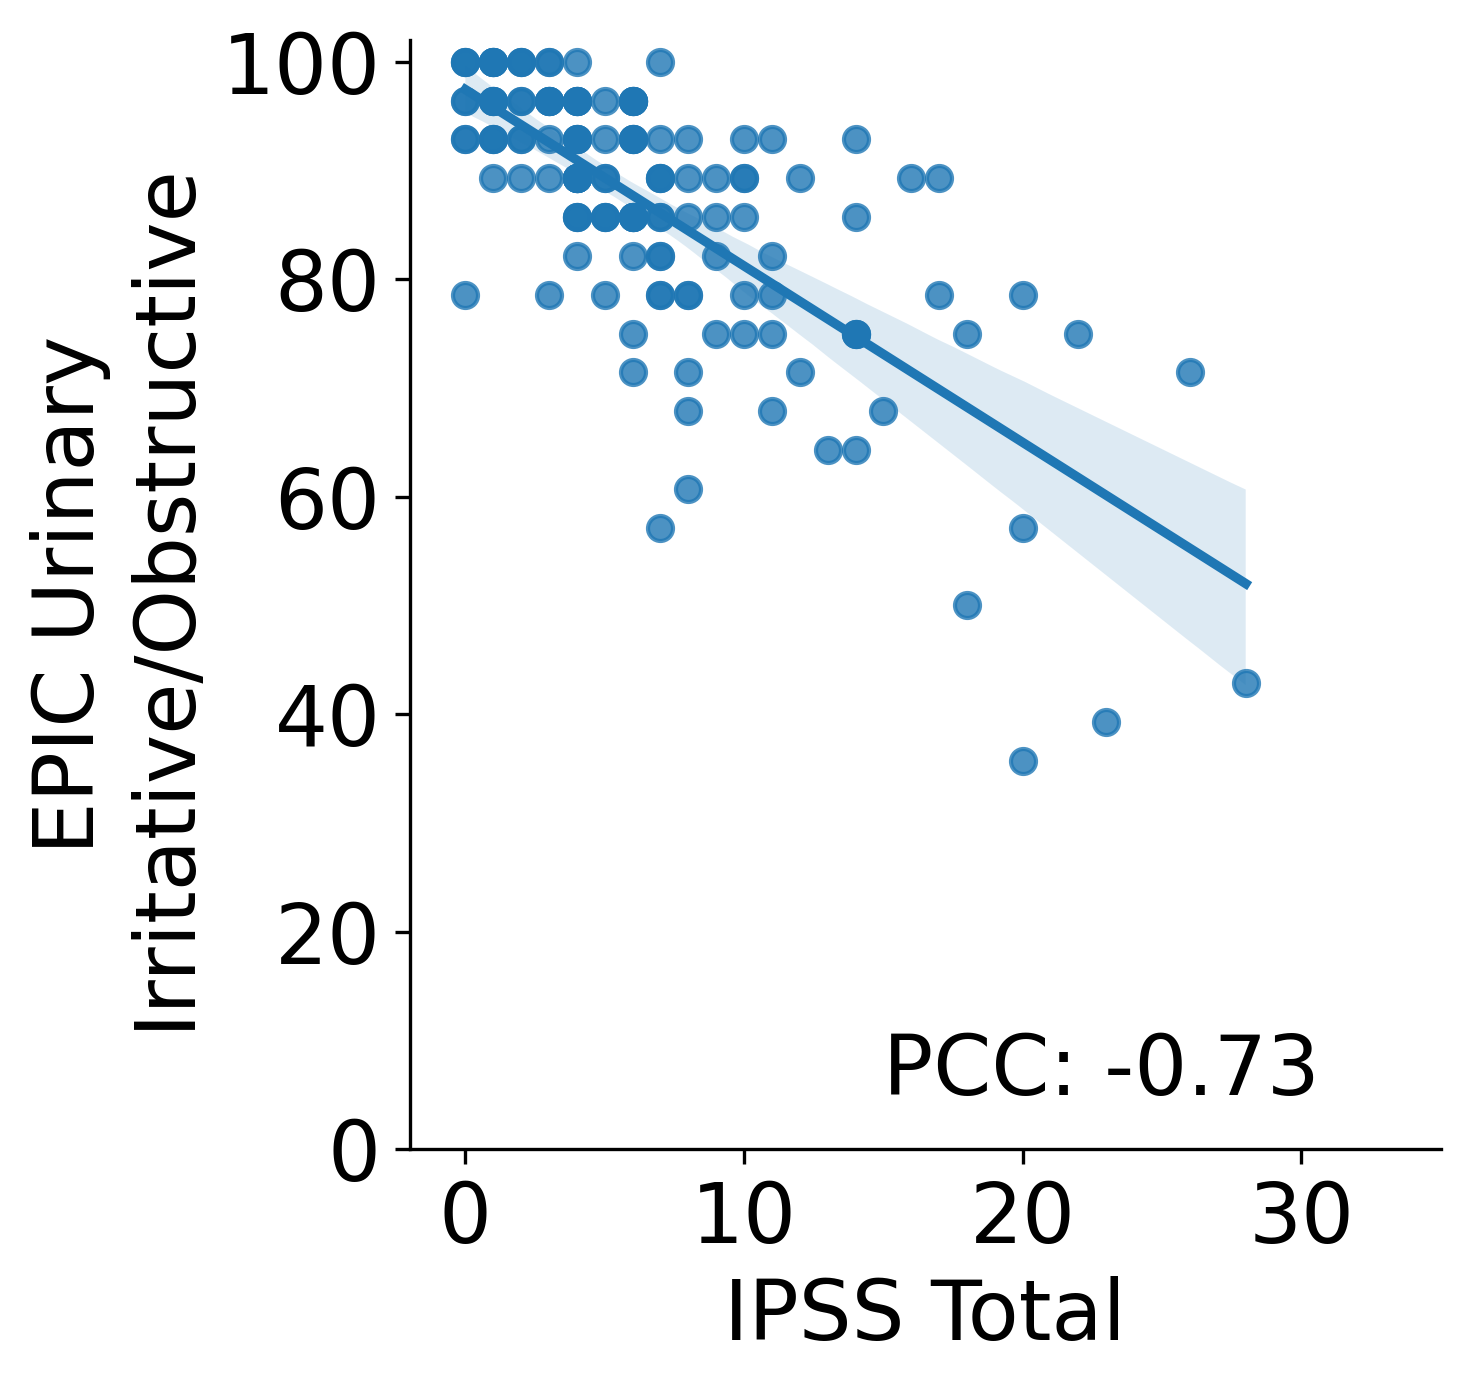

In [16]:
epic_irritative_obstructive_ipss_training_plot = sns.lmplot(data=training_set, x="IPSS_Total", y="Urinary_Irritative_Obstructive")
epic_irritative_obstructive_ipss_training_plot.set(
    xlabel="IPSS Total", ylabel="EPIC Urinary\nIrritative/Obstructive"
)
epic_irritative_obstructive_ipss_training_plot.set(xlim=(-2, 35), ylim=(0, 102))

# Calculate and plot correlation coefficient
(
    r_epic_irritative_obstructive_ipss_training,
    p_epic_irritative_obstructive_ipss_training,
) = sp.stats.pearsonr(x=training_set["IPSS_Total"], y=training_set["Urinary_Irritative_Obstructive"])
plt.text(15,5,f"PCC: {r_epic_irritative_obstructive_ipss_training:.2f}")

plt.show
plt.savefig("plots/epic_irritative_obstructive_ipss_training_plot.png", bbox_inches='tight')

### Test set

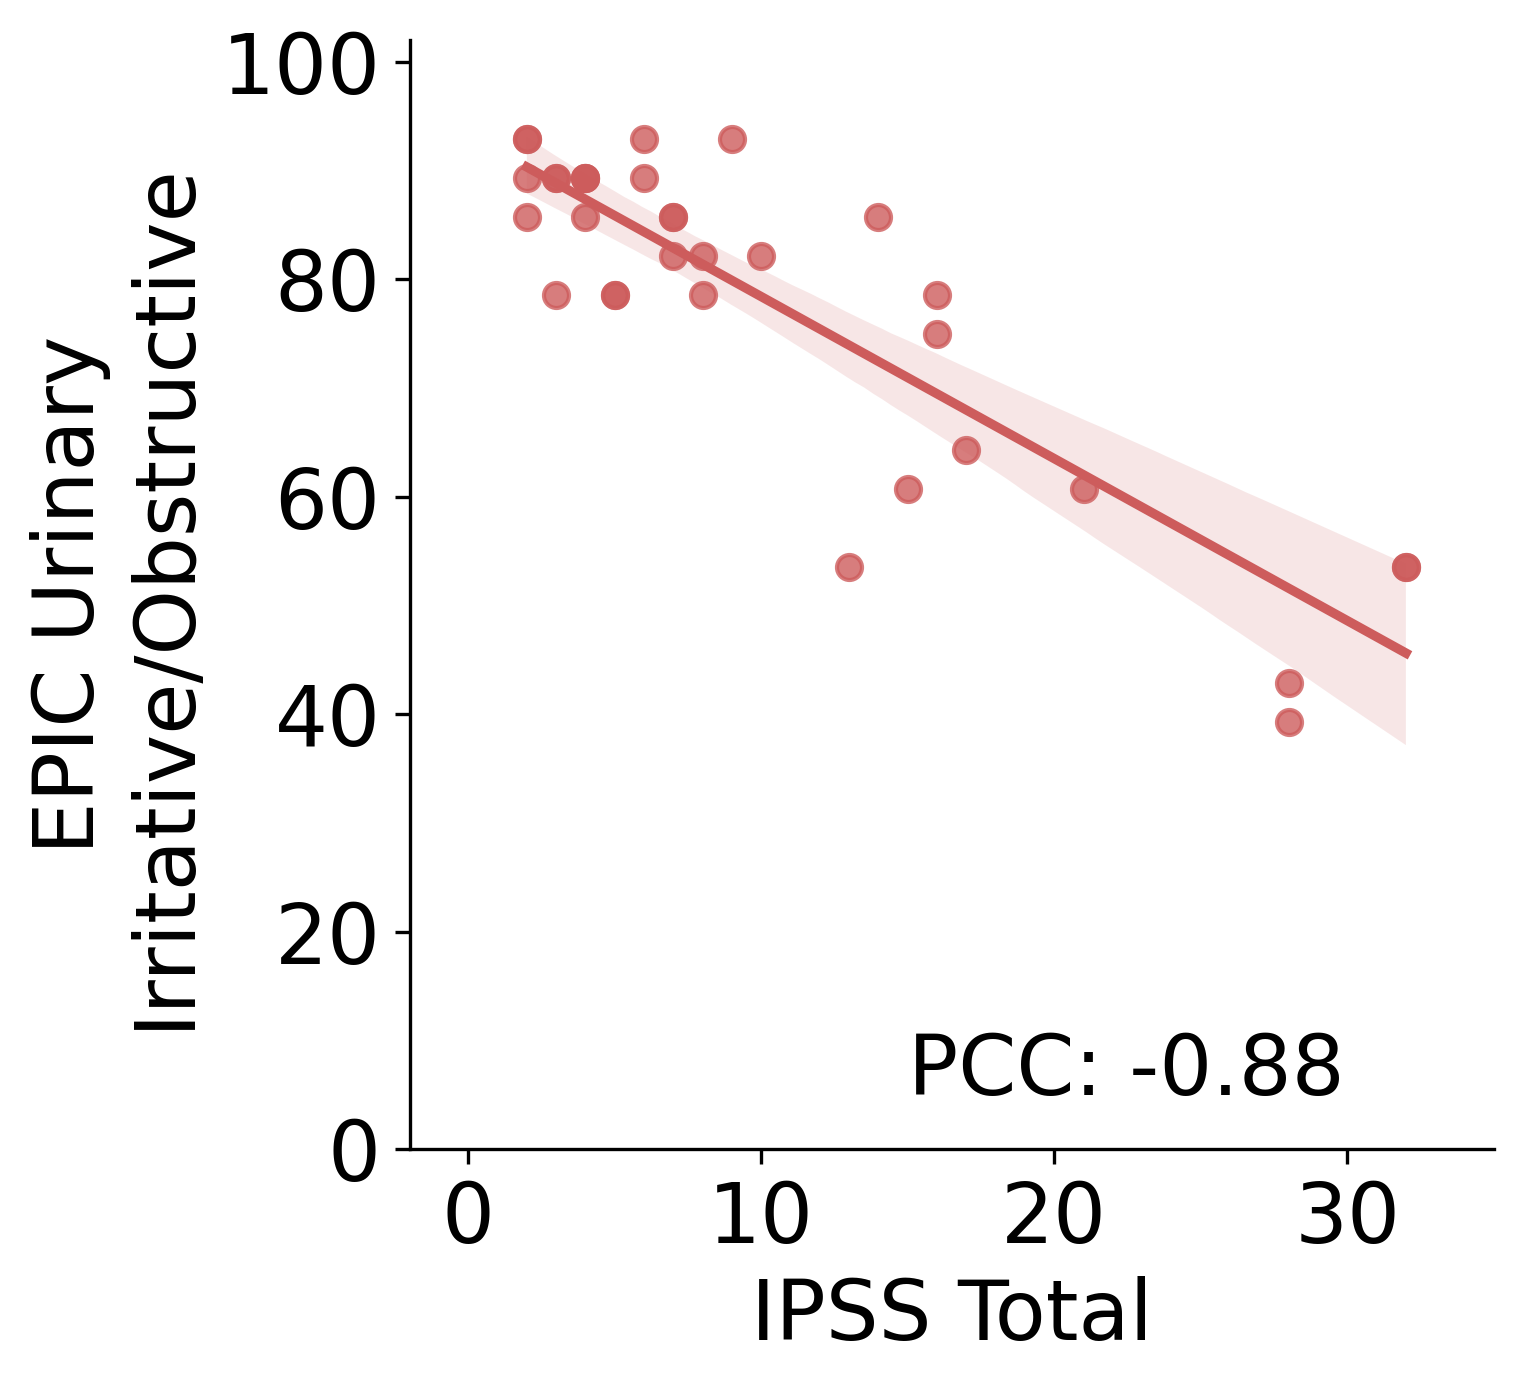

In [17]:
epic_irritative_obstructive_ipss_test_plot = sns.lmplot(data=test_set, x="IPSS_Total", y="Urinary_Irritative_Obstructive", scatter_kws={'color': 'indianred'}, line_kws={'color': 'indianred'})
epic_irritative_obstructive_ipss_test_plot.set(
    xlabel="IPSS Total", ylabel="EPIC Urinary\nIrritative/Obstructive"
)
epic_irritative_obstructive_ipss_test_plot.set(xlim=(-2, 35), ylim=(0, 102))

# Calculate and plot correlation coefficient
(
    r_epic_irritative_obstructive_ipss_test,
    p_epic_irritative_obstructive_ipss_test,
) = sp.stats.pearsonr(x=test_set["IPSS_Total"], y=test_set["Urinary_Irritative_Obstructive"])
plt.text(15,5,f"PCC: {r_epic_irritative_obstructive_ipss_test:.2f}")

plt.show
plt.savefig("plots/epic_irritative_obstructive_ipss_test_plot.png", bbox_inches='tight')

# Baseline Modelling

## Predict EPIC urinary summary using only IPSS total and a linear regression

In [95]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_summary_from_ipss_total_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)

linear_regression_predict_summary_from_ipss_total_cv.fit(X_train_ipss_total, y_train_epic_urinary_summary)

array([-2.09315716])

In [19]:
# Make predictions for test set
linear_regression_predict_summary_from_ipss_total_predictions = linear_regression_predict_summary_from_ipss_total_cv.predict(X_test_ipss_total)
linear_regression_predict_summary_from_ipss_total_predictions

array([84.85845112, 82.76529396, 59.74056521, 78.57897964, 82.76529396,
       34.6226793 , 84.85845112, 86.95160828, 89.04476544, 89.04476544,
       80.6721368 , 80.6721368 , 57.64740805, 84.85845112, 76.48582248,
       86.95160828, 61.83372237, 72.29950816, 78.57897964, 49.27477941,
       74.39266532, 34.6226793 , 59.74056521, 63.92687953, 76.48582248,
       89.04476544, 78.57897964, 66.02003669, 84.85845112, 26.25005066,
       26.25005066, 89.04476544, 86.95160828])

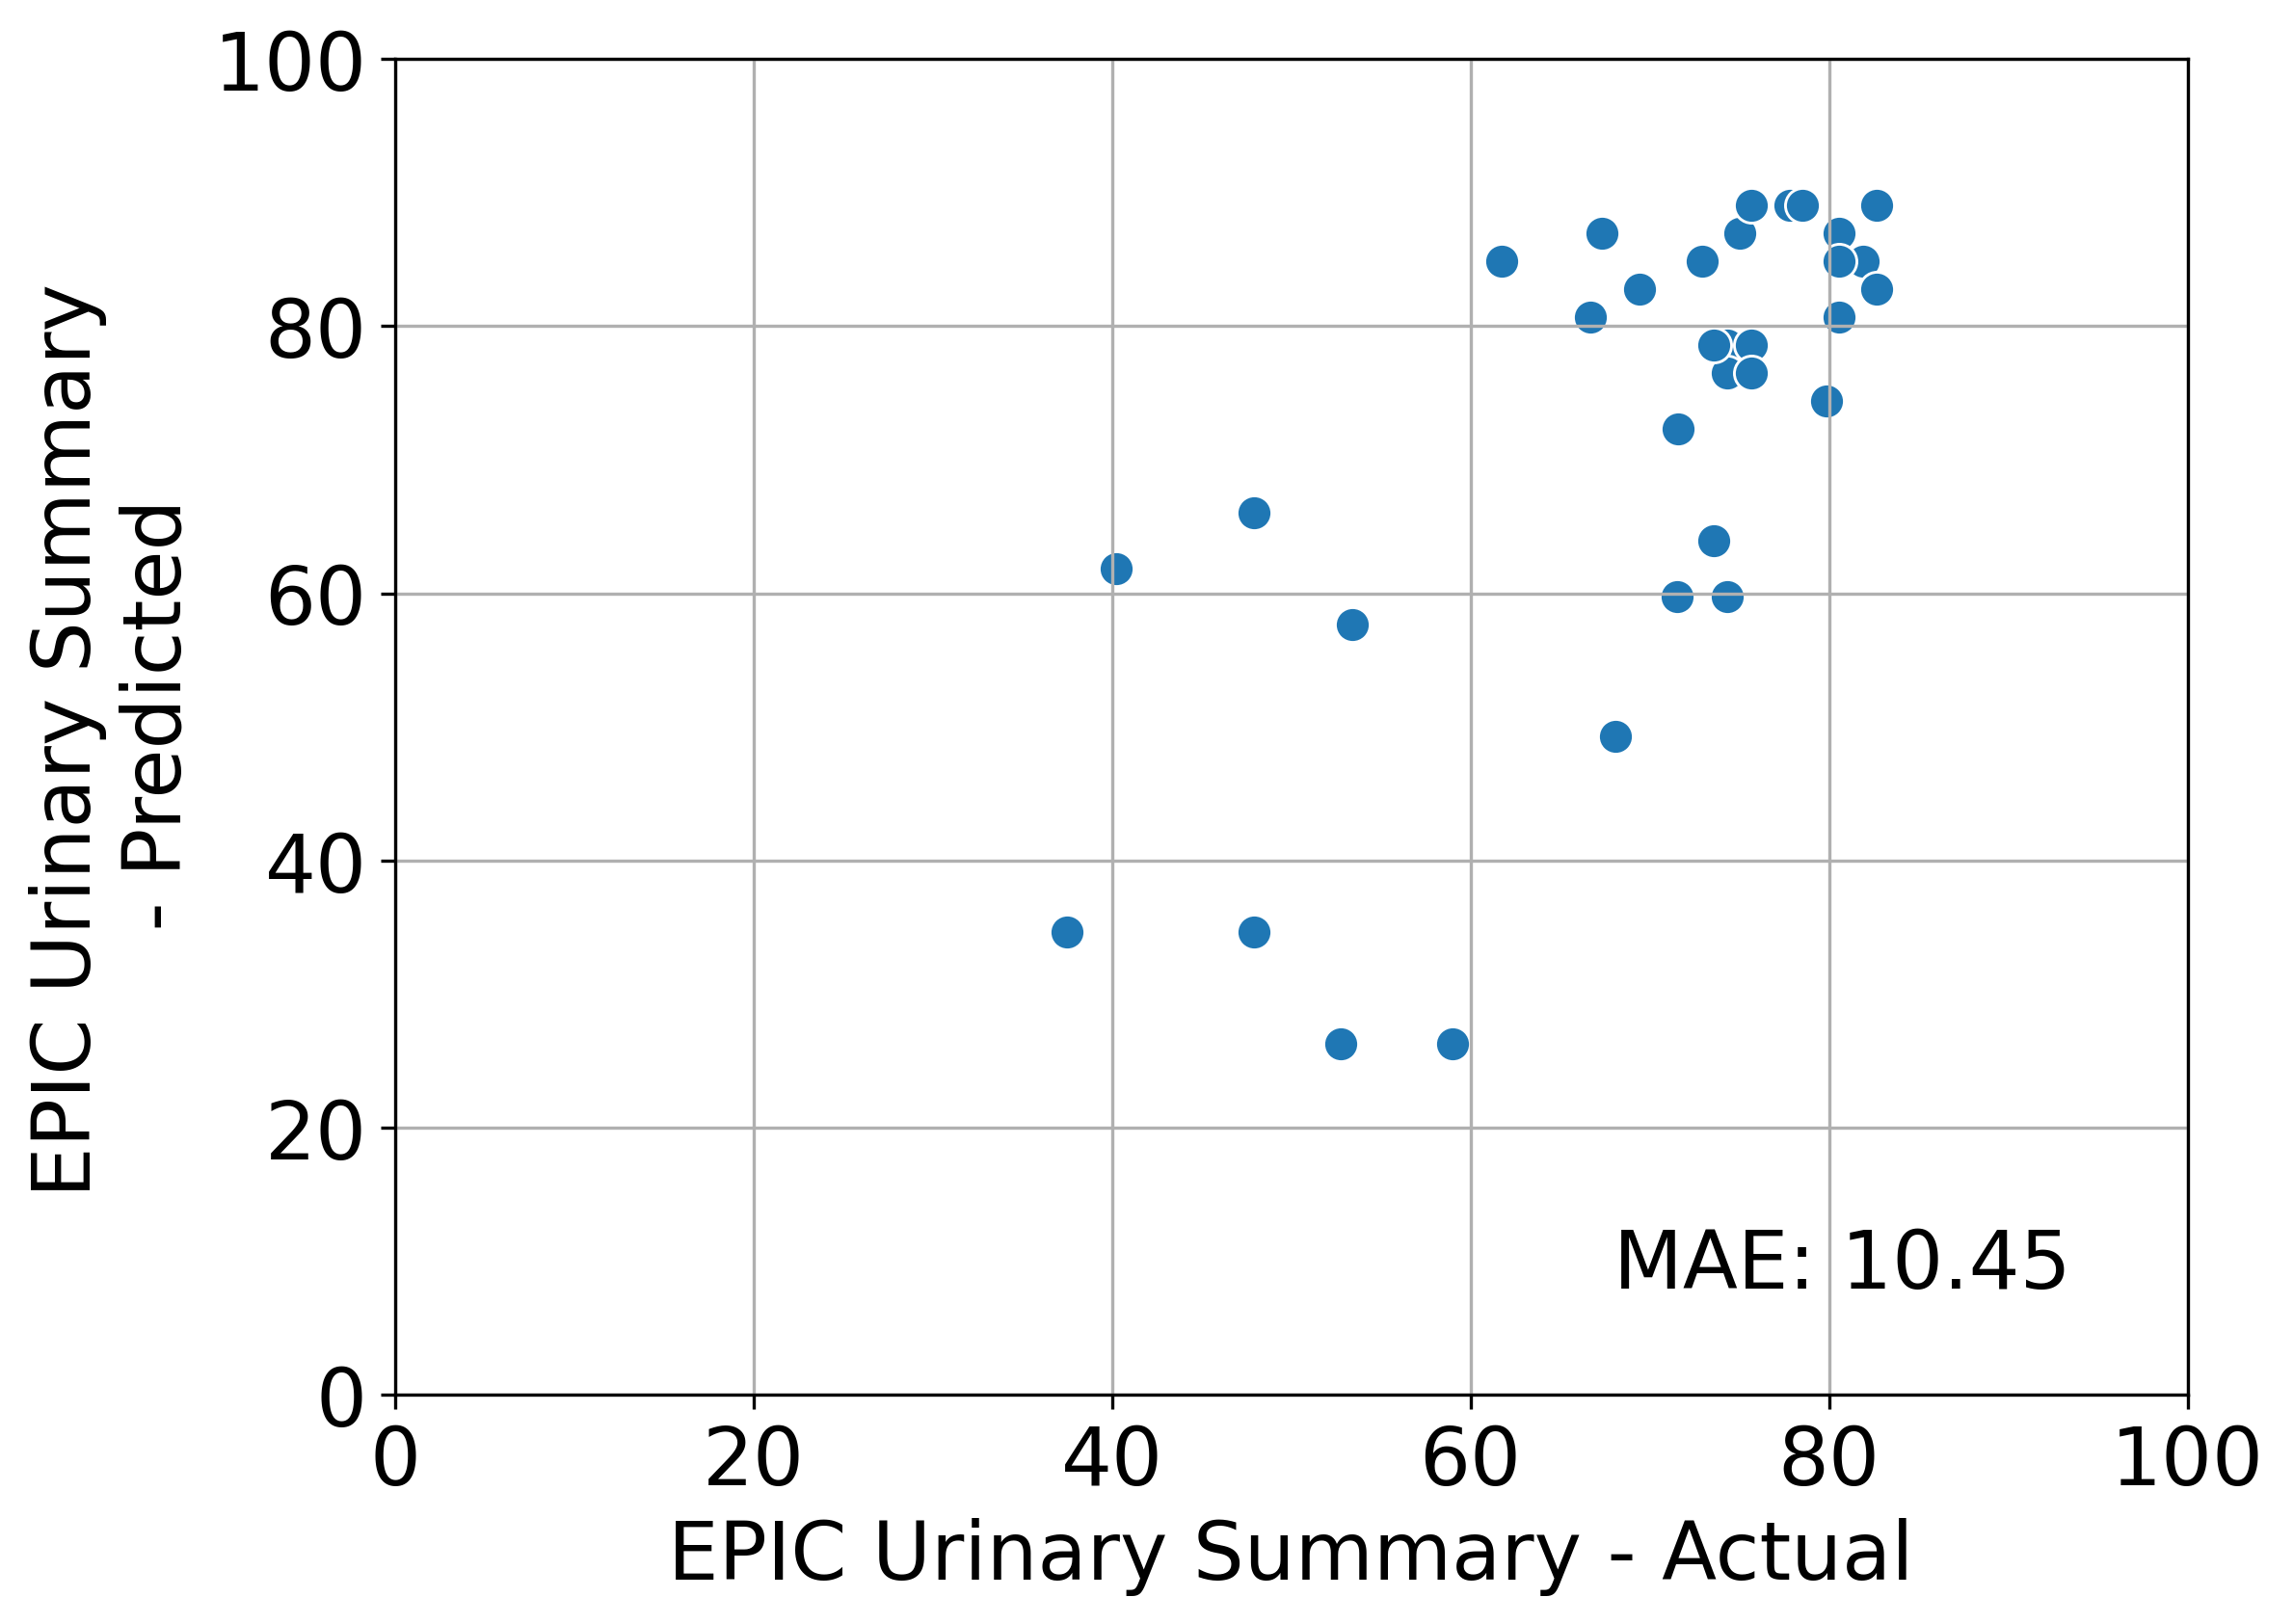

In [20]:
# Plot predictions vs. actual
linear_regression_predict_summary_from_ipss_total_plot = sns.scatterplot(
    x=y_test_epic_urinary_summary, y=linear_regression_predict_summary_from_ipss_total_predictions, s=75
)
linear_regression_predict_summary_from_ipss_total_plot.set(xlim=(0, 100), ylim=(0, 100))
linear_regression_predict_summary_from_ipss_total_plot.set(
    xlabel="EPIC Urinary Summary - Actual", ylabel="EPIC Urinary Summary \n - Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_summary_from_ipss_total_mae = mean_absolute_error(y_test_epic_urinary_summary, linear_regression_predict_summary_from_ipss_total_predictions)
plt.text(68,8,f"MAE: {linear_regression_predict_summary_from_ipss_total_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_summary_from_ipss_total_plot.png", bbox_inches='tight')

## Predict EPIC urinary irritative/obstructive using only IPSS total and a linear regression

In [21]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_irritative_obstructive_from_ipss_total_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)

linear_regression_predict_irritative_obstructive_from_ipss_total_cv.fit(X_train_ipss_total, y_train_epic_urinary_irritative_obstructive)


RandomizedSearchCV(cv=4, estimator=LinearRegression(), n_iter=1,
                   param_distributions={}, scoring='neg_mean_absolute_error')

In [22]:
# Make predictions for test set
linear_regression_predict_irritative_obstructive_from_ipss_total_predictions = linear_regression_predict_irritative_obstructive_from_ipss_total_cv.predict(X_test_ipss_total)
linear_regression_predict_irritative_obstructive_from_ipss_total_predictions

array([90.95538342, 89.33262303, 71.48225876, 86.08710225, 89.33262303,
       52.0091341 , 90.95538342, 92.57814381, 94.2009042 , 94.2009042 ,
       87.70986264, 87.70986264, 69.85949837, 90.95538342, 84.46434187,
       92.57814381, 73.10501915, 81.21882109, 86.08710225, 63.36845682,
       82.84158148, 52.0091341 , 71.48225876, 74.72777954, 84.46434187,
       94.2009042 , 86.08710225, 76.35053993, 90.95538342, 45.51809255,
       45.51809255, 94.2009042 , 92.57814381])

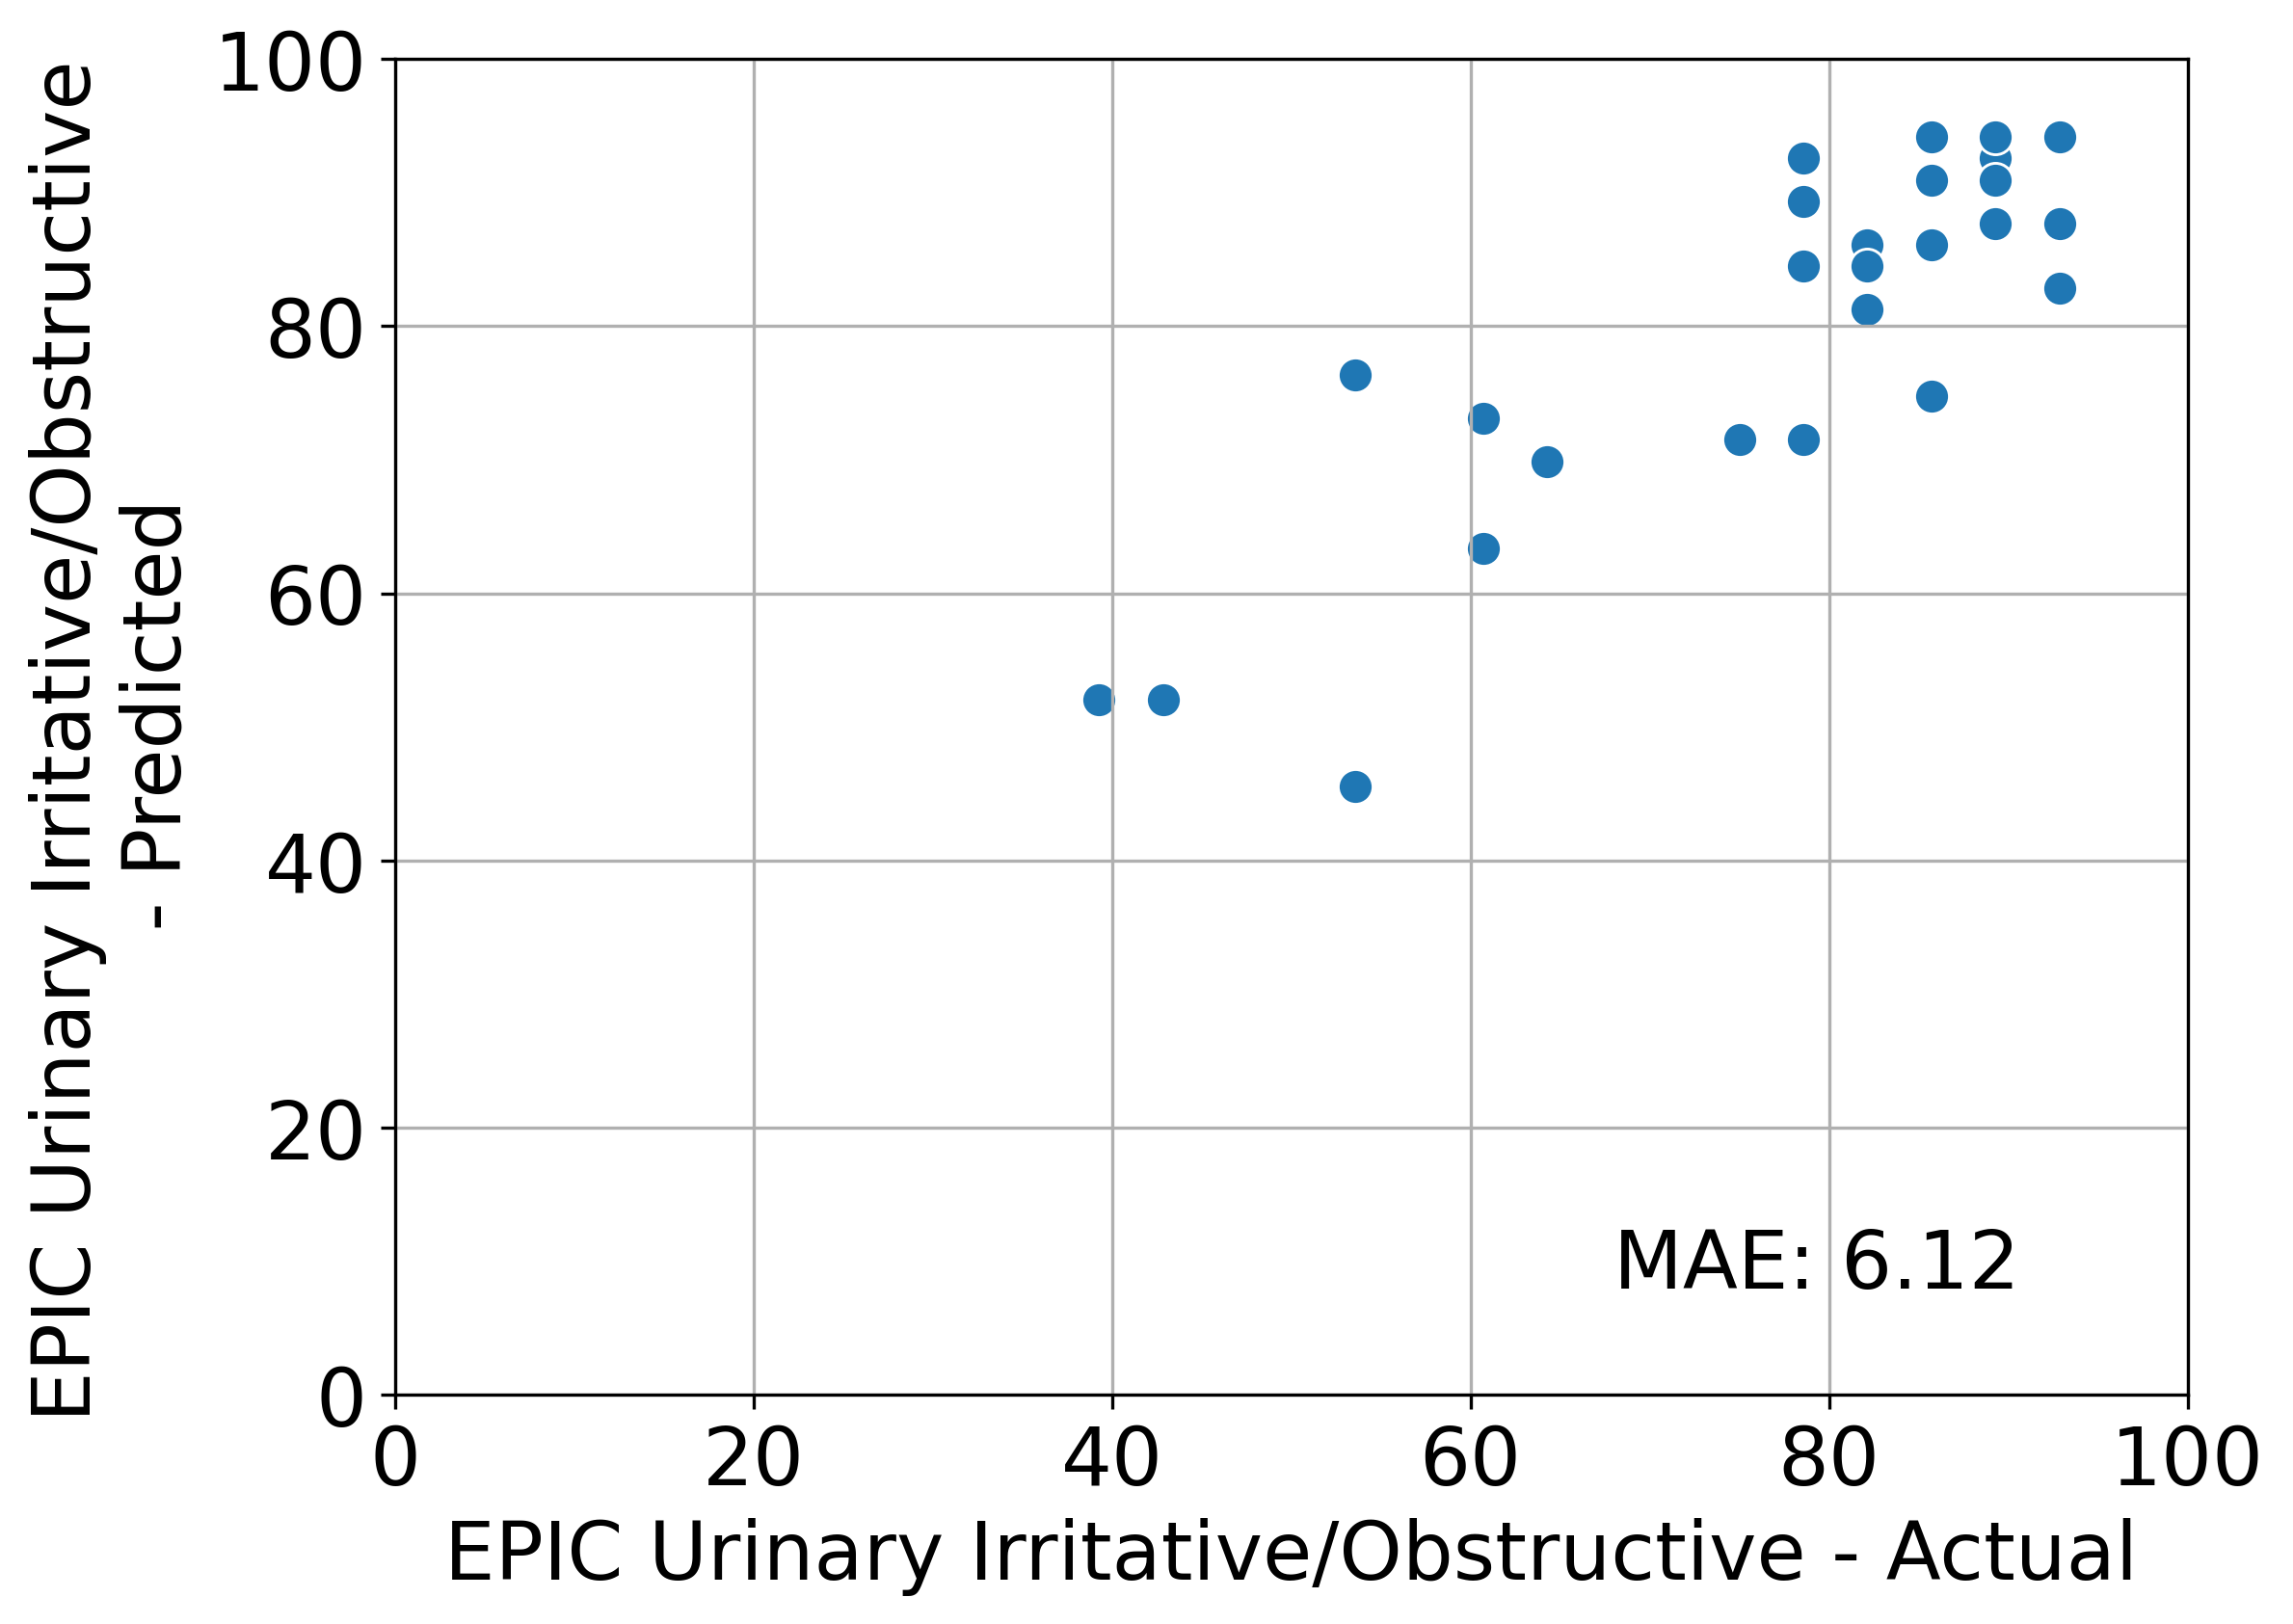

In [23]:
# Plot predictions vs. actual
linear_regression_predict_irritative_obstructive_from_ipss_total_plot = sns.scatterplot(
    x=y_test_epic_urinary_irritative_obstructive, y=linear_regression_predict_irritative_obstructive_from_ipss_total_predictions, s=75
)
linear_regression_predict_irritative_obstructive_from_ipss_total_plot.set(xlim=(0, 100), ylim=(0, 100))
linear_regression_predict_irritative_obstructive_from_ipss_total_plot.set(
    xlabel="EPIC Urinary Irritative/Obstructive - Actual", ylabel="EPIC Urinary Irritative/Obstructive \n - Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_irritative_obstructive_from_ipss_total_mae = mean_absolute_error(y_test_epic_urinary_irritative_obstructive, linear_regression_predict_irritative_obstructive_from_ipss_total_predictions)
plt.text(68,8,f"MAE: {linear_regression_predict_irritative_obstructive_from_ipss_total_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_irritative_obstructive_from_ipss_total_plot.png", bbox_inches='tight')

## Predict IPSS total using only EPIC urinary summary and a linear regression

In [24]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_ipss_total_from_urinary_summary_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)

linear_regression_predict_ipss_total_from_urinary_summary_cv.fit(X_train_epic_urinary_summary, y_train_ipss_total)


RandomizedSearchCV(cv=4, estimator=LinearRegression(), n_iter=1,
                   param_distributions={}, scoring='neg_mean_absolute_error')

In [25]:
# Make predictions for test set
linear_regression_predict_ipss_total_from_urinary_summary_predictions = linear_regression_predict_ipss_total_from_urinary_summary_cv.predict(X_test_epic_urinary_summary)
linear_regression_predict_ipss_total_from_urinary_summary_predictions

array([ 6.07868319,  5.89387923,  7.94725665,  7.94725665,  9.15874933,
       14.45646308,  8.29633081,  7.78298646,  7.08483813,  6.92056794,
        6.40722358,  9.83636388, 13.10123398, 11.04785656,  7.94725665,
        6.40722358, 16.34557031,  8.6248712 ,  7.61871626,  9.48728972,
        6.59202755, 17.02318486,  8.64540497,  8.13206062,  7.61871626,
        5.89387923,  8.13206062, 14.45646308,  6.40722358, 11.72547111,
       13.26550418,  7.61871626,  9.67209368])

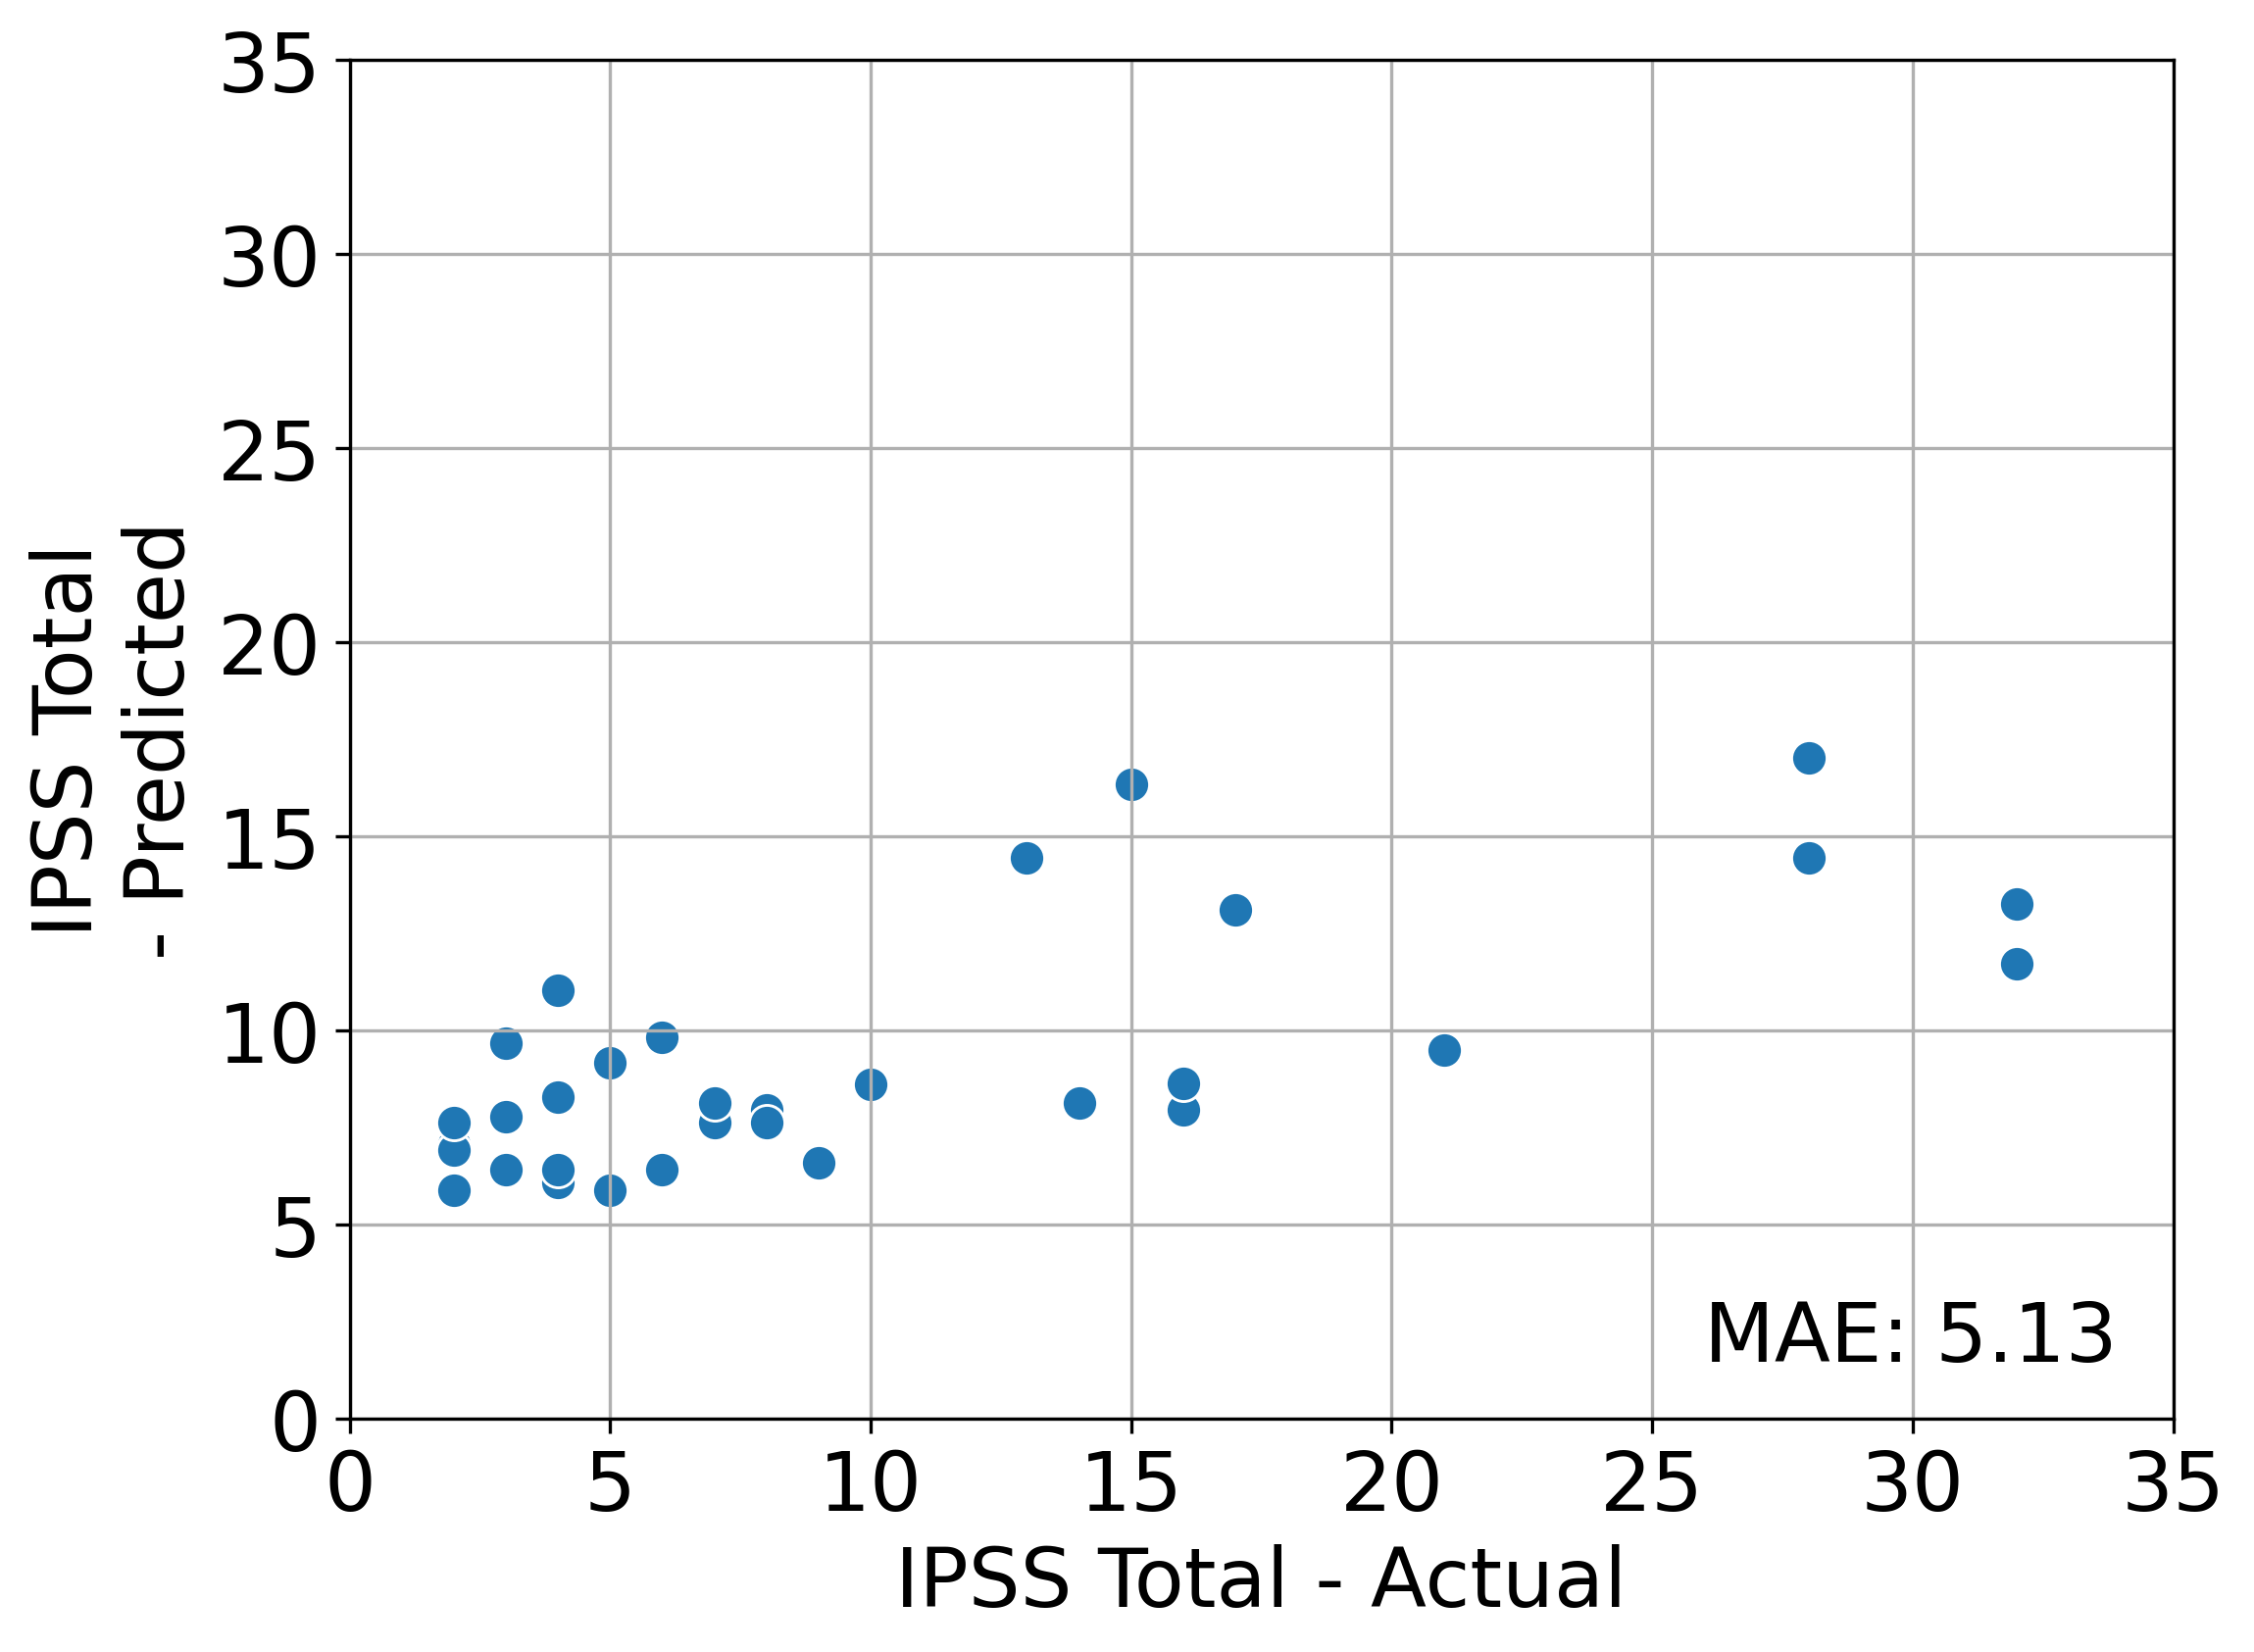

In [26]:
# Plot predictions vs. actual
linear_regression_predict_ipss_total_from_urinary_summary_plot = sns.scatterplot(
    x=y_test_ipss_total, y=linear_regression_predict_ipss_total_from_urinary_summary_predictions, s=75
)
linear_regression_predict_ipss_total_from_urinary_summary_plot.set(xlim=(0, 35), ylim=(0, 35))
linear_regression_predict_ipss_total_from_urinary_summary_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_ipss_total_from_urinary_summary_mae = mean_absolute_error(y_test_ipss_total, linear_regression_predict_ipss_total_from_urinary_summary_predictions)
plt.text(26,1.5,f"MAE: {linear_regression_predict_ipss_total_from_urinary_summary_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_ipss_total_from_urinary_summary_plot.png", bbox_inches='tight')

## Predict IPSS total using only EPIC urinary irritative/obstructive and a linear regression

In [27]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)

linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_cv.fit(X_train_epic_urinary_irritative_obstructive, y_train_ipss_total)


RandomizedSearchCV(cv=4, estimator=LinearRegression(), n_iter=1,
                   param_distributions={}, scoring='neg_mean_absolute_error')

In [28]:
# Make predictions for test set
linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_predictions = linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_cv.predict(X_test_epic_urinary_irritative_obstructive)
linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_predictions

array([ 5.85231311,  9.37787992,  9.37787992,  8.20269098,  9.37787992,
       21.12976927,  7.02750204,  5.85231311,  4.67712417,  7.02750204,
        4.67712417,  5.85231311, 14.07863566,  5.85231311,  8.20269098,
        5.85231311, 15.25382459,  8.20269098,  7.02750204, 15.25382459,
        4.67712417, 22.30495821, 10.55306885,  7.02750204,  9.37787992,
        4.67712417,  7.02750204, 17.60420247,  5.85231311, 17.60420247,
       17.60420247,  5.85231311,  9.37787992])

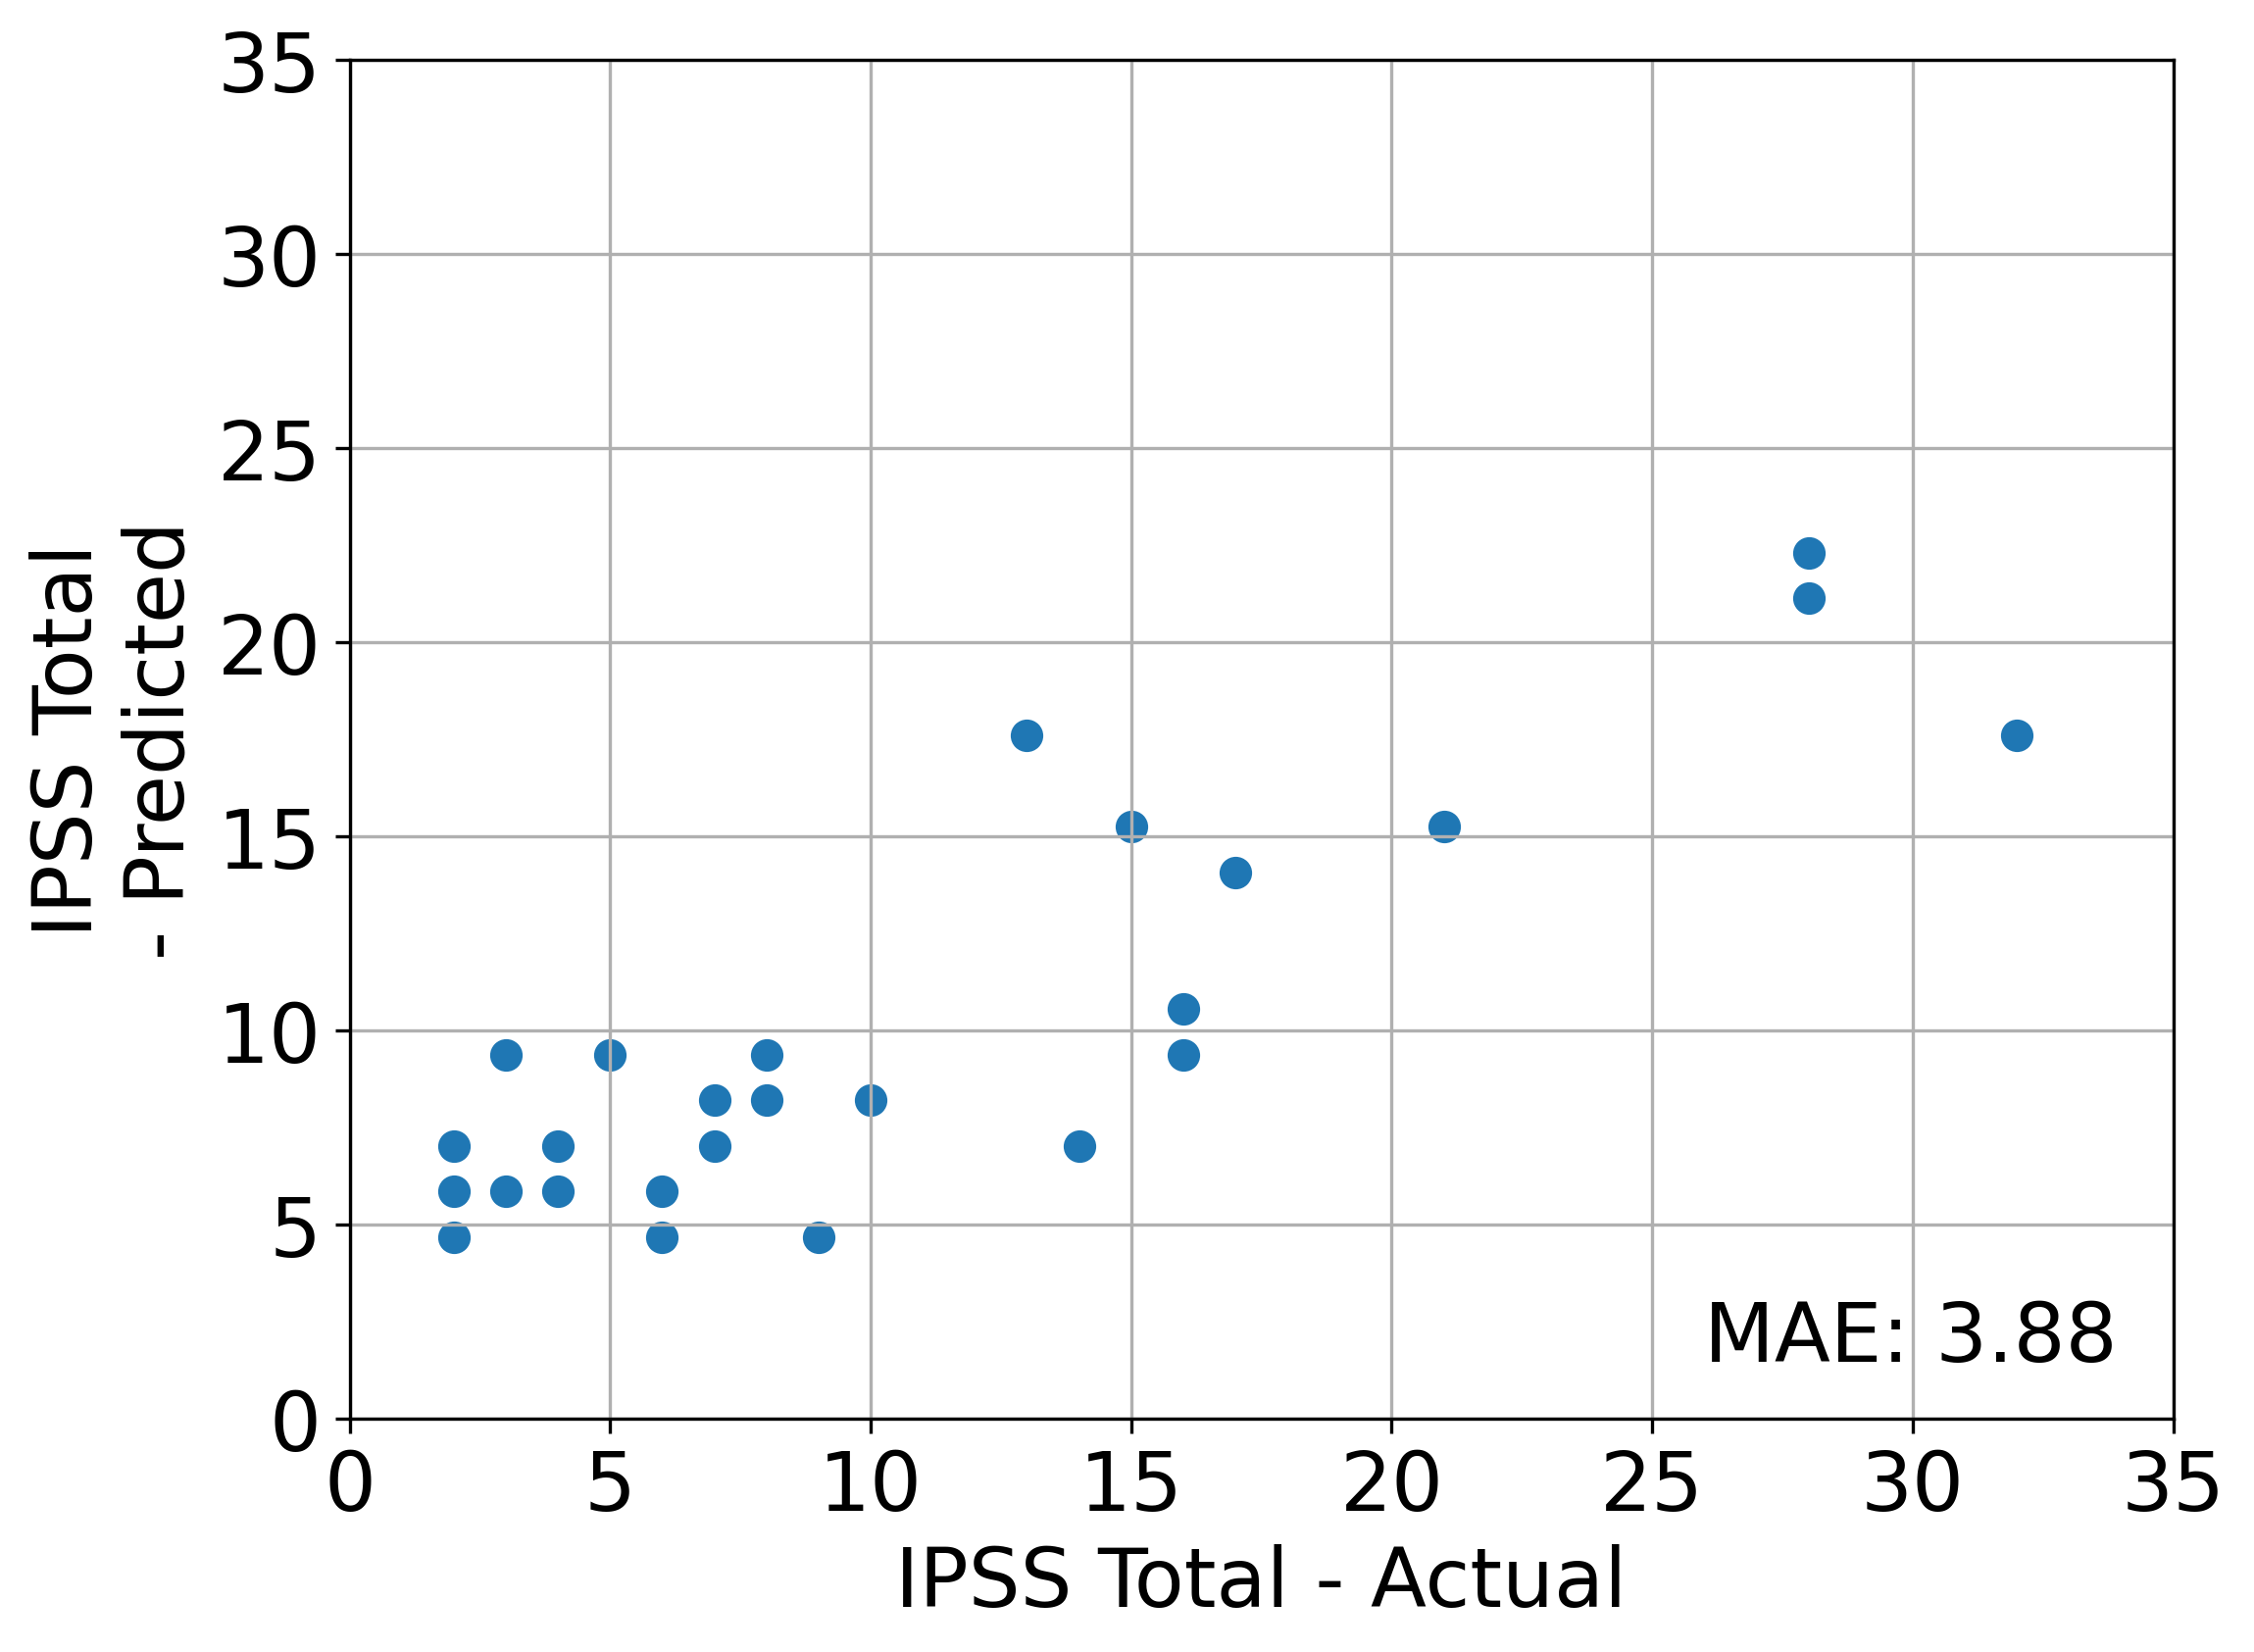

In [29]:
# Plot predictions vs. actual
linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_plot = sns.scatterplot(
    x=y_test_ipss_total, y=linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_predictions, s=75
)
linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_plot.set(xlim=(0, 35), ylim=(0, 35))
linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_mae = mean_absolute_error(y_test_ipss_total, linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_predictions)
plt.text(26,1.5,f"MAE: {linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_ipss_total_from_urinary_irritative_obstructive_plot.png", bbox_inches='tight')

# Advanced Modeling

## Predict EPIC urinary irritative/obstructive subscore using all IPSS questions

### Linear Regression

In [30]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_irritative_obstructive)

RandomizedSearchCV(cv=4, estimator=LinearRegression(), n_iter=1,
                   param_distributions={}, scoring='neg_mean_absolute_error')

In [31]:
# Make predictions for test set
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions = (
    linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.predict(X_test_all_ipss_questions)
)
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions

array([91.84597937, 86.16443895, 61.57269969, 82.75266853, 85.67706899,
       60.88154792, 89.77531367, 91.224022  , 95.8538805 , 94.5380401 ,
       89.03858835, 83.63464742, 70.12151805, 91.12626968, 83.60938311,
       93.08933176, 66.62117196, 79.48615169, 82.75266853, 51.62323662,
       75.37552137, 47.22024882, 68.59104804, 66.60385371, 83.70088379,
       95.82447923, 87.82463723, 66.57791001, 89.0262027 , 51.572737  ,
       57.17717472, 93.75381352, 92.30510519])

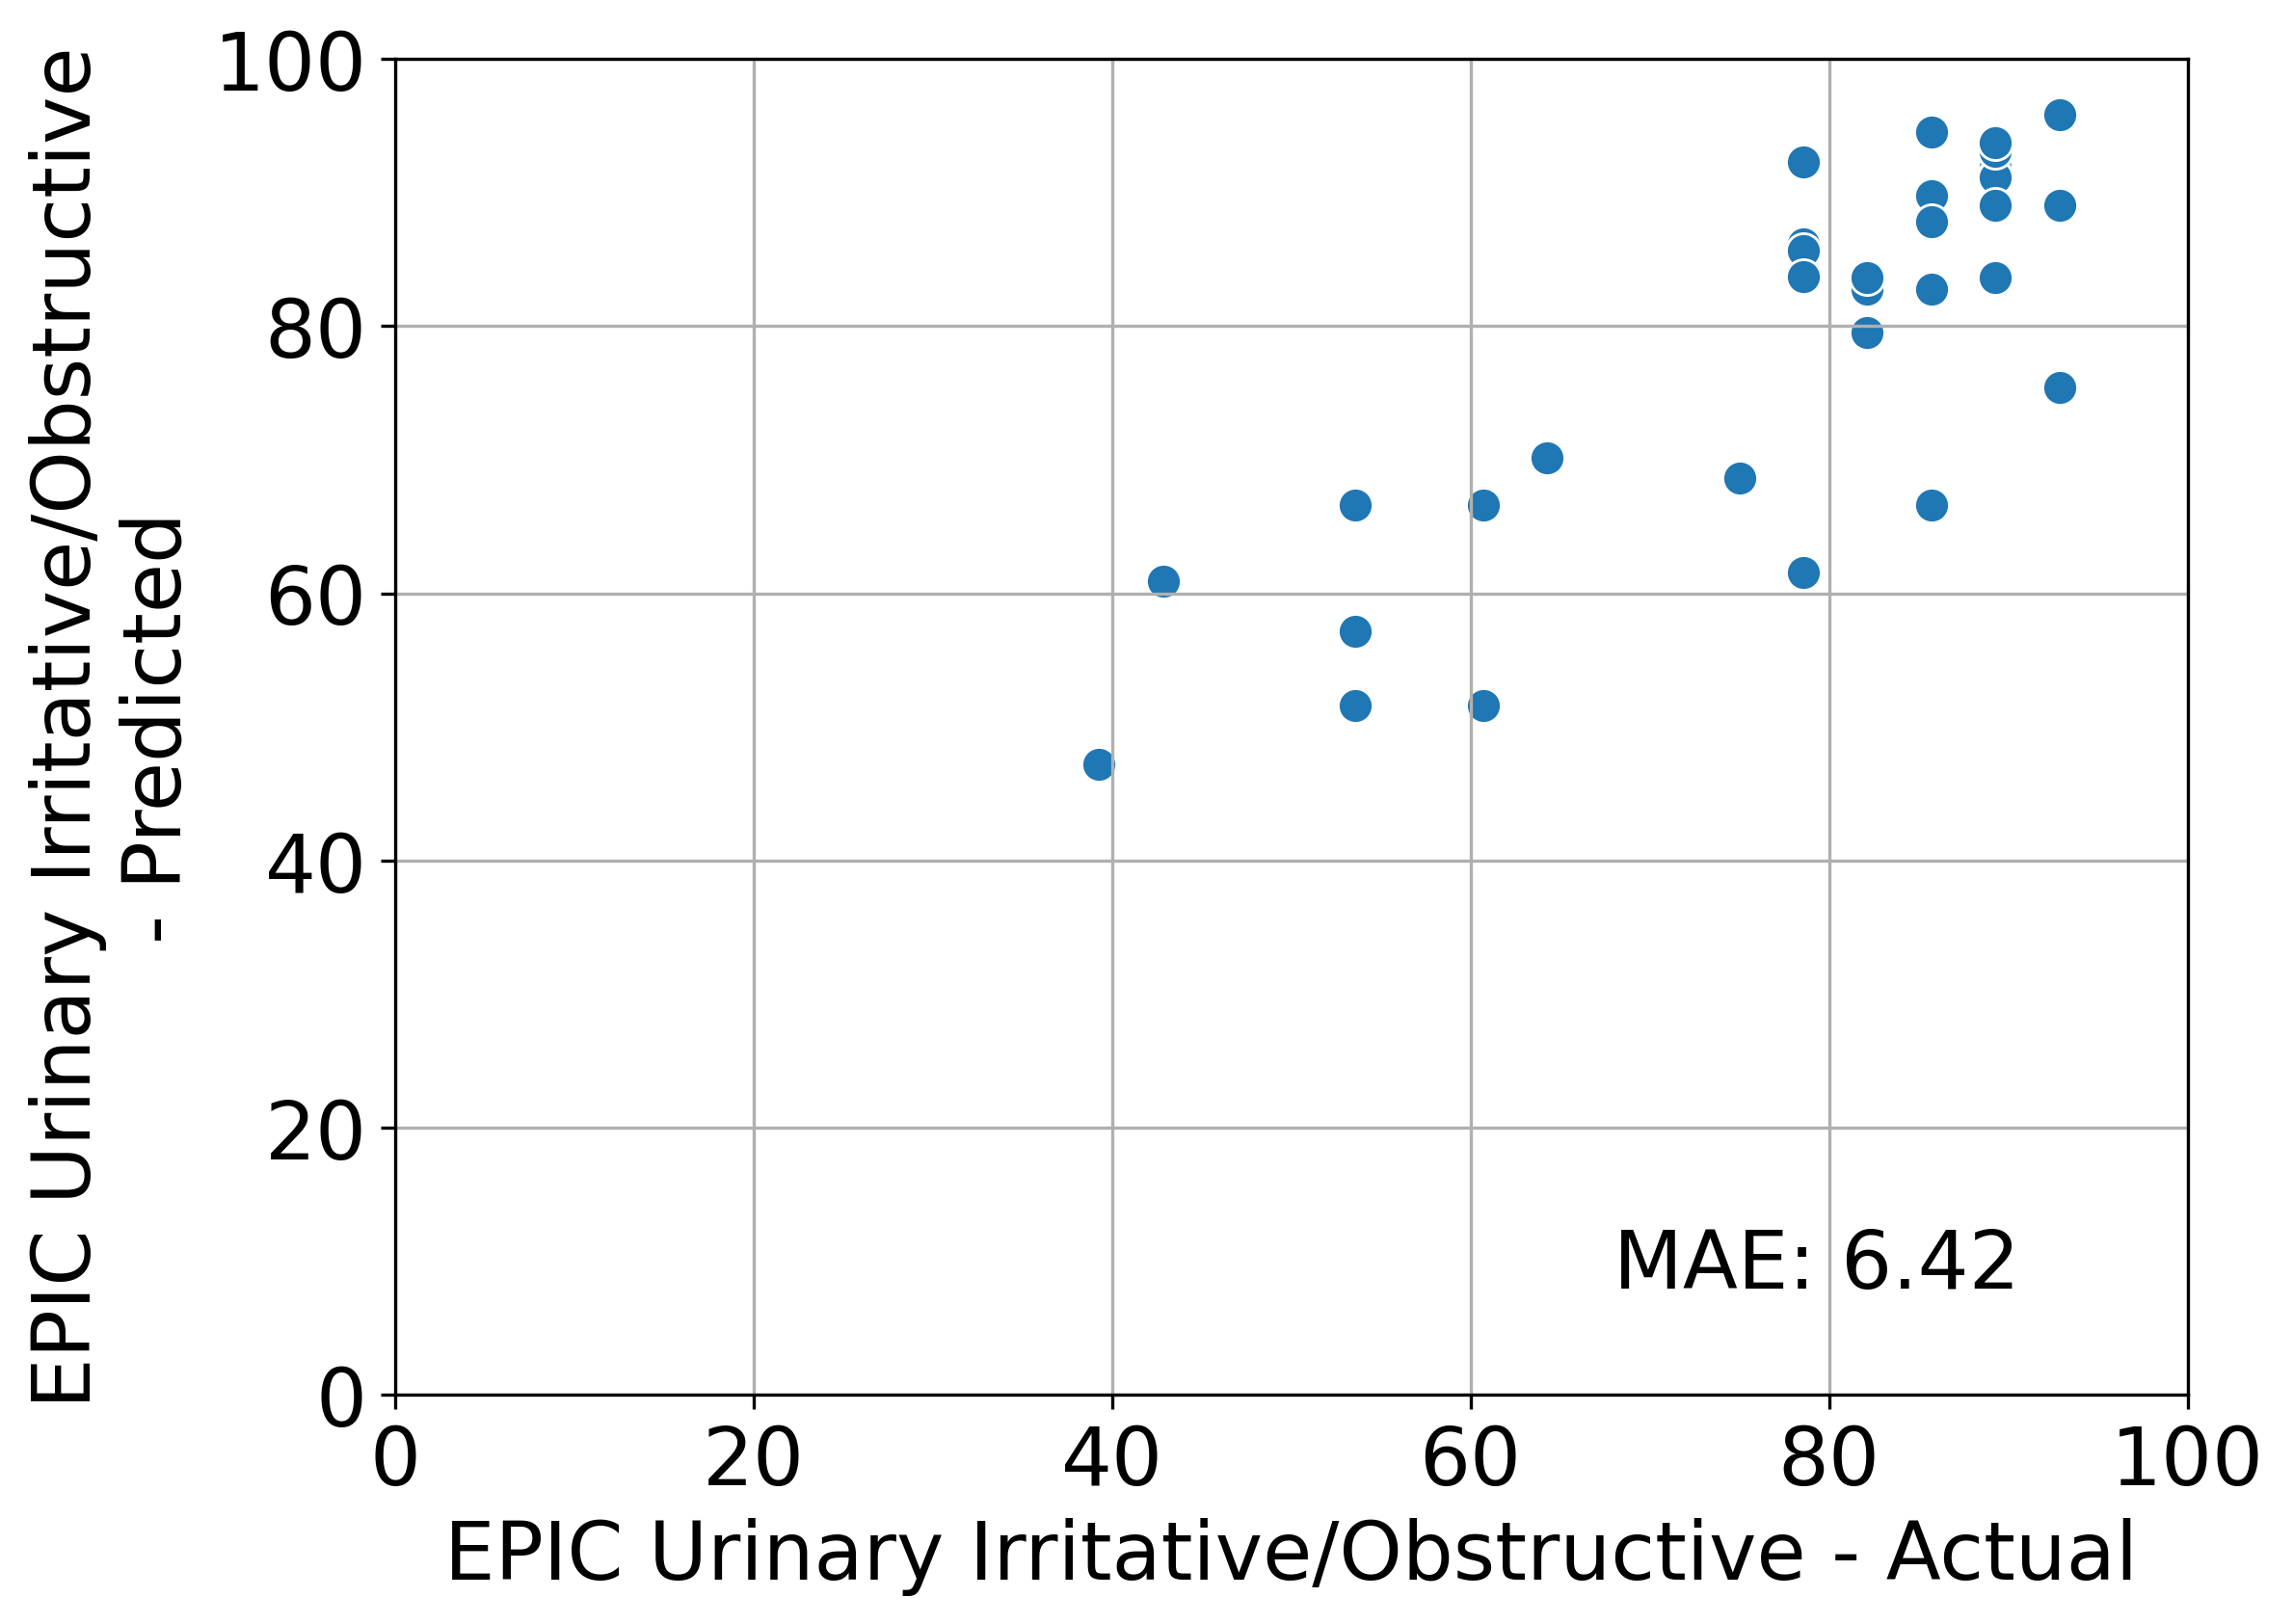

In [32]:
# Plot predictions vs. actual
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_irritative_obstructive, y=linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions, s=75
)
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Irritative/Obstructive - Actual", ylabel="EPIC Urinary Irritative/Obstructive\n- Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae  = mean_absolute_error(y_test_epic_urinary_irritative_obstructive, linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions)
plt.text(68,8,f"MAE: {linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.png", bbox_inches='tight')

### Support Vector Regression

In [33]:
# Create and train model
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions={
        "kernel": ("linear", "poly", "rbf", "sigmoid"),
        "C": loguniform(1, 1e2),
        "epsilon": loguniform(1e-3, 1),
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_irritative_obstructive)
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END C=5.611516415334504, epsilon=0.7114476009343418, kernel=rbf;, score=-7.957 total time=   0.0s
[CV 2/4] END C=5.611516415334504, epsilon=0.7114476009343418, kernel=rbf;, score=-5.776 total time=   0.0s
[CV 3/4] END C=5.611516415334504, epsilon=0.7114476009343418, kernel=rbf;, score=-5.578 total time=   0.0s
[CV 4/4] END C=5.611516415334504, epsilon=0.7114476009343418, kernel=rbf;, score=-7.489 total time=   0.0s
[CV 1/4] END C=36.25617634576226, epsilon=0.06173770394704572, kernel=poly;, score=-9.979 total time=   0.0s
[CV 2/4] END C=36.25617634576226, epsilon=0.06173770394704572, kernel=poly;, score=-15.713 total time=   0.0s
[CV 3/4] END C=36.25617634576226, epsilon=0.06173770394704572, kernel=poly;, score=-5.306 total time=   0.0s
[CV 4/4] END C=36.25617634576226, epsilon=0.06173770394704572, kernel=poly;, score=-10.502 total time=   0.0s
[CV 1/4] END C=2.0511104188433973, epsilon=0.001493656855461763, kerne

{'C': 1.198462031463844, 'epsilon': 0.25016767752510133, 'kernel': 'linear'}

In [34]:
# Make predictions for test set
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions = (
    support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.predict(X_test_all_ipss_questions)
)
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions

array([91.30469657, 86.15046963, 63.61337043, 82.75644986, 85.5653862 ,
       64.16305774, 89.03547881, 91.63370871, 96.36436254, 94.73956478,
       88.70572383, 83.40885009, 70.75026477, 91.34554501, 83.90884584,
       92.14133488, 62.97864523, 79.68507534, 82.75644986, 52.41806516,
       76.86576964, 46.35593041, 64.55037471, 66.6615283 , 81.92640735,
       96.64454602, 87.58890204, 68.48954117, 89.35651073, 54.0552028 ,
       57.26630604, 94.37532825, 91.77709835])

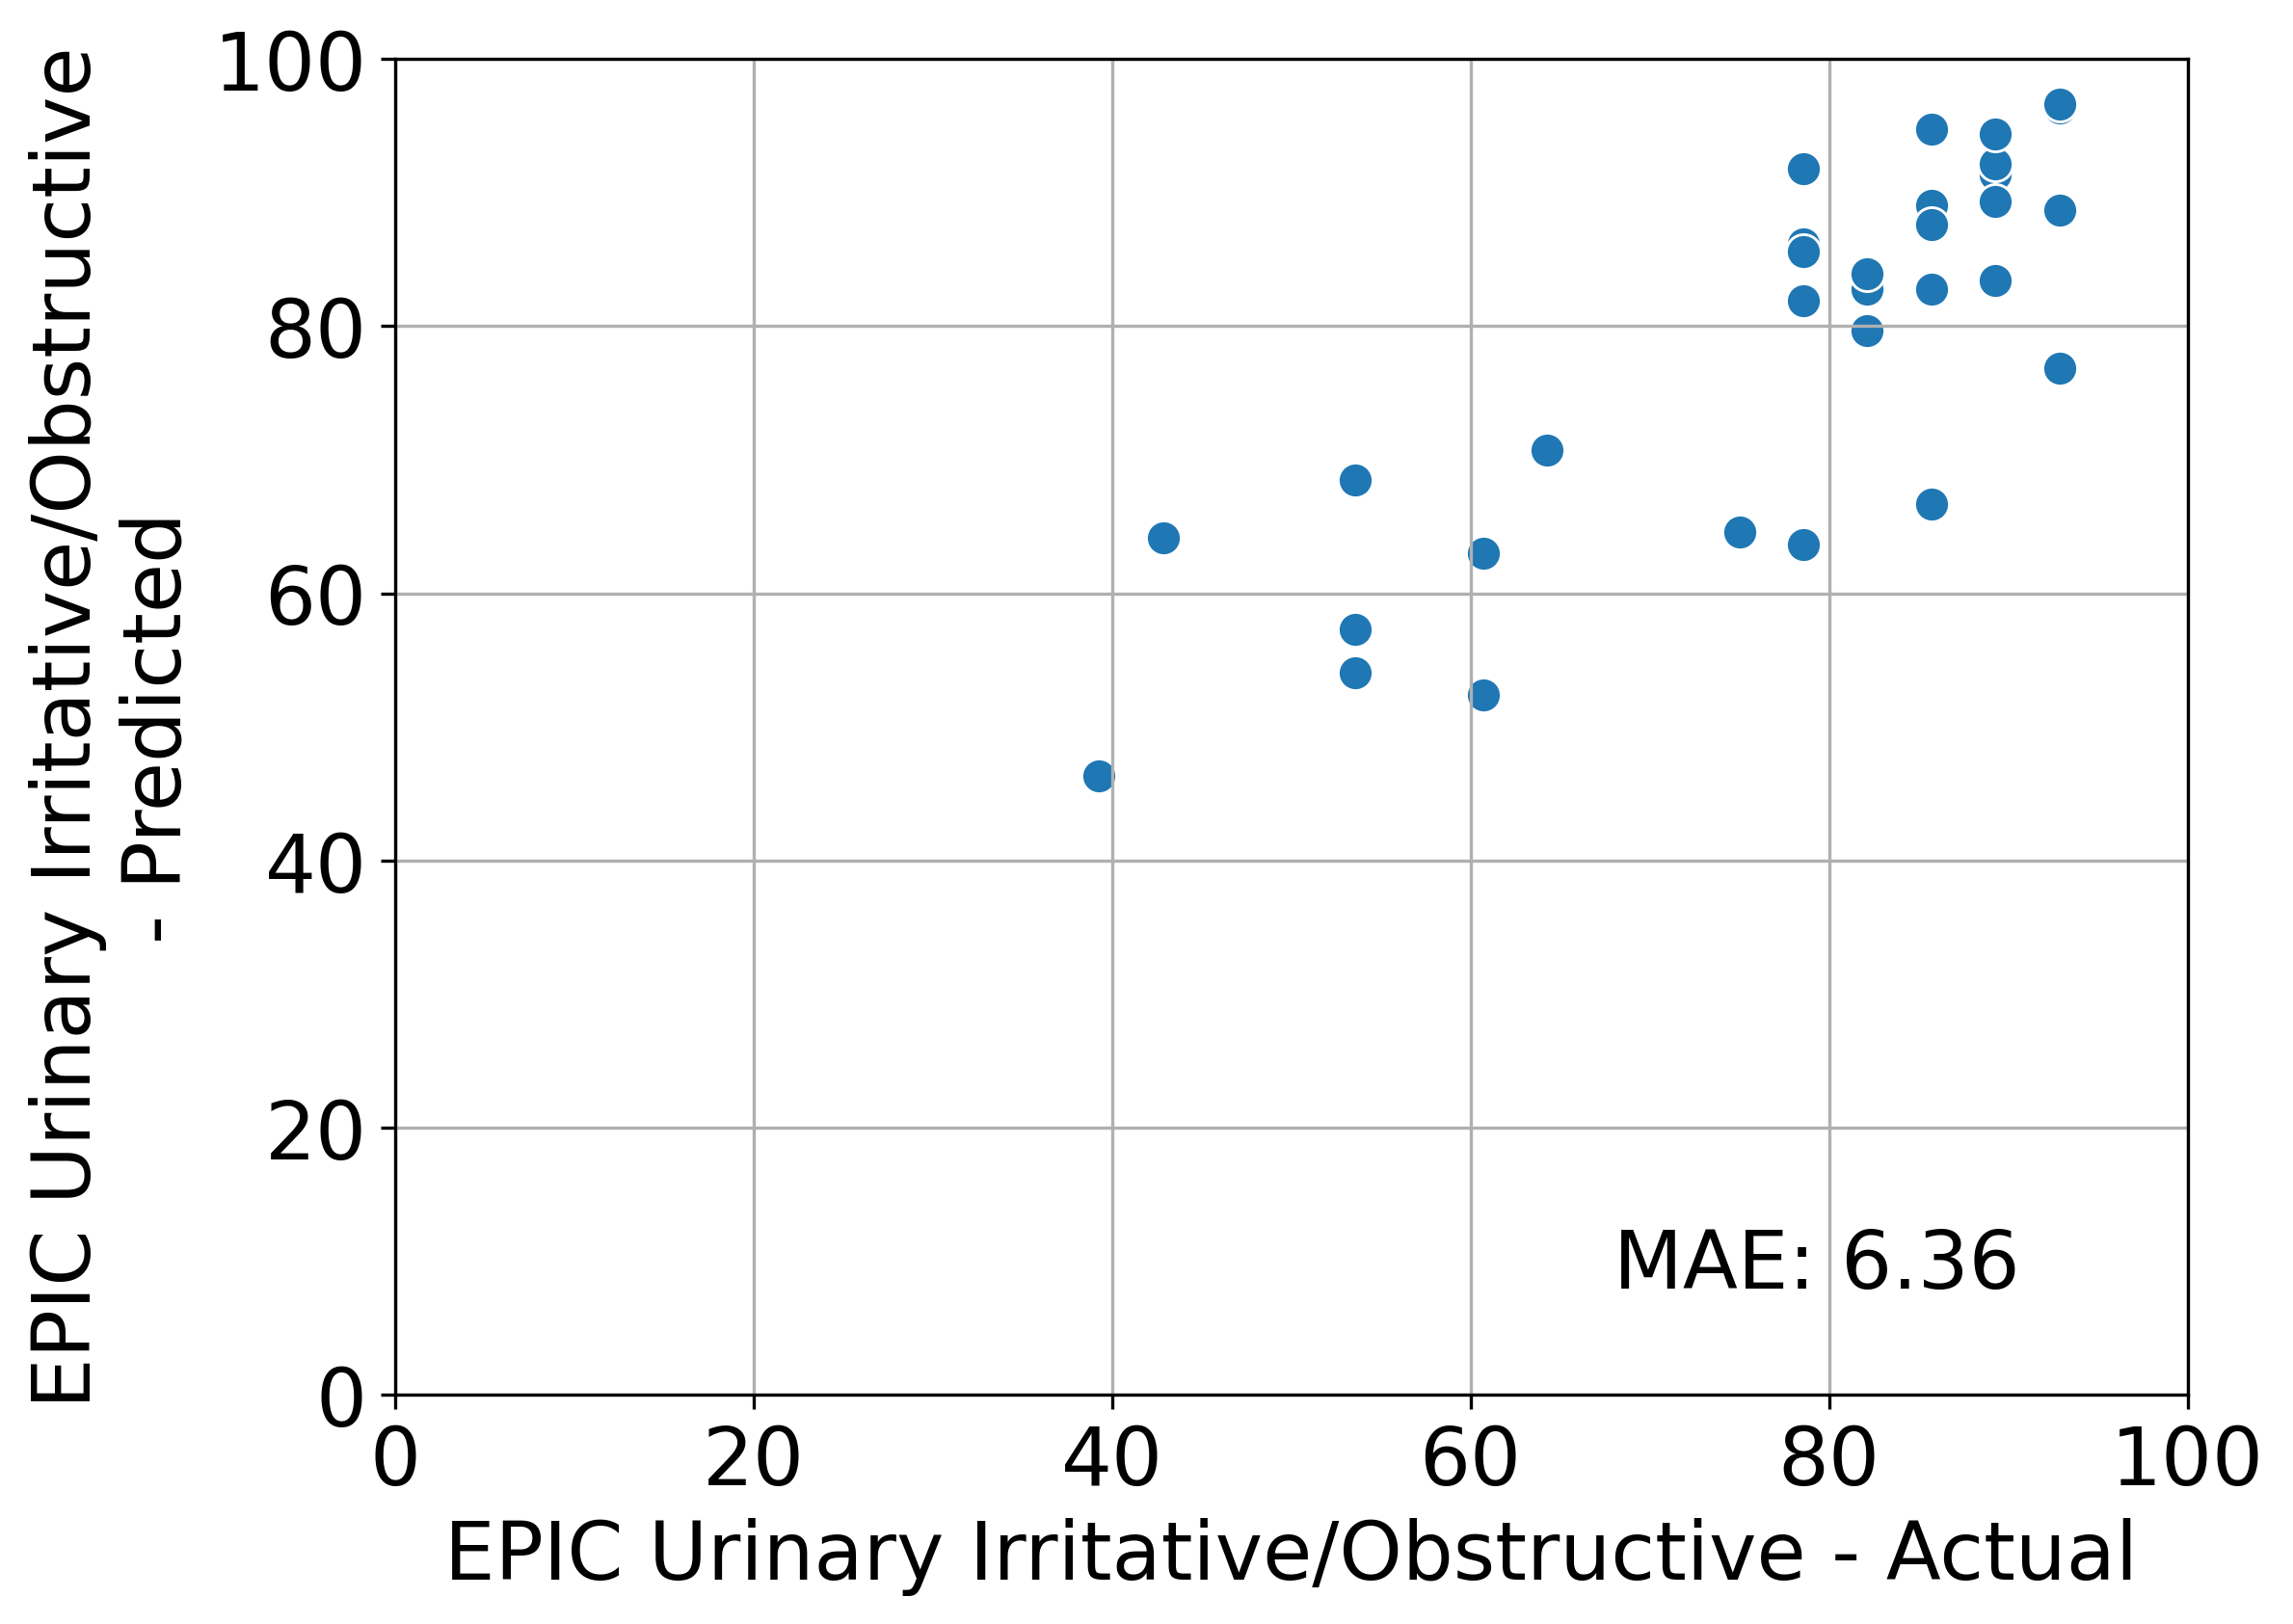

In [35]:
# Plot predictions vs. actual
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_irritative_obstructive, y=support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions, s=75
)
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Irritative/Obstructive - Actual", ylabel="EPIC Urinary Irritative/Obstructive\n- Predicted"
)

# Calculate and plot mean absolute error
support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae = mean_absolute_error(y_test_epic_urinary_irritative_obstructive, support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions)
plt.text(68,8,f"MAE: {support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/support_vector_regression_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.png", bbox_inches='tight')

### K-Neighbors Regression

In [36]:
# Create and train model
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions={
        "n_neighbors": range(1, 10),
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
        "leaf_size": range(1, 50),
        "p": [1, 2],
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_irritative_obstructive)
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END algorithm=brute, leaf_size=49, n_neighbors=8, p=2, weights=uniform;, score=-7.527 total time=   0.0s
[CV 2/4] END algorithm=brute, leaf_size=49, n_neighbors=8, p=2, weights=uniform;, score=-6.386 total time=   0.0s
[CV 3/4] END algorithm=brute, leaf_size=49, n_neighbors=8, p=2, weights=uniform;, score=-6.020 total time=   0.0s
[CV 4/4] END algorithm=brute, leaf_size=49, n_neighbors=8, p=2, weights=uniform;, score=-7.551 total time=   0.0s
[CV 1/4] END algorithm=brute, leaf_size=47, n_neighbors=4, p=1, weights=distance;, score=-6.876 total time=   0.0s
[CV 2/4] END algorithm=brute, leaf_size=47, n_neighbors=4, p=1, weights=distance;, score=-7.160 total time=   0.0s
[CV 3/4] END algorithm=brute, leaf_size=47, n_neighbors=4, p=1, weights=distance;, score=-7.222 total time=   0.0s
[CV 4/4] END algorithm=brute, leaf_size=47, n_neighbors=4, p=1, weights=distance;, score=-7.381 total time=   0.0s
[CV 1/4] END algorit

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 8,
 'leaf_size': 31,
 'algorithm': 'ball_tree'}

In [37]:
# Make predictions for test set
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions = kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.predict(
    X_test_all_ipss_questions
)
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions

array([96.42857143, 93.75      , 75.44642857, 85.26785714, 90.625     ,
       64.73214286, 87.05357143, 93.75      , 98.21428571, 96.875     ,
       87.94642857, 90.625     , 79.46428571, 91.96428571, 85.71428571,
       89.73214286, 74.55357143, 85.26785714, 85.26785714, 66.07142857,
       84.82142857, 58.03571429, 76.78571429, 81.69642857, 84.82142857,
       94.19642857, 90.625     , 76.78571429, 91.96428571, 56.25      ,
       61.16071429, 96.875     , 95.53571429])

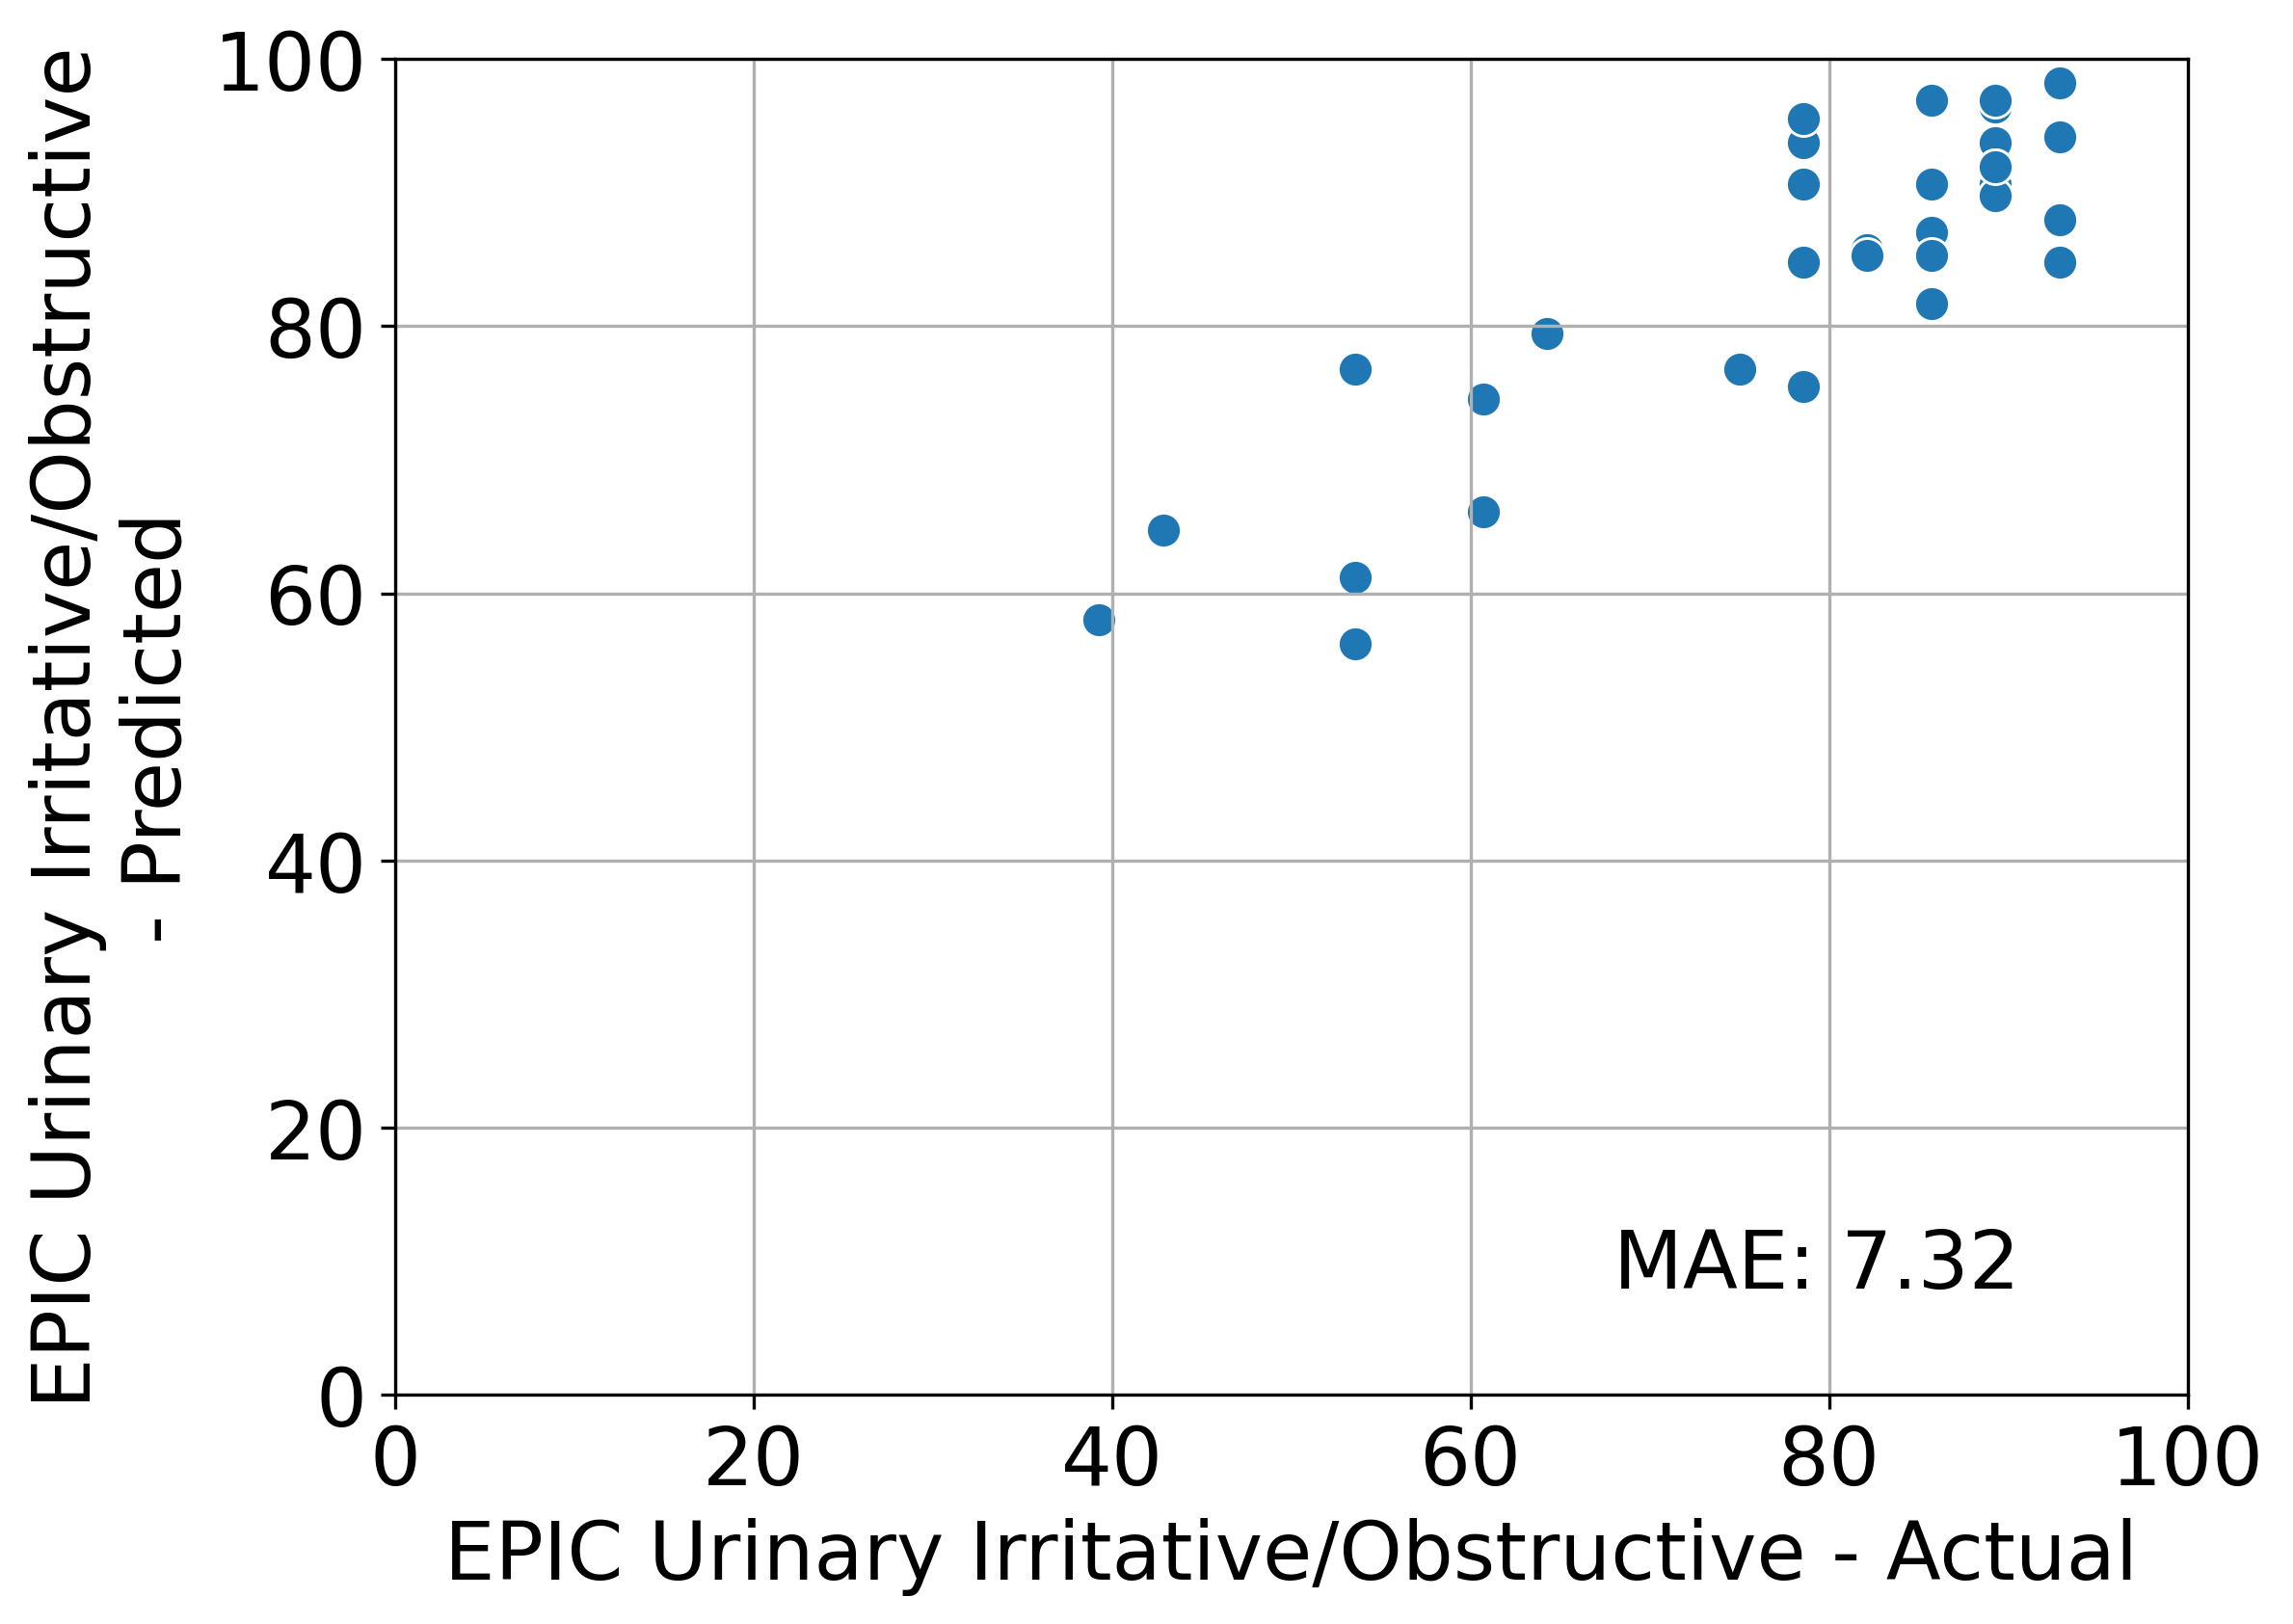

In [38]:
# Plot predictions vs. actual
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_irritative_obstructive, y=kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions, s=75
)
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Irritative/Obstructive - Actual", ylabel="EPIC Urinary Irritative/Obstructive\n- Predicted"
)

# Calculate and plot mean absolute error
kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae = mean_absolute_error(y_test_epic_urinary_irritative_obstructive, kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions)
plt.text(68,8,f"MAE: {kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/kneighbors_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.png", bbox_inches='tight')

### XGBoost

In [39]:
# Create and train model
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions={
        "learning_rate": loguniform(1e-2, 1),
        "gamma": range(0, 5),
        "max_depth": range(1, 8),
        "min_child_weight": range(1, 8),
        "lambda": loguniform(1e-5, 10),
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_irritative_obstructive)
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END gamma=4, lambda=0.10002623249893101, learning_rate=0.17650586136817745, max_depth=7, min_child_weight=4;, score=-8.686 total time=   0.1s
[CV 2/4] END gamma=4, lambda=0.10002623249893101, learning_rate=0.17650586136817745, max_depth=7, min_child_weight=4;, score=-8.884 total time=   0.1s
[CV 3/4] END gamma=4, lambda=0.10002623249893101, learning_rate=0.17650586136817745, max_depth=7, min_child_weight=4;, score=-6.729 total time=   0.1s
[CV 4/4] END gamma=4, lambda=0.10002623249893101, learning_rate=0.17650586136817745, max_depth=7, min_child_weight=4;, score=-7.883 total time=   0.1s
[CV 1/4] END gamma=0, lambda=0.002801158290523553, learning_rate=0.036247047504737444, max_depth=4, min_child_weight=5;, score=-8.285 total time=   0.1s
[CV 2/4] END gamma=0, lambda=0.002801158290523553, learning_rate=0.036247047504737444, max_depth=4, min_child_weight=5;, score=-8.694 total time=   0.1s
[CV 3/4] END gamma=0, lamb

{'gamma': 4,
 'lambda': 0.0005438303198854254,
 'learning_rate': 0.05479087803887359,
 'max_depth': 2,
 'min_child_weight': 1}

In [40]:
# Make predictions for test set
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions = xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_cv.predict(
    X_test_all_ipss_questions
)
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions

array([90.55012 , 90.78271 , 47.39978 , 83.38161 , 85.373215, 40.531734,
       88.25817 , 92.26768 , 95.4728  , 92.5166  , 86.949615, 90.78271 ,
       70.8054  , 90.53707 , 83.29458 , 88.25817 , 71.056435, 83.54112 ,
       83.38161 , 34.245964, 80.07803 , 39.561543, 68.169304, 68.658615,
       80.422386, 94.55963 , 86.949615, 64.277245, 89.388   , 36.29369 ,
       64.06083 , 95.223885, 91.21437 ], dtype=float32)

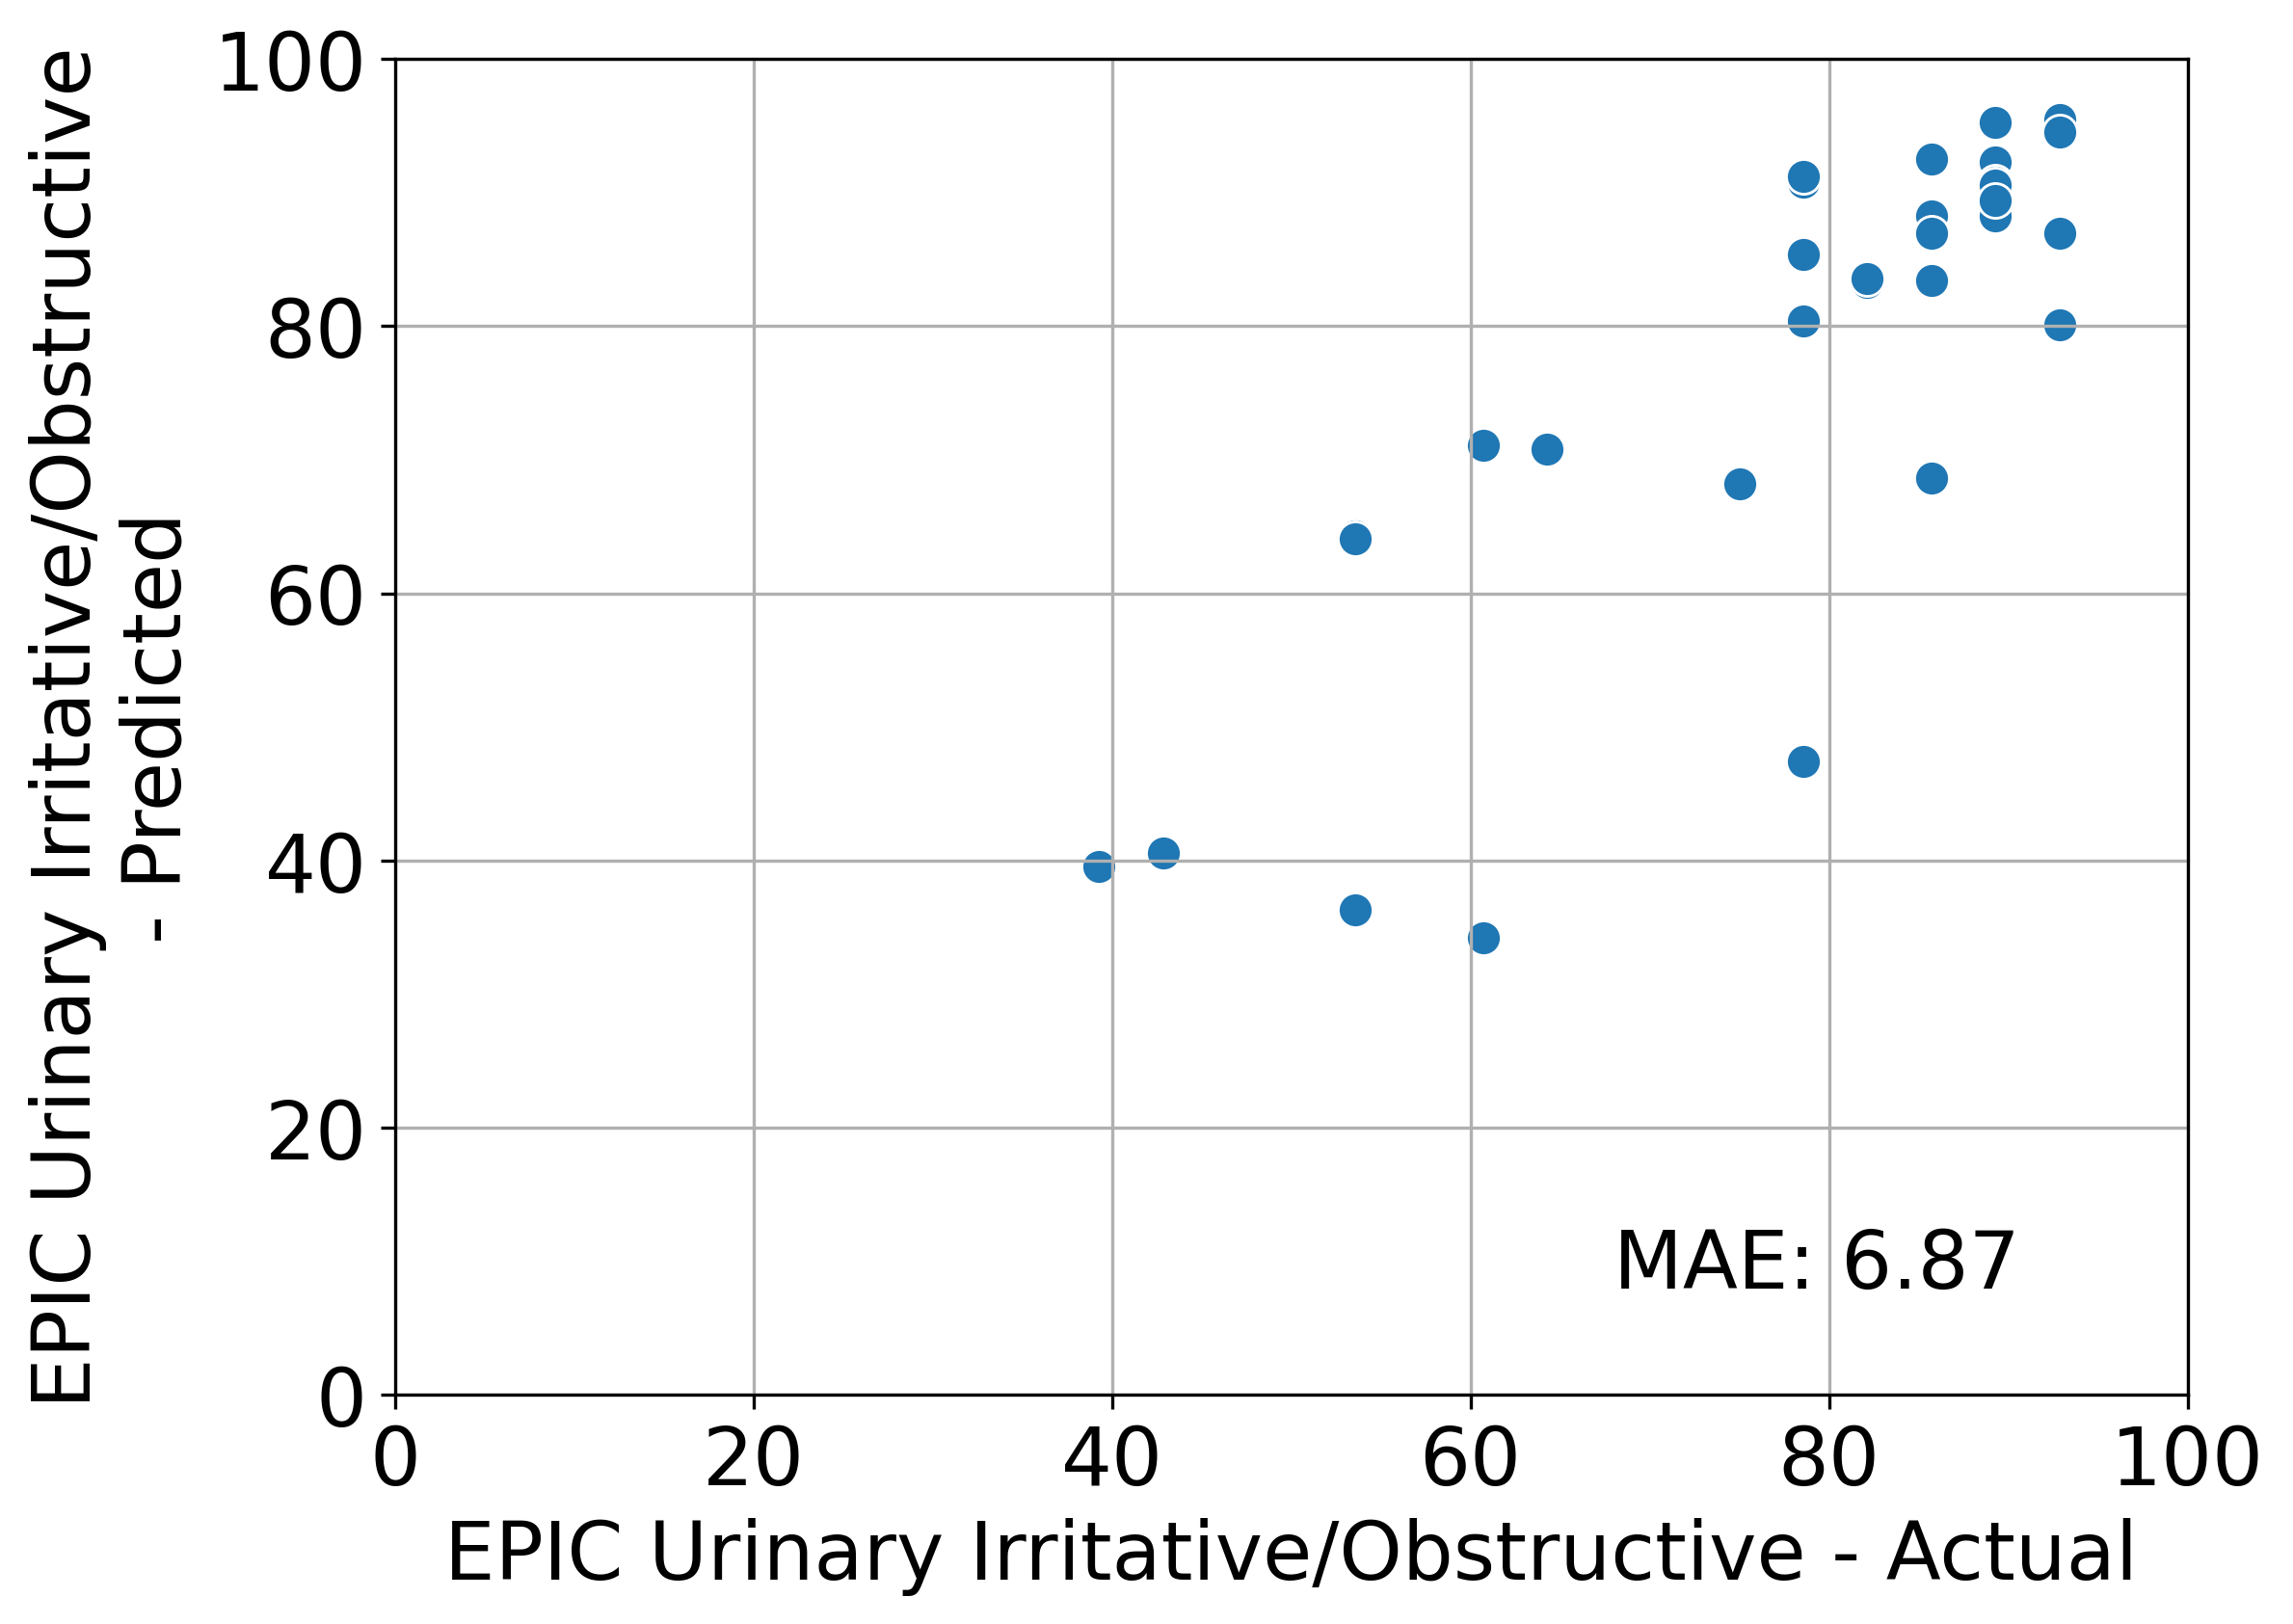

In [41]:
# Plot predictions vs. actual
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_irritative_obstructive, y=xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions, s=75
)
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Irritative/Obstructive - Actual", ylabel="EPIC Urinary Irritative/Obstructive\n- Predicted"
)

# Calculate and plot mean absolute error
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae = mean_absolute_error(y_test_epic_urinary_irritative_obstructive, xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_predictions)
xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.text(68,8,f"MAE: {xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/xgboost_predict_urinary_irritative_obstructive_from_all_ipss_questions_plot.png", bbox_inches='tight')

## Predict EPIC urinary summary using all IPSS questions

### Linear Regression

In [42]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_urinary_summary_from_all_ipss_questions_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)
linear_regression_predict_urinary_summary_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_summary)

RandomizedSearchCV(cv=4, estimator=LinearRegression(), n_iter=1,
                   param_distributions={}, scoring='neg_mean_absolute_error')

In [43]:
# Make predictions for test set
linear_regression_predict_urinary_summary_from_all_ipss_questions_predictions = (
    linear_regression_predict_urinary_summary_from_all_ipss_questions_cv.predict(X_test_all_ipss_questions)
)
linear_regression_predict_urinary_summary_from_all_ipss_questions_predictions

array([85.53342979, 82.28350167, 53.8547919 , 75.97620333, 83.3551675 ,
       42.96608444, 84.36221969, 87.42364825, 89.88086956, 89.21221099,
       83.19302062, 79.71342838, 57.66967555, 82.90491265, 75.24599871,
       86.15078243, 53.55590997, 72.23693097, 75.97620333, 40.6299805 ,
       71.0546228 , 29.68083181, 59.07664645, 64.46216325, 73.09207806,
       91.16493165, 81.29160589, 60.60108469, 83.01776464, 32.76866354,
       39.92595945, 89.99372155, 86.93229298])

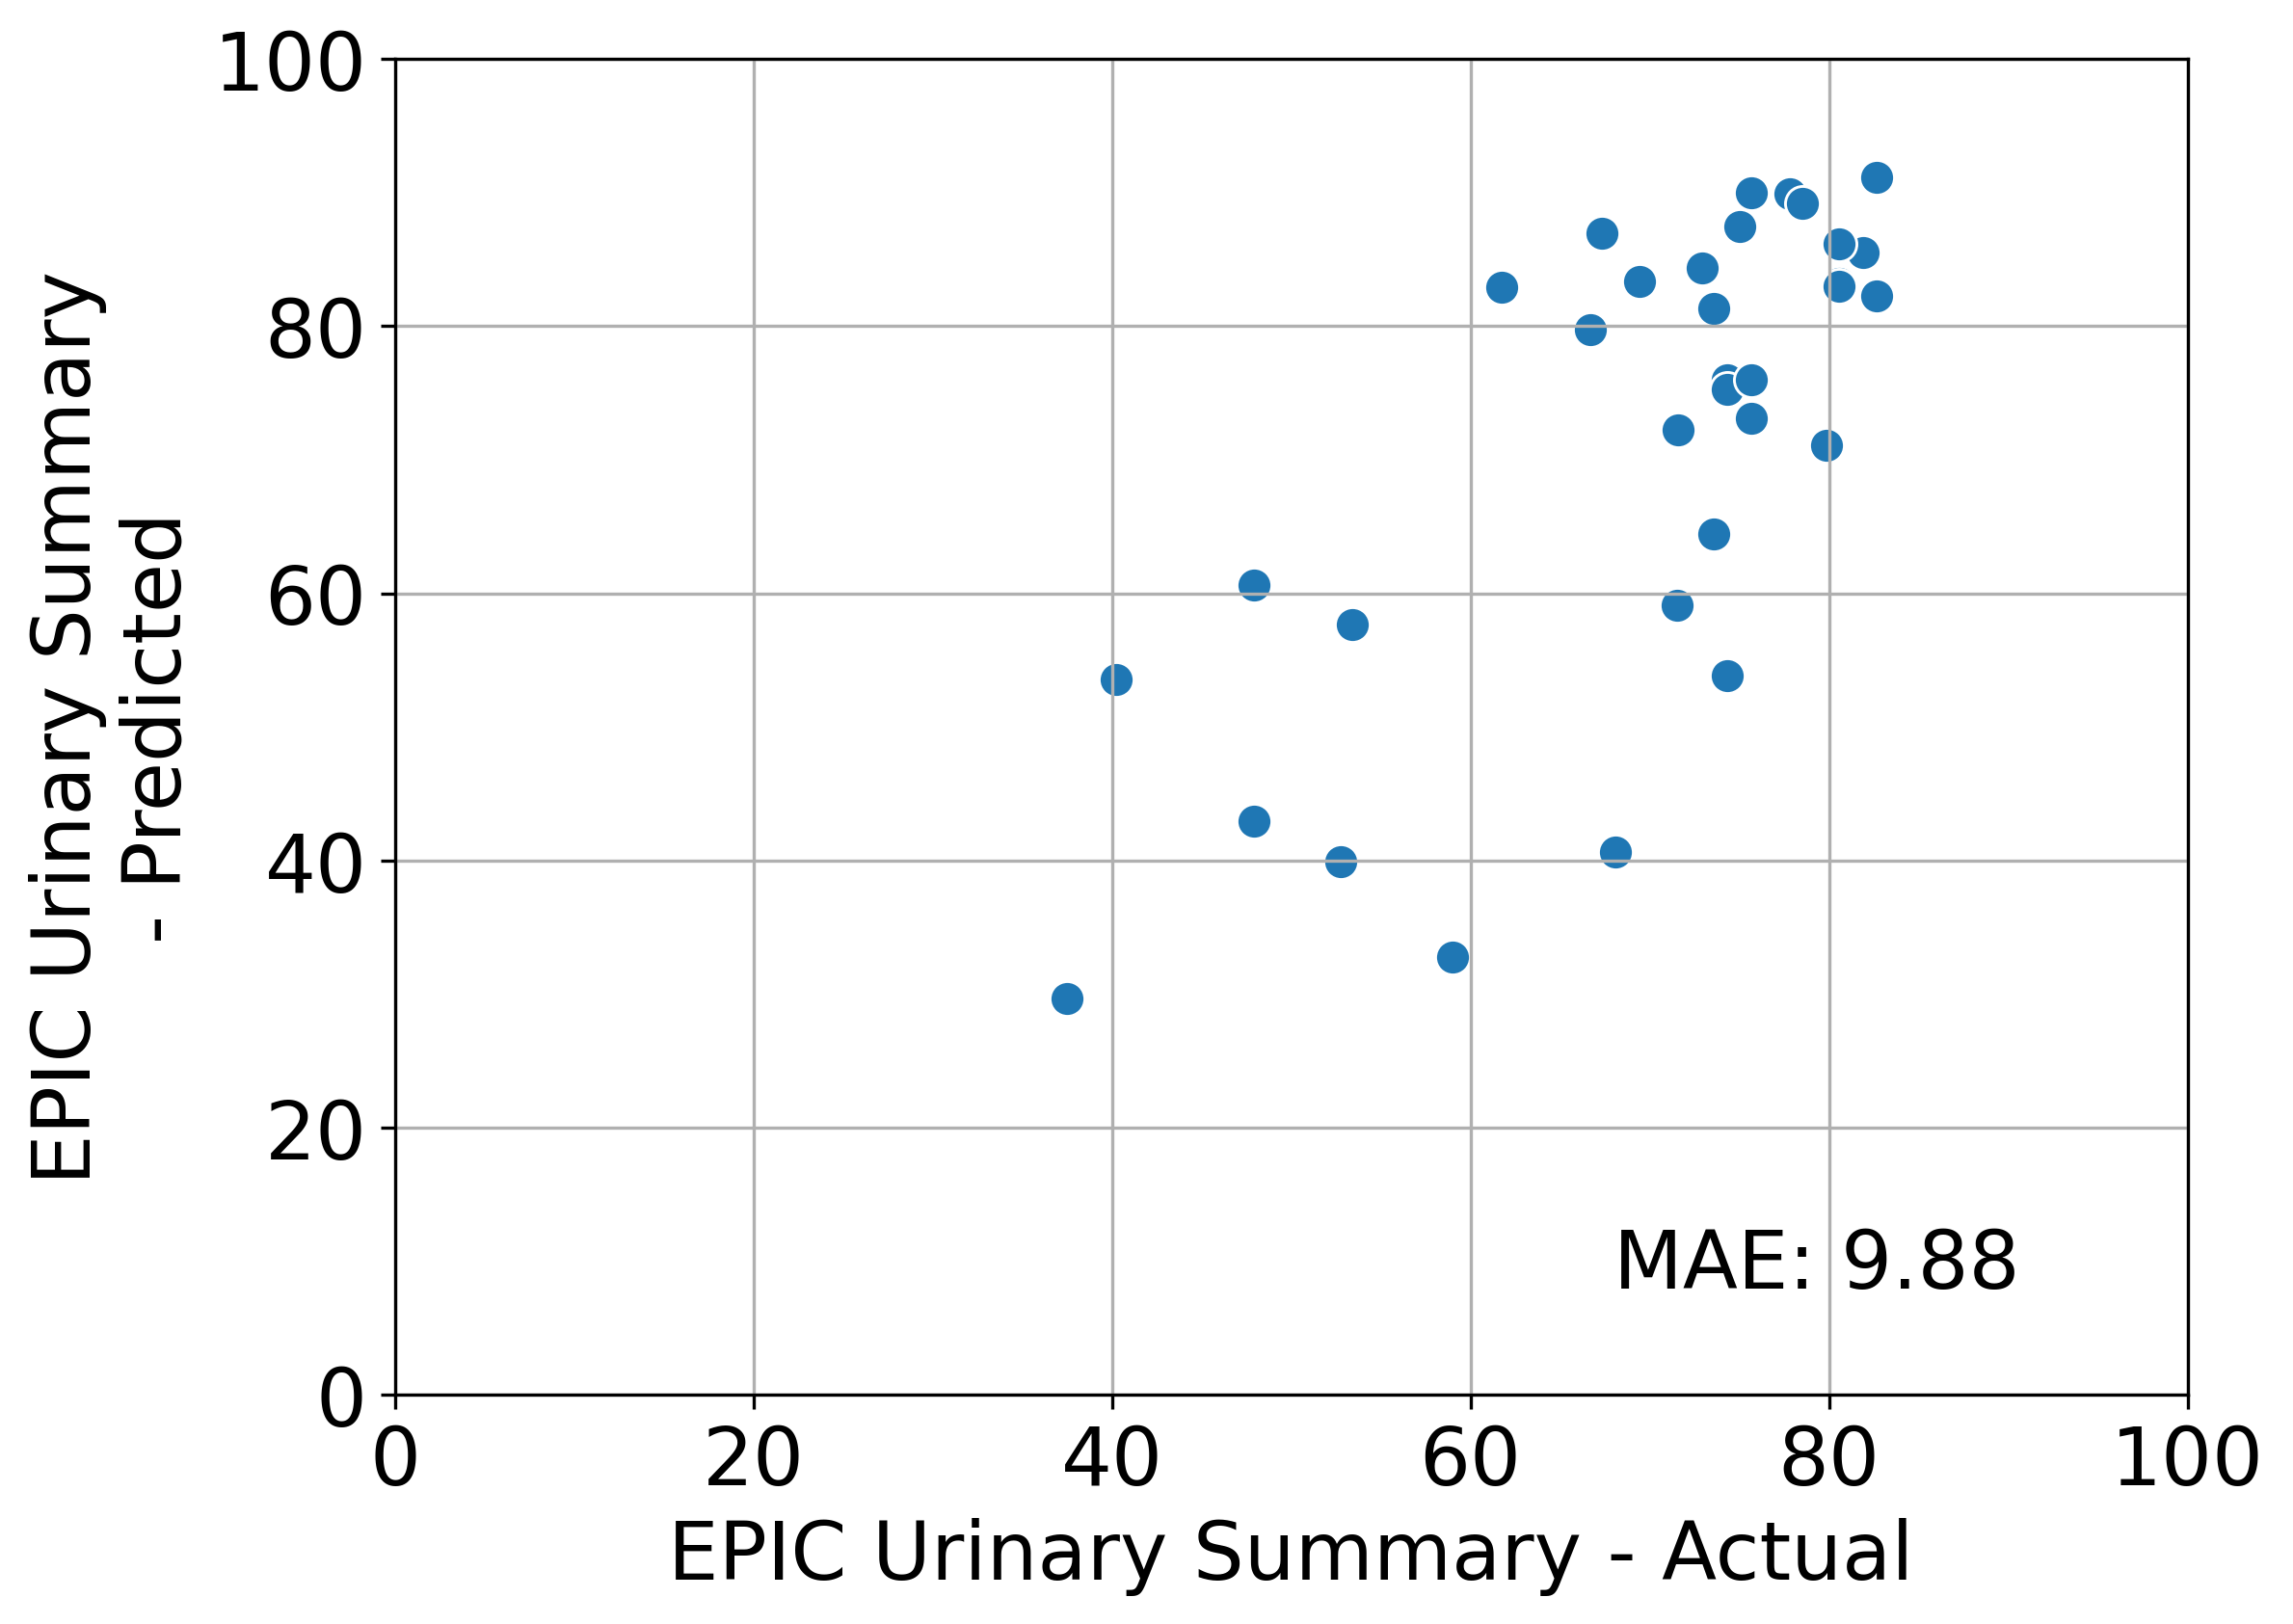

In [44]:
# Plot predictions vs. actual
linear_regression_predict_urinary_summary_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_summary, y=linear_regression_predict_urinary_summary_from_all_ipss_questions_predictions, s=75
)
linear_regression_predict_urinary_summary_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
linear_regression_predict_urinary_summary_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Summary - Actual", ylabel="EPIC Urinary Summary\n- Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_urinary_summary_from_all_ipss_questions_mae = mean_absolute_error(y_test_epic_urinary_summary, linear_regression_predict_urinary_summary_from_all_ipss_questions_predictions)
linear_regression_predict_urinary_summary_from_all_ipss_questions_plot.text(68,8,f"MAE: {linear_regression_predict_urinary_summary_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_urinary_summary_from_all_ipss_questions_plot.png", bbox_inches='tight')

### Support Vector Regression

In [45]:
# Create and train model
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_cv = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions={
        "kernel": ("linear", "poly", "rbf", "sigmoid"),
        "C": loguniform(1, 1e2),
        "epsilon": loguniform(1e-3, 1),
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_summary)
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END C=10.086466769451109, epsilon=0.0231670448365328, kernel=poly;, score=-13.667 total time=   0.0s
[CV 2/4] END C=10.086466769451109, epsilon=0.0231670448365328, kernel=poly;, score=-17.694 total time=   0.0s
[CV 3/4] END C=10.086466769451109, epsilon=0.0231670448365328, kernel=poly;, score=-9.966 total time=   0.0s
[CV 4/4] END C=10.086466769451109, epsilon=0.0231670448365328, kernel=poly;, score=-11.112 total time=   0.0s
[CV 1/4] END C=54.06324711647862, epsilon=0.03652973614809877, kernel=sigmoid;, score=-141.464 total time=   0.0s
[CV 2/4] END C=54.06324711647862, epsilon=0.03652973614809877, kernel=sigmoid;, score=-156.348 total time=   0.0s
[CV 3/4] END C=54.06324711647862, epsilon=0.03652973614809877, kernel=sigmoid;, score=-112.893 total time=   0.0s
[CV 4/4] END C=54.06324711647862, epsilon=0.03652973614809877, kernel=sigmoid;, score=-171.850 total time=   0.0s
[CV 1/4] END C=12.373575148247575, epsilo

{'C': 1.63129238768171, 'epsilon': 0.21641393428913056, 'kernel': 'linear'}

In [46]:
# Make predictions for test set
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_predictions = (
    support_vector_regression_predict_urinary_summary_from_all_ipss_questions_cv.predict(X_test_all_ipss_questions)
)
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_predictions

array([84.9576785 , 84.57756564, 56.02757969, 77.77956376, 83.19393517,
       40.65998489, 84.33960829, 89.42177354, 92.38504845, 91.20566207,
       82.34533952, 82.1554617 , 54.86639762, 84.40766019, 77.15491639,
       86.12349683, 49.10696971, 73.36319104, 77.77956376, 39.3801039 ,
       73.73866763, 26.81019014, 51.68110408, 67.38897597, 71.21672359,
       92.46194769, 81.10262195, 64.19520297, 83.86648923, 27.43034157,
       30.72405458, 91.84387749, 86.76171224])

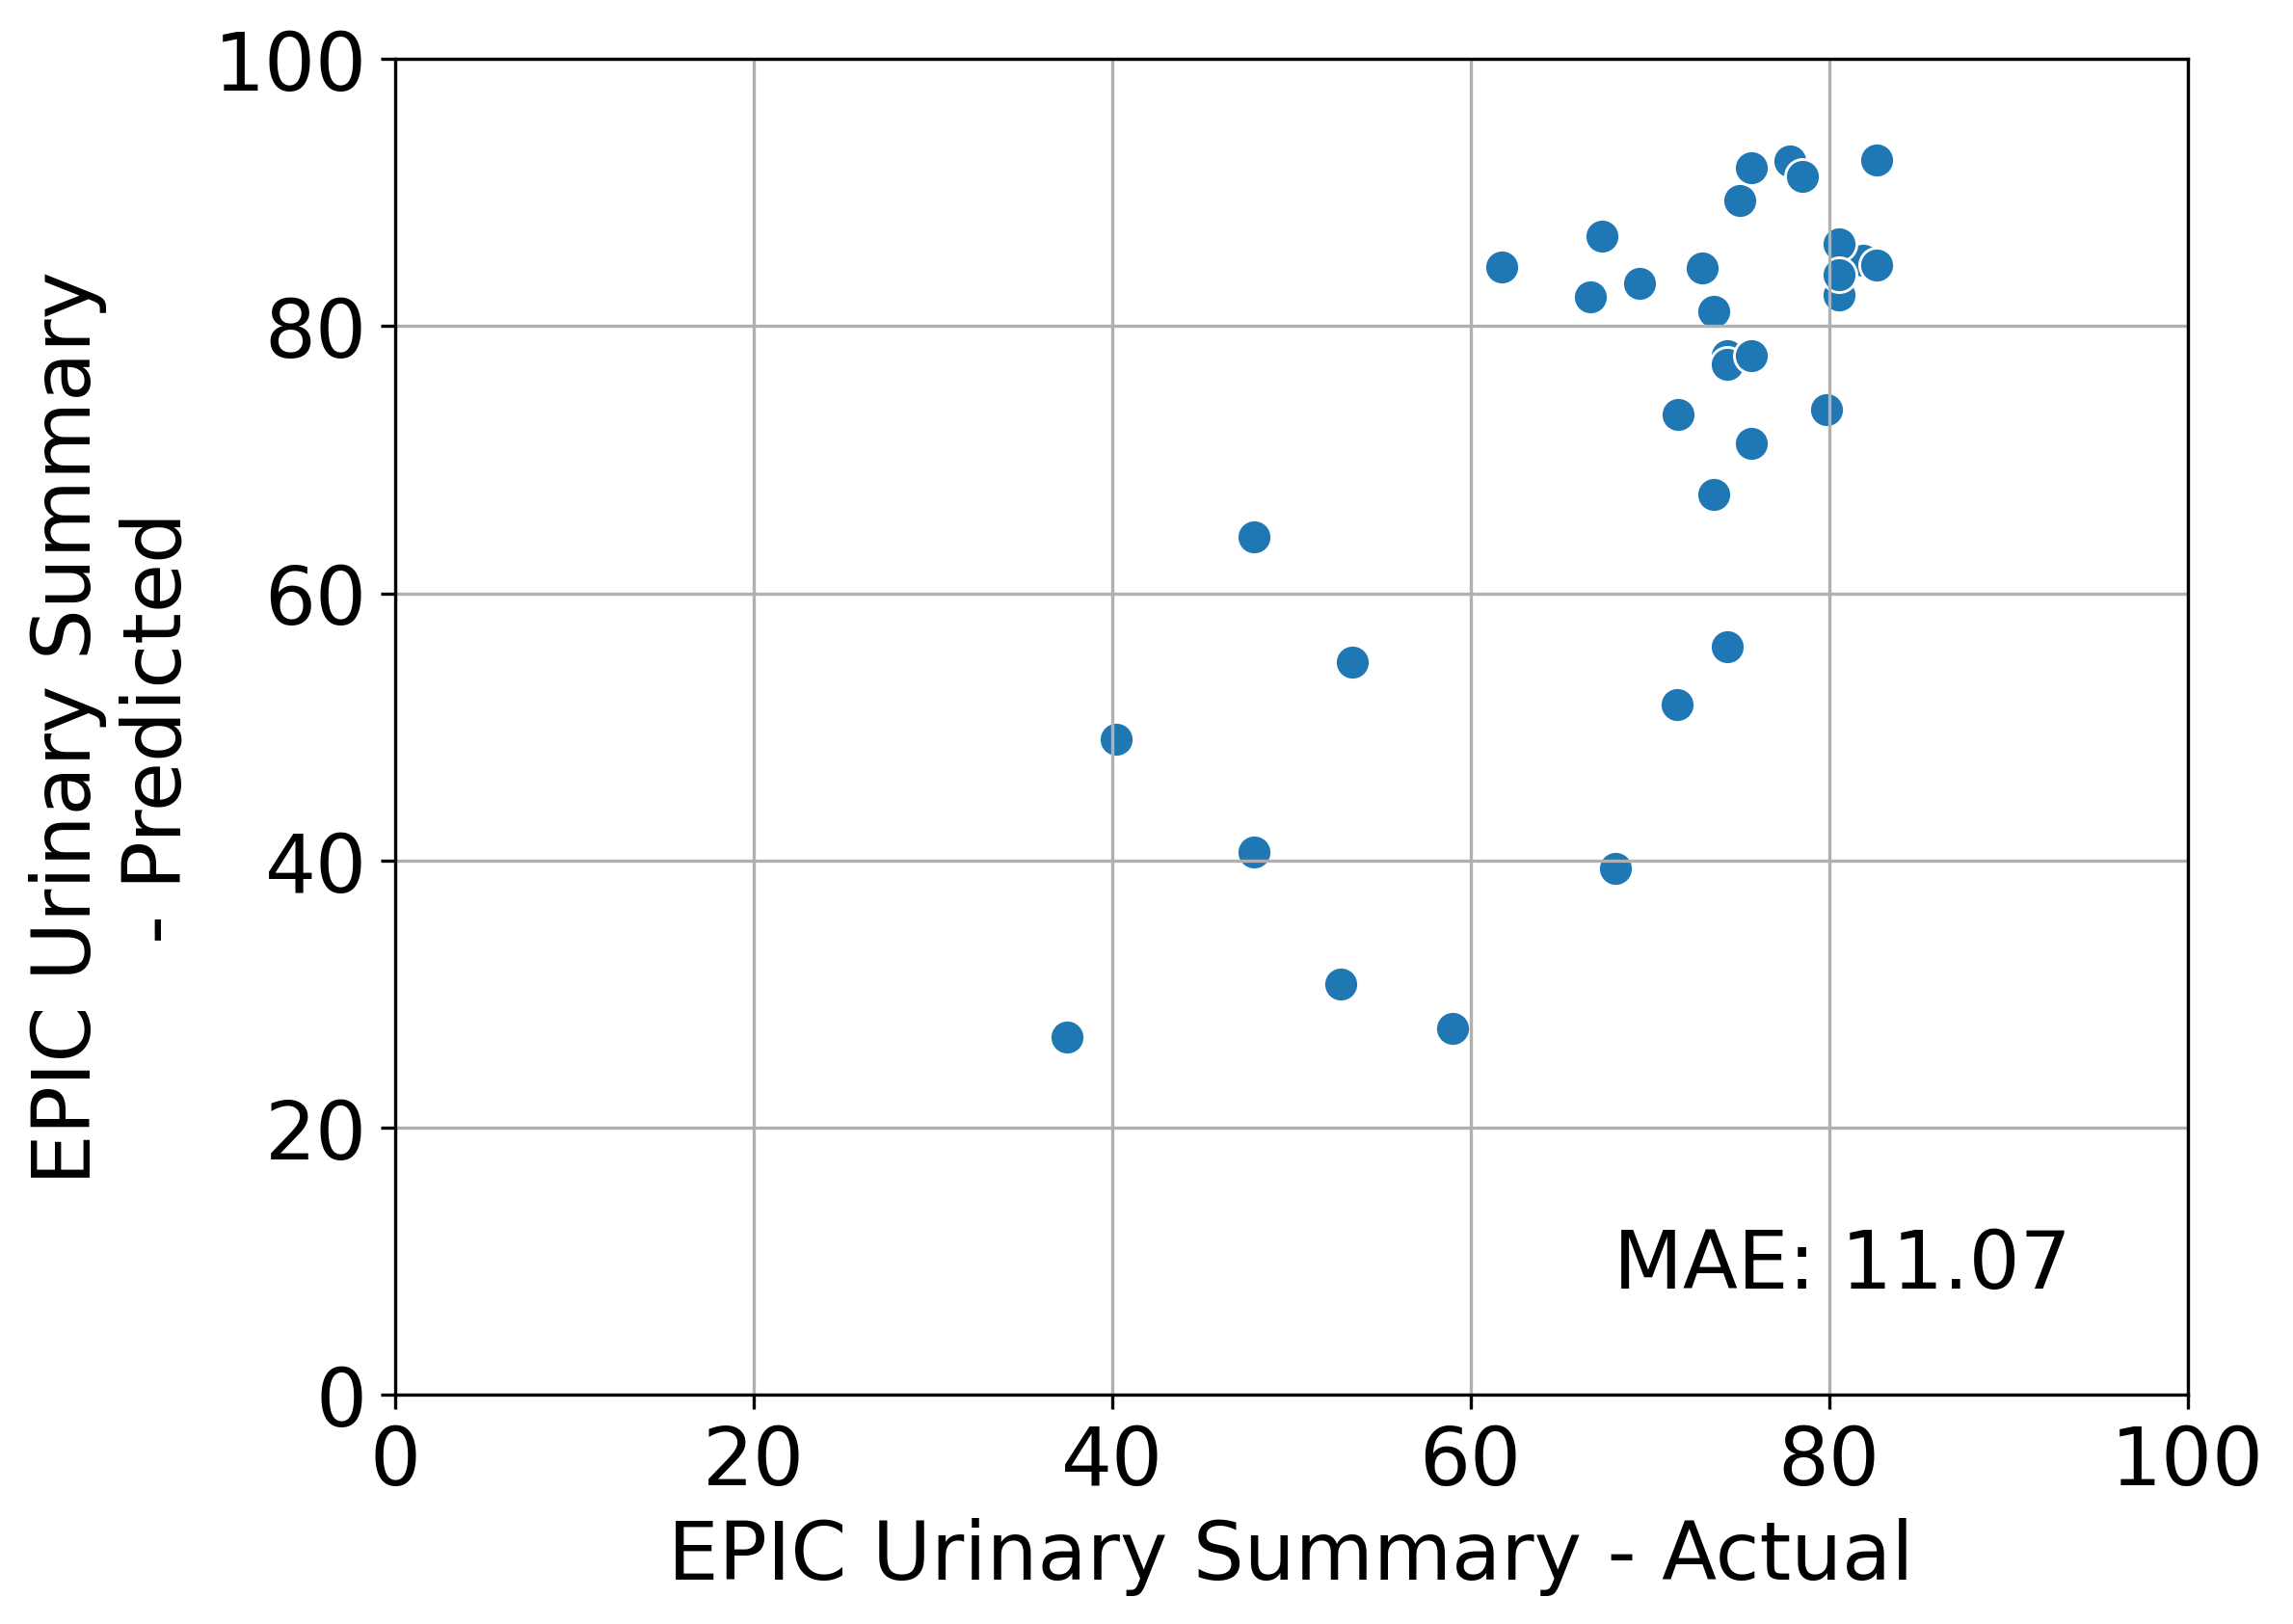

In [47]:
# Plot predictions vs. actual
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_summary, y=support_vector_regression_predict_urinary_summary_from_all_ipss_questions_predictions, s=75
)
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Summary - Actual", ylabel="EPIC Urinary Summary\n- Predicted"
)

# Calculate and plot mean absolute error
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_mae = mean_absolute_error(y_test_epic_urinary_summary, support_vector_regression_predict_urinary_summary_from_all_ipss_questions_predictions)
support_vector_regression_predict_urinary_summary_from_all_ipss_questions_plot.text(68,8,f"MAE: {support_vector_regression_predict_urinary_summary_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/support_vector_regression_predict_urinary_summary_from_all_ipss_questions_plot.png", bbox_inches='tight')

### K-Neighbors Regressor

In [48]:
# Create and train model
kneighbors_predict_urinary_summary_from_all_ipss_questions_cv = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions={
        "n_neighbors": range(1, 10),
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
        "leaf_size": range(1, 50),
        "p": [1, 2],
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

kneighbors_predict_urinary_summary_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_summary)
kneighbors_predict_urinary_summary_from_all_ipss_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END algorithm=ball_tree, leaf_size=32, n_neighbors=7, p=1, weights=uniform;, score=-10.677 total time=   0.0s
[CV 2/4] END algorithm=ball_tree, leaf_size=32, n_neighbors=7, p=1, weights=uniform;, score=-9.917 total time=   0.0s
[CV 3/4] END algorithm=ball_tree, leaf_size=32, n_neighbors=7, p=1, weights=uniform;, score=-7.884 total time=   0.0s
[CV 4/4] END algorithm=ball_tree, leaf_size=32, n_neighbors=7, p=1, weights=uniform;, score=-10.068 total time=   0.0s
[CV 1/4] END algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=1, weights=distance;, score=-10.653 total time=   0.0s
[CV 2/4] END algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=1, weights=distance;, score=-9.541 total time=   0.0s
[CV 3/4] END algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=1, weights=distance;, score=-9.722 total time=   0.0s
[CV 4/4] END algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=1, weights=distance;, score=-10.406 total t

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 9,
 'leaf_size': 10,
 'algorithm': 'kd_tree'}

In [49]:
# Make predictions for test set
kneighbors_predict_urinary_summary_from_all_ipss_questions_predictions = kneighbors_predict_urinary_summary_from_all_ipss_questions_cv.predict(
    X_test_all_ipss_questions
)
kneighbors_predict_urinary_summary_from_all_ipss_questions_predictions

array([86.4537037 , 87.07407407, 69.80555556, 80.21296296, 83.67592593,
       44.58333333, 82.13888889, 87.61111111, 95.62037037, 92.07407407,
       81.05555556, 84.87962963, 66.67592593, 81.28703704, 80.12037037,
       83.21296296, 58.26851852, 75.07407407, 80.21296296, 58.49074074,
       81.0462963 , 44.66666667, 73.24074074, 78.80555556, 72.38888889,
       91.14814815, 80.98148148, 71.55555556, 85.4537037 , 40.87962963,
       45.89814815, 90.84259259, 84.91666667])

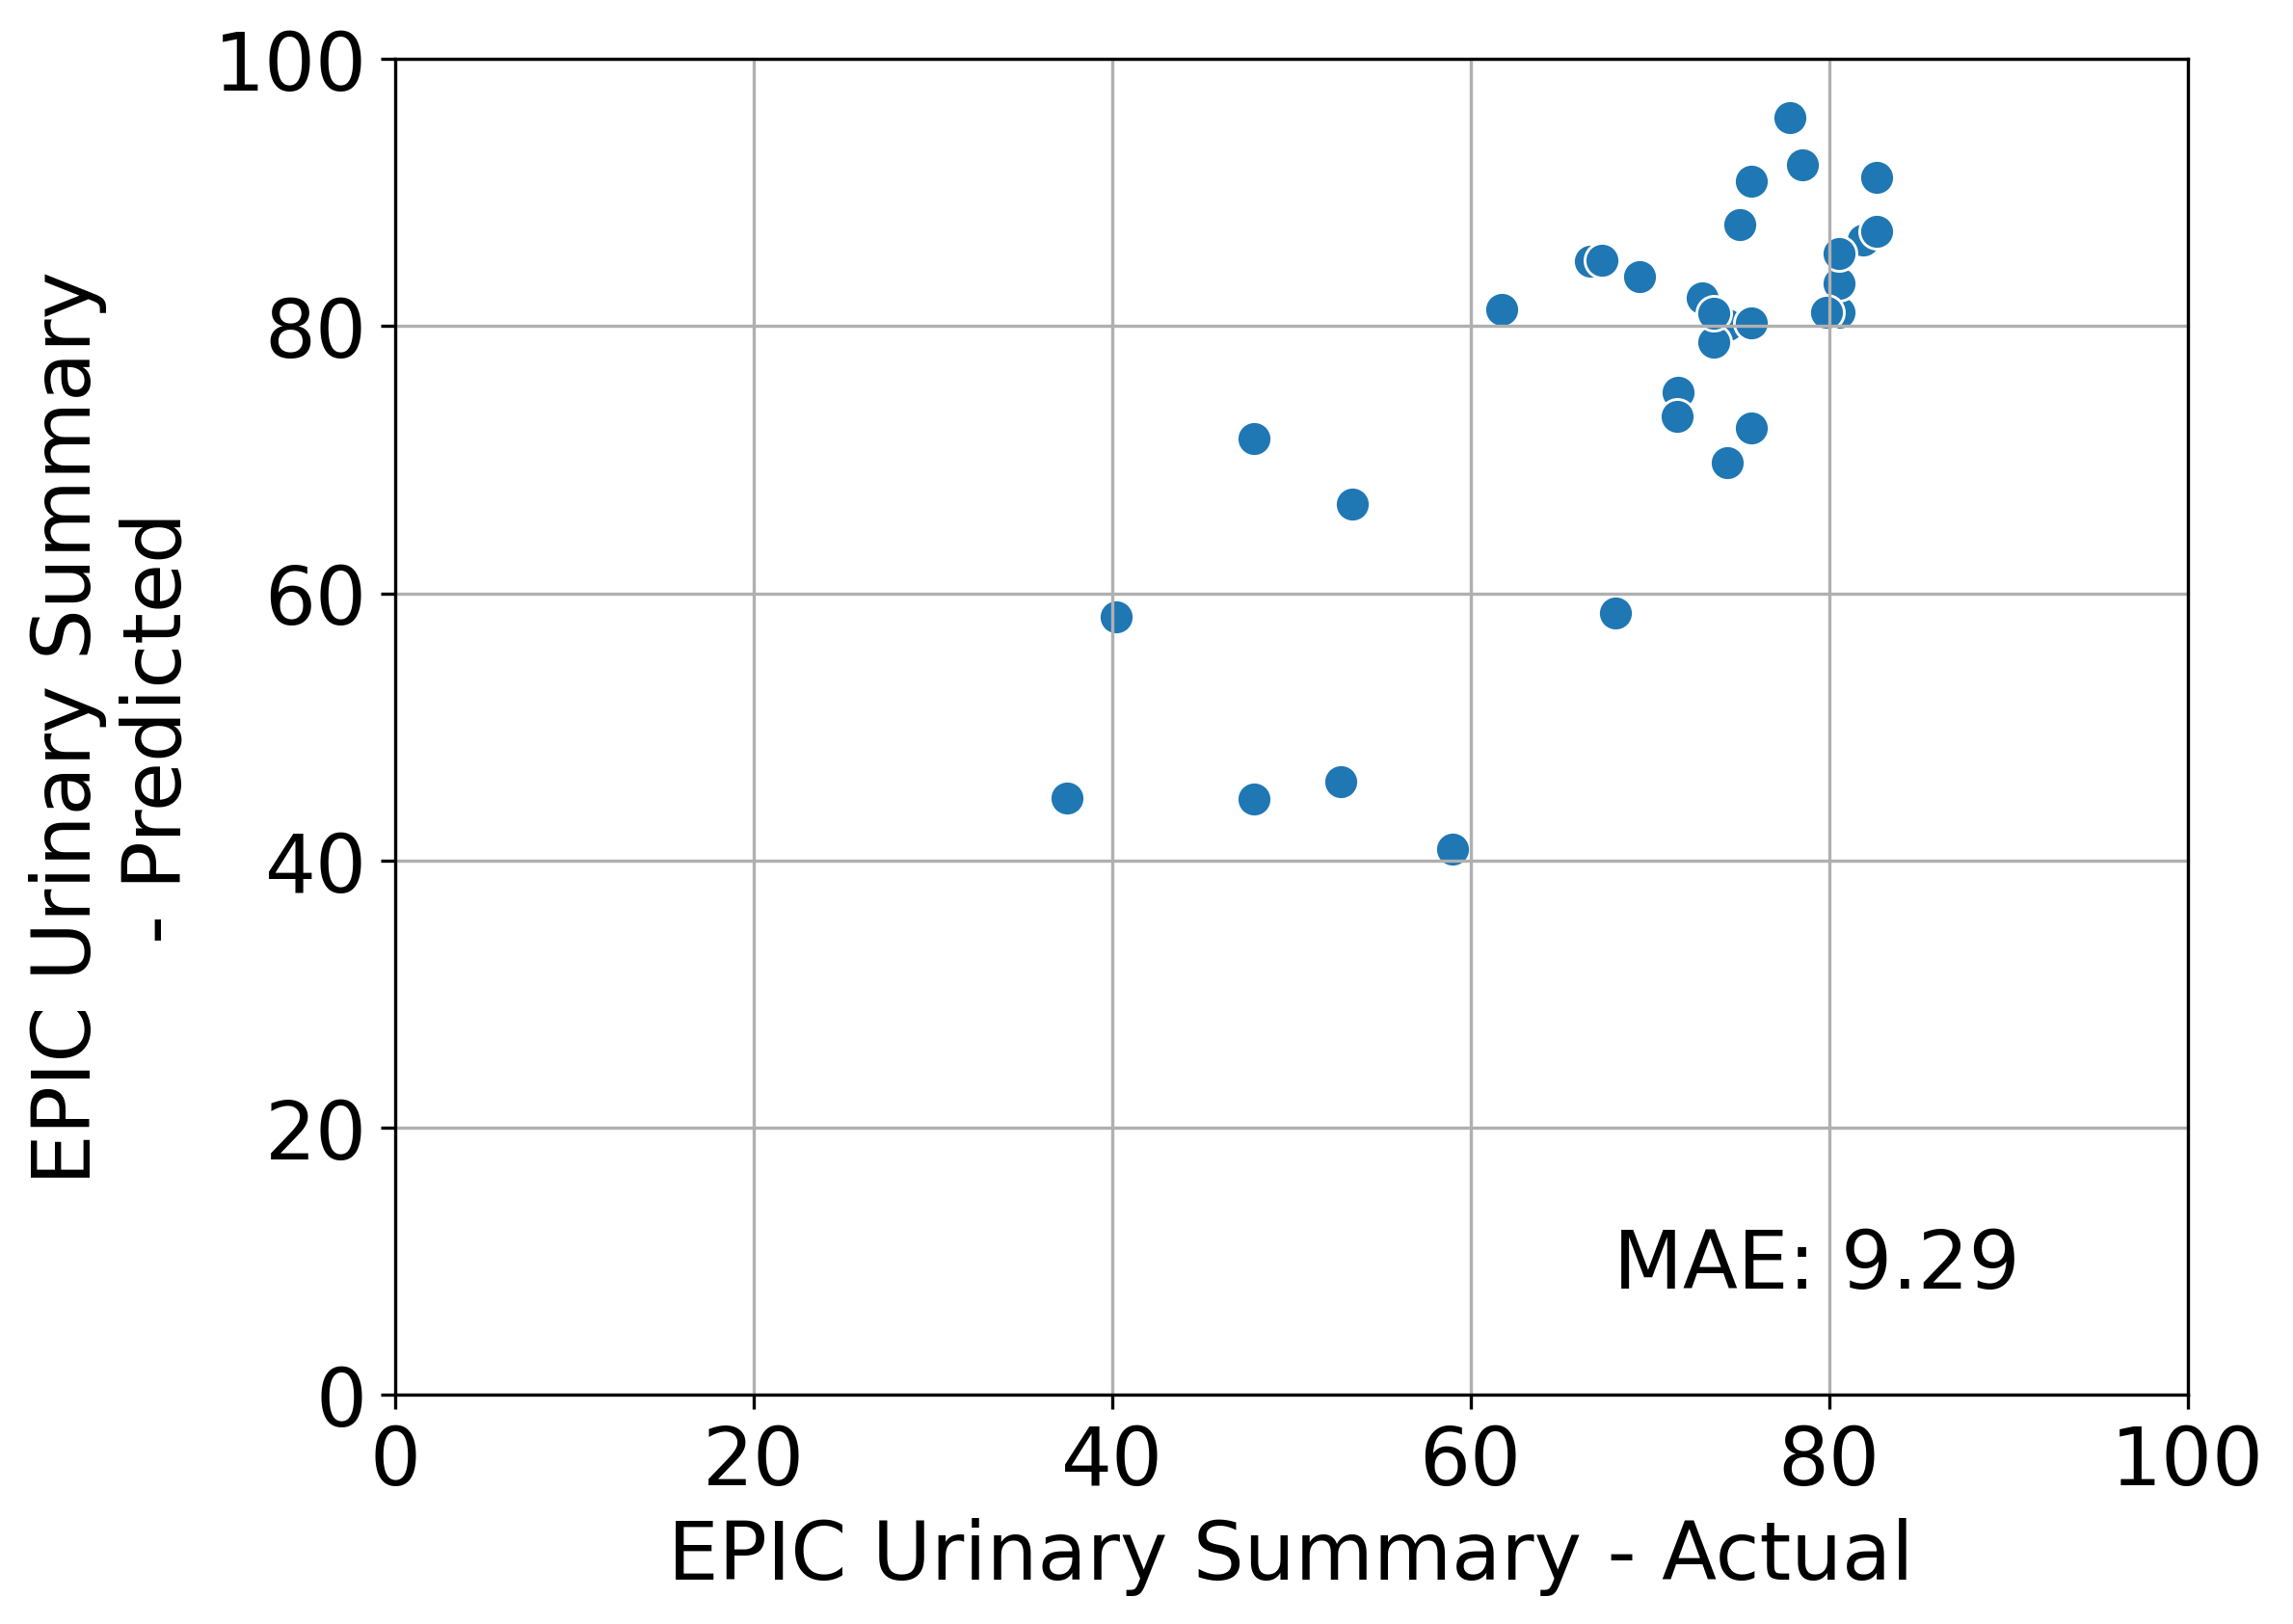

In [50]:
# Plot predictions vs. actual
kneighbors_predict_urinary_summary_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_summary, y=kneighbors_predict_urinary_summary_from_all_ipss_questions_predictions, s=75
)
kneighbors_predict_urinary_summary_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
kneighbors_predict_urinary_summary_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Summary - Actual", ylabel="EPIC Urinary Summary\n- Predicted"
)

# Calculate and plot mean absolute error
kneighbors_predict_urinary_summary_from_all_ipss_questions_mae = mean_absolute_error(y_test_epic_urinary_summary, kneighbors_predict_urinary_summary_from_all_ipss_questions_predictions)
kneighbors_predict_urinary_summary_from_all_ipss_questions_plot.text(68,8,f"MAE: {kneighbors_predict_urinary_summary_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/kneighbors_predict_urinary_summary_from_all_ipss_questions_plot.png", bbox_inches='tight')

### XGBoost

In [51]:
# Create and train model
xgboost_predict_urinary_summary_from_all_ipss_questions_cv = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions={
        "learning_rate": loguniform(1e-2, 1),
        "gamma": range(0, 5),
        "max_depth": range(1, 8),
        "min_child_weight": range(1, 8),
        "lambda": loguniform(1e-5, 10),
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

xgboost_predict_urinary_summary_from_all_ipss_questions_cv.fit(X_train_all_ipss_questions, y_train_epic_urinary_summary)
xgboost_predict_urinary_summary_from_all_ipss_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END gamma=4, lambda=0.02504953312562864, learning_rate=0.01989615215586146, max_depth=1, min_child_weight=1;, score=-15.471 total time=   0.0s
[CV 2/4] END gamma=4, lambda=0.02504953312562864, learning_rate=0.01989615215586146, max_depth=1, min_child_weight=1;, score=-16.603 total time=   0.0s
[CV 3/4] END gamma=4, lambda=0.02504953312562864, learning_rate=0.01989615215586146, max_depth=1, min_child_weight=1;, score=-11.350 total time=   0.0s
[CV 4/4] END gamma=4, lambda=0.02504953312562864, learning_rate=0.01989615215586146, max_depth=1, min_child_weight=1;, score=-15.590 total time=   0.0s
[CV 1/4] END gamma=2, lambda=0.008624639379002267, learning_rate=0.024093379300560318, max_depth=3, min_child_weight=5;, score=-12.727 total time=   0.0s
[CV 2/4] END gamma=2, lambda=0.008624639379002267, learning_rate=0.024093379300560318, max_depth=3, min_child_weight=5;, score=-15.034 total time=   0.0s
[CV 3/4] END gamma=2

{'gamma': 0,
 'lambda': 0.05517669505582872,
 'learning_rate': 0.09191781160050662,
 'max_depth': 1,
 'min_child_weight': 1}

In [52]:
# Make predictions for test set
xgboost_predict_urinary_summary_from_all_ipss_questions_predictions = xgboost_predict_urinary_summary_from_all_ipss_questions_cv.predict(
    X_test_all_ipss_questions
)
xgboost_predict_urinary_summary_from_all_ipss_questions_predictions

array([83.25986 , 83.035416, 54.183723, 74.52971 , 82.81533 , 36.78648 ,
       83.25986 , 89.69568 , 90.32546 , 90.45338 , 76.755936, 83.035416,
       58.37978 , 81.94766 , 79.6169  , 84.017555, 50.9705  , 74.68604 ,
       74.52971 , 42.32132 , 77.90988 , 31.650728, 57.279602, 66.94076 ,
       65.92574 , 89.69568 , 76.62802 , 71.24962 , 81.31788 , 26.142735,
       36.351883, 89.69568 , 83.25986 ], dtype=float32)

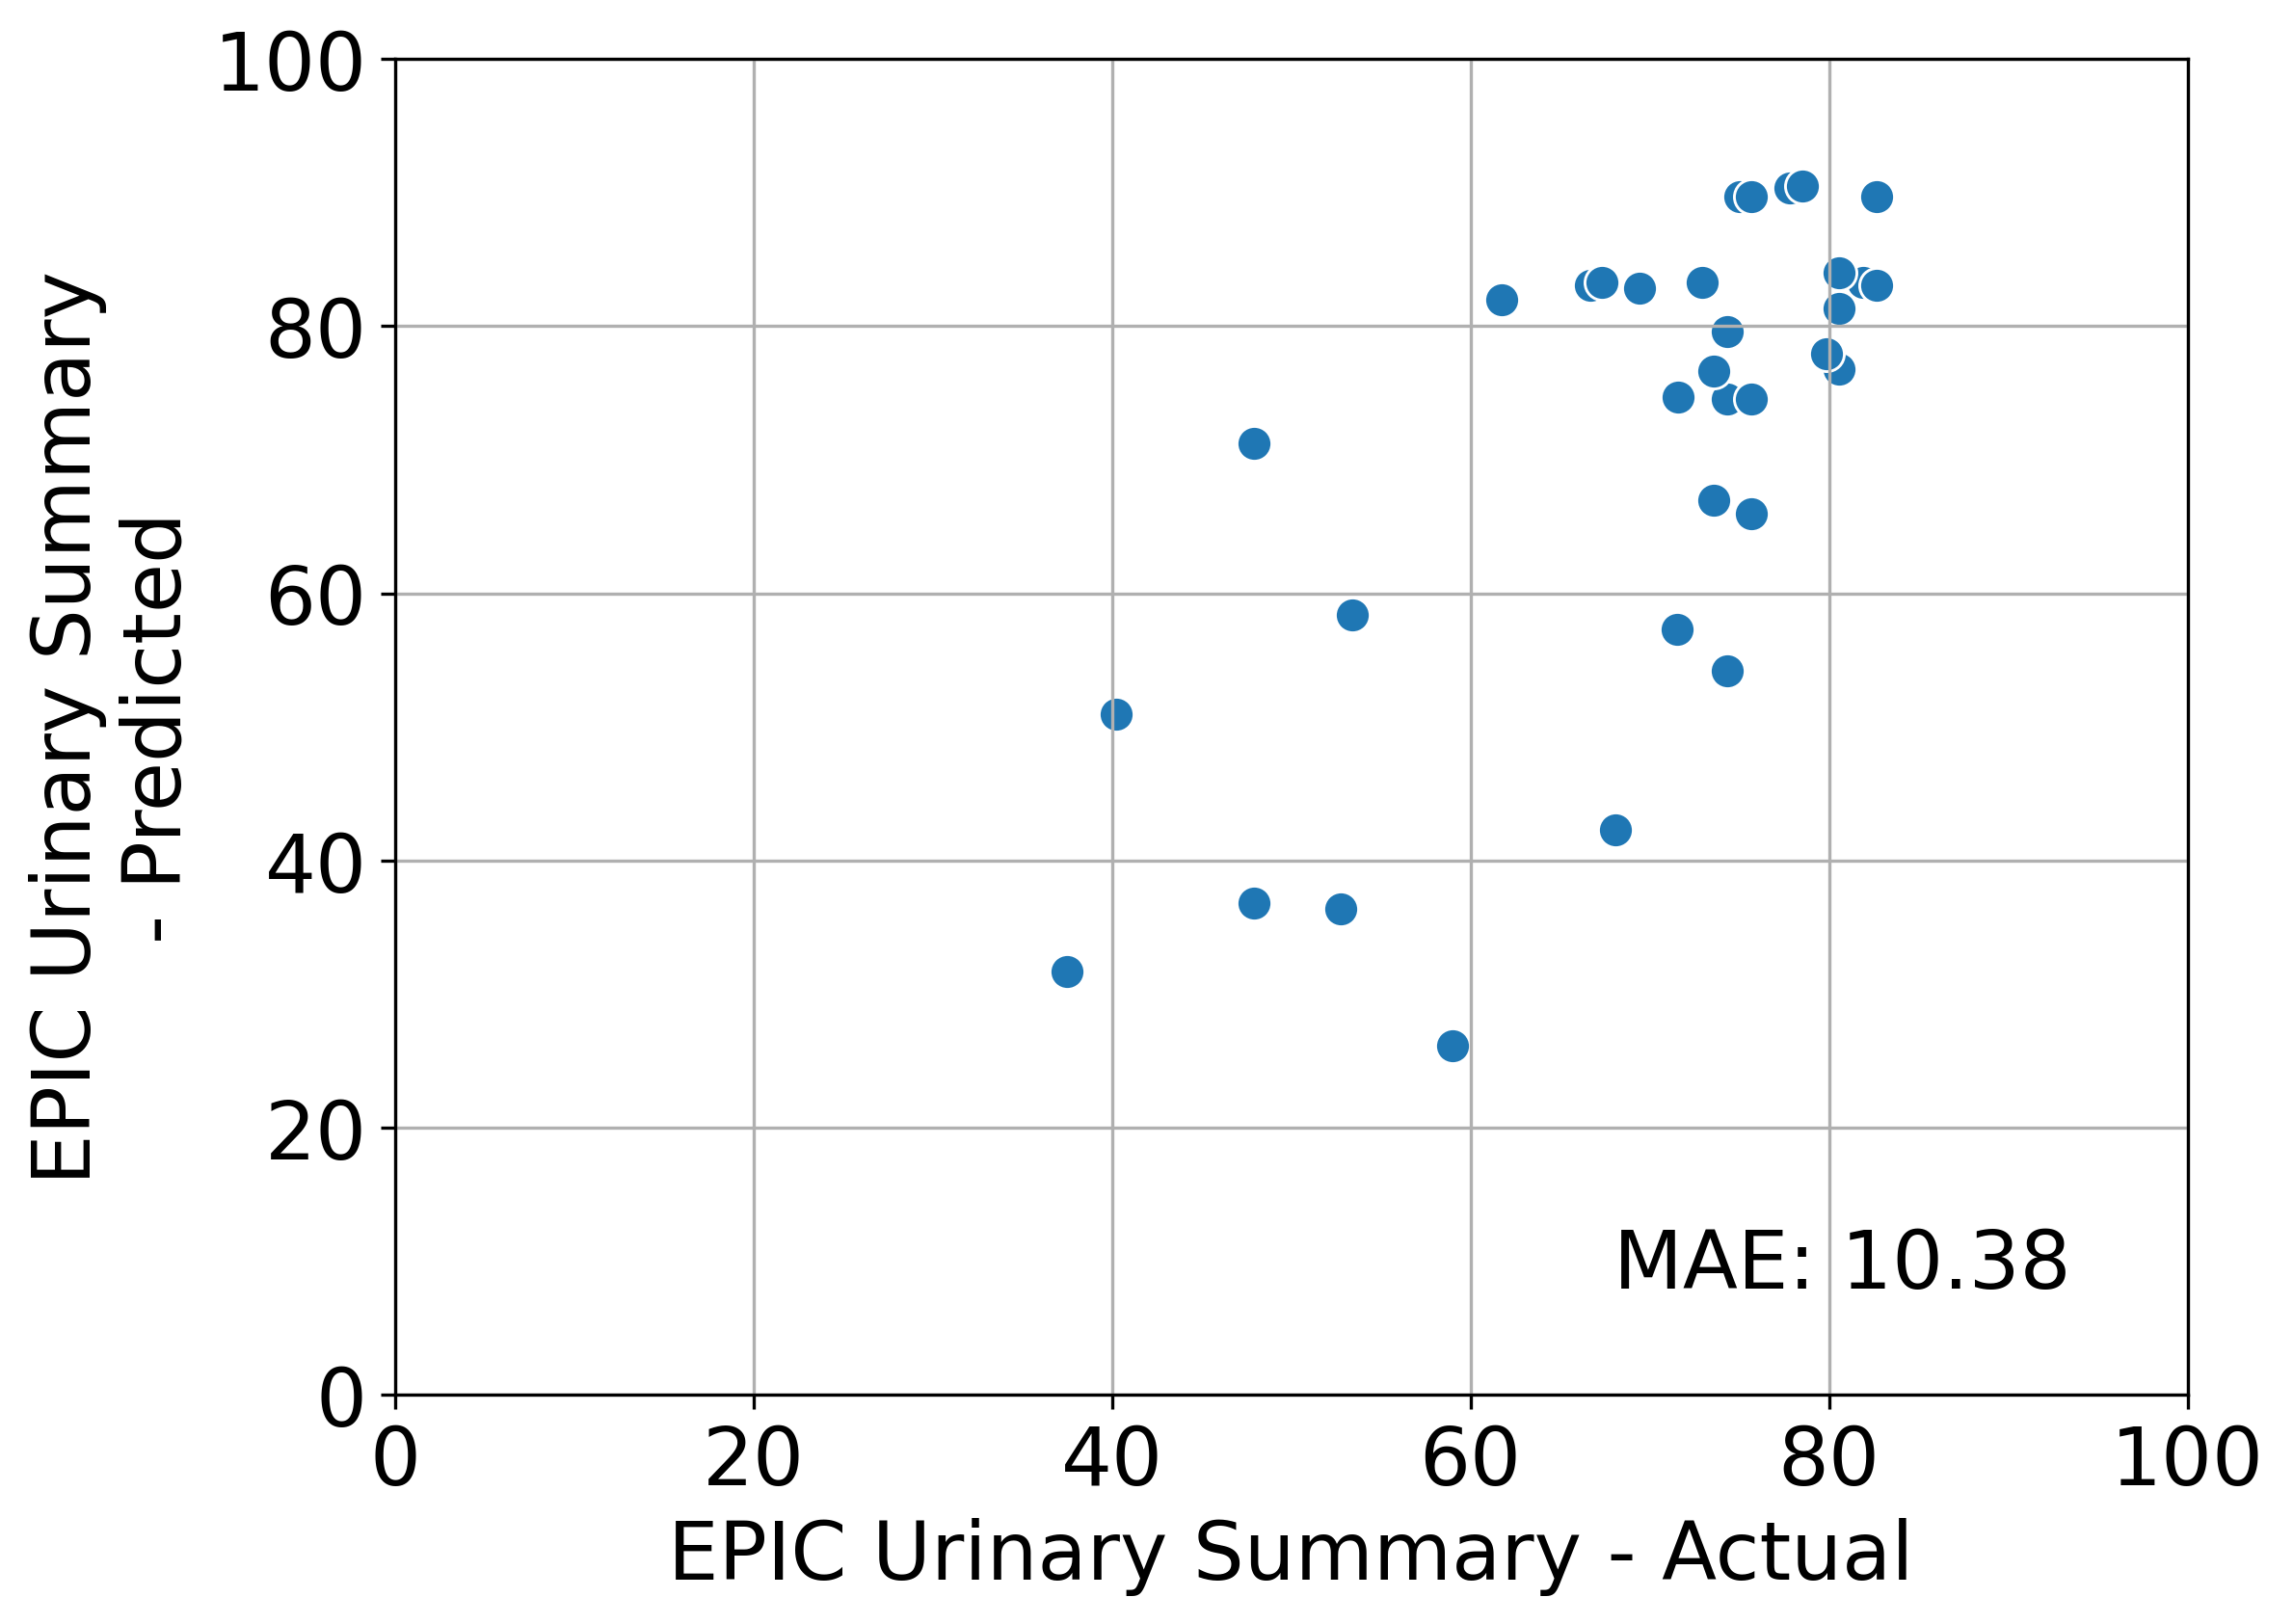

In [53]:
# Plot predictions vs. actual
xgboost_predict_urinary_summary_from_all_ipss_questions_plot = sns.scatterplot(
    x=y_test_epic_urinary_summary, y=xgboost_predict_urinary_summary_from_all_ipss_questions_predictions, s=75
)
xgboost_predict_urinary_summary_from_all_ipss_questions_plot.set(xlim=(0, 100), ylim=(0, 100))
xgboost_predict_urinary_summary_from_all_ipss_questions_plot.set(
    xlabel="EPIC Urinary Summary - Actual", ylabel="EPIC Urinary Summary\n- Predicted"
)

# Calculate and plot mean absolute error
xgboost_predict_urinary_summary_from_all_ipss_questions_mae = mean_absolute_error(y_test_epic_urinary_summary, xgboost_predict_urinary_summary_from_all_ipss_questions_predictions)
xgboost_predict_urinary_summary_from_all_ipss_questions_plot.text(68,8,f"MAE: {xgboost_predict_urinary_summary_from_all_ipss_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/xgboost_predict_urinary_summary_from_all_ipss_questions_plot.png", bbox_inches='tight')

## Predict IPSS total using all EPIC urinary questions

### Linear Regression


In [58]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_cv.fit(X_train_all_epic_urinary_questions, y_train_ipss_total)

RandomizedSearchCV(cv=4, estimator=LinearRegression(), n_iter=1,
                   param_distributions={}, scoring='neg_mean_absolute_error')

In [59]:
# Make predictions for test set
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions = (
    linear_regression_predict_ipss_total_from_all_epic_urinary_questions_cv.predict(X_test_all_epic_urinary_questions)
)
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions

array([ 6.90106771,  7.48633552,  6.79523155,  5.63139361,  6.58281732,
       22.8117847 ,  6.33786156,  5.32827872,  3.38481079,  5.21786221,
        3.02397488,  4.68072327, 11.90327887,  4.58193685,  7.0903269 ,
        4.35566495, 13.97575893,  8.18138833,  5.97702565, 14.65191926,
        4.0014085 , 20.49243888, 10.99777259,  4.65074869, 10.8920619 ,
        3.38963064,  5.10928503, 20.1988533 ,  4.35566495, 18.29310114,
       21.71896922,  4.60178707,  6.48885075])

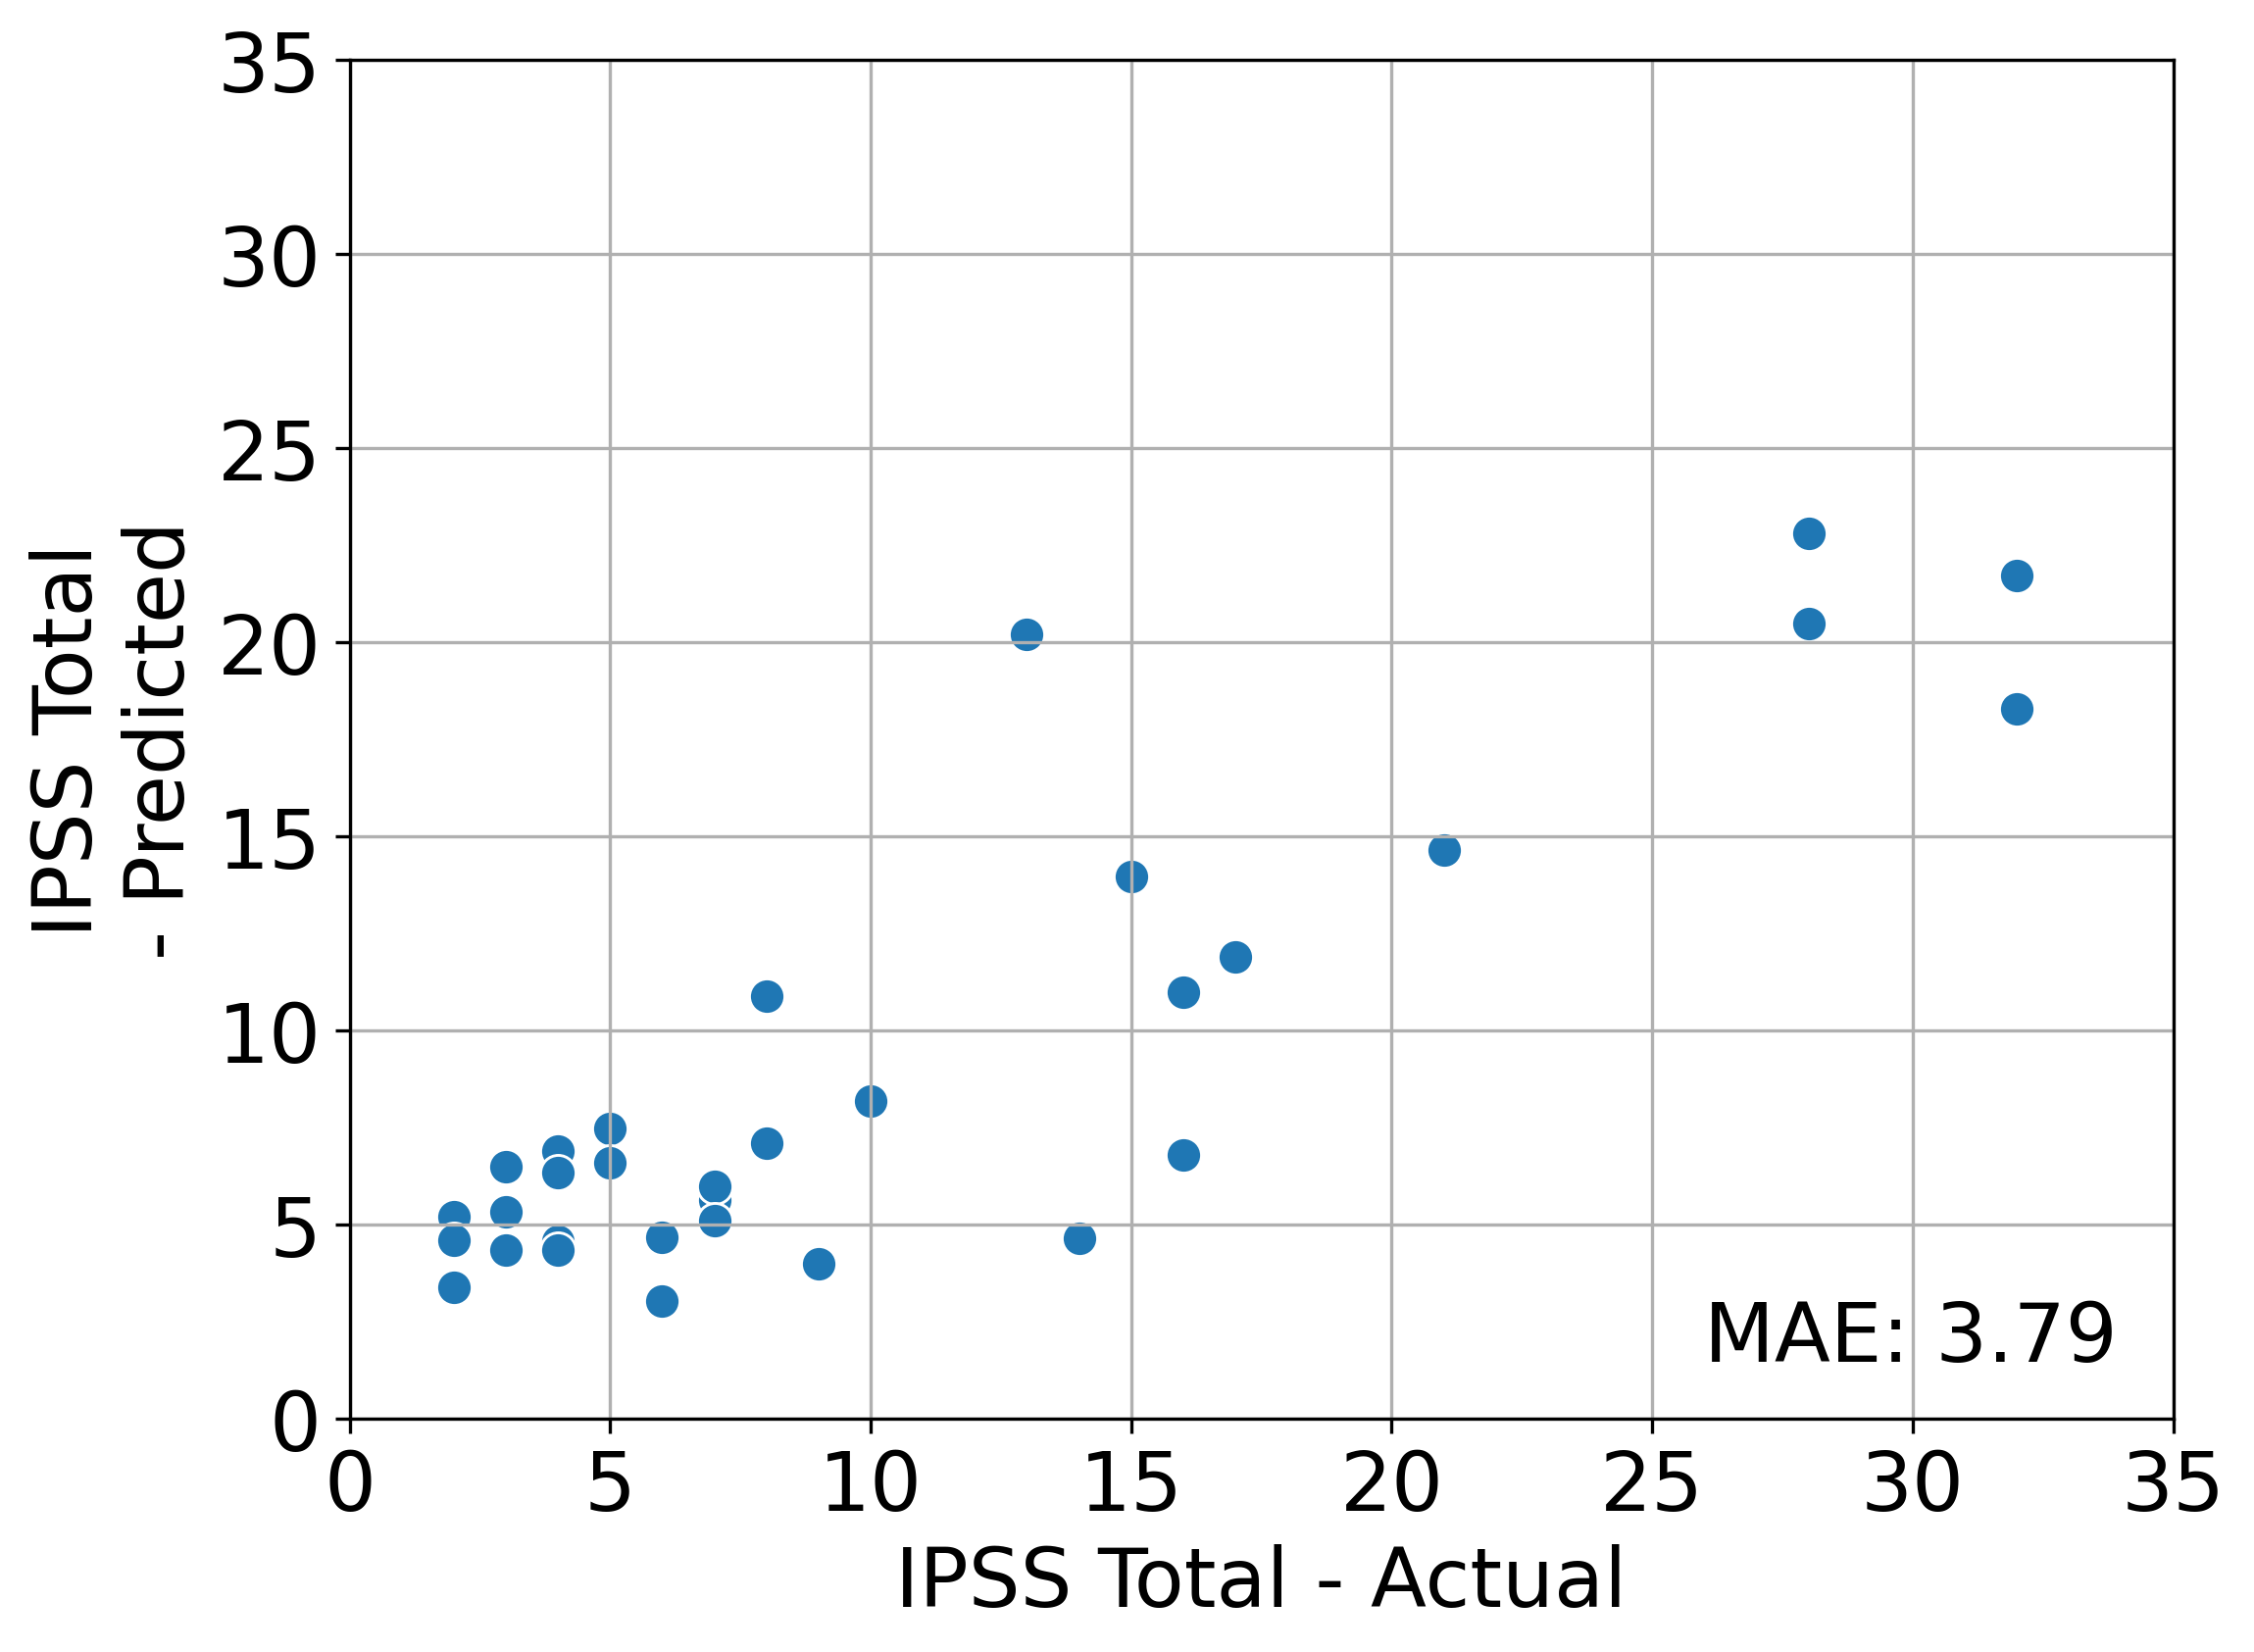

In [61]:
# Plot predictions vs. actual
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=linear_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions, s=75
)
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_ipss_total_from_all_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, linear_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {linear_regression_predict_ipss_total_from_all_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_ipss_total_from_all_epic_urinary_questions_plot.png", bbox_inches='tight')

### Support Vector Regression

In [62]:
# Create and train model
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_cv = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions={
        "kernel": ("linear", "poly", "rbf", "sigmoid"),
        "C": loguniform(1, 1e2),
        "epsilon": loguniform(1e-3, 1),
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_cv.fit(X_train_all_epic_urinary_questions, y_train_ipss_total)
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END C=2.81532339678654, epsilon=0.4193210840460535, kernel=linear;, score=-2.003 total time=   0.0s
[CV 2/4] END C=2.81532339678654, epsilon=0.4193210840460535, kernel=linear;, score=-3.055 total time=   0.0s
[CV 3/4] END C=2.81532339678654, epsilon=0.4193210840460535, kernel=linear;, score=-2.672 total time=   0.0s
[CV 4/4] END C=2.81532339678654, epsilon=0.4193210840460535, kernel=linear;, score=-2.857 total time=   0.0s
[CV 1/4] END C=17.724777883522776, epsilon=0.001652140383186509, kernel=rbf;, score=-2.551 total time=   0.0s
[CV 2/4] END C=17.724777883522776, epsilon=0.001652140383186509, kernel=rbf;, score=-3.141 total time=   0.0s
[CV 3/4] END C=17.724777883522776, epsilon=0.001652140383186509, kernel=rbf;, score=-2.455 total time=   0.0s
[CV 4/4] END C=17.724777883522776, epsilon=0.001652140383186509, kernel=rbf;, score=-3.072 total time=   0.0s
[CV 1/4] END C=66.05567374076253, epsilon=0.5581821659243201

{'C': 23.199983672894856, 'epsilon': 0.663974252856236, 'kernel': 'linear'}

In [63]:
# Make predictions for test set
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions = (
    support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_cv.predict(X_test_all_epic_urinary_questions)
)
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions

array([ 6.34885737,  6.83071772,  6.45938152,  5.38643439,  6.76035705,
       23.281161  ,  5.59915829,  5.26993511,  4.17647487,  5.25027744,
        3.61303331,  4.37843627, 11.13595701,  4.77984404,  7.63748956,
        4.2597204 , 14.48000736,  7.98199622,  5.03571674, 14.21670696,
        3.85710773, 20.35252764,  9.76924051,  5.0615854 , 10.76504734,
        3.41033458,  5.41008175, 19.88232212,  4.2597204 , 17.83362371,
       19.63331565,  4.90919228,  6.39562453])

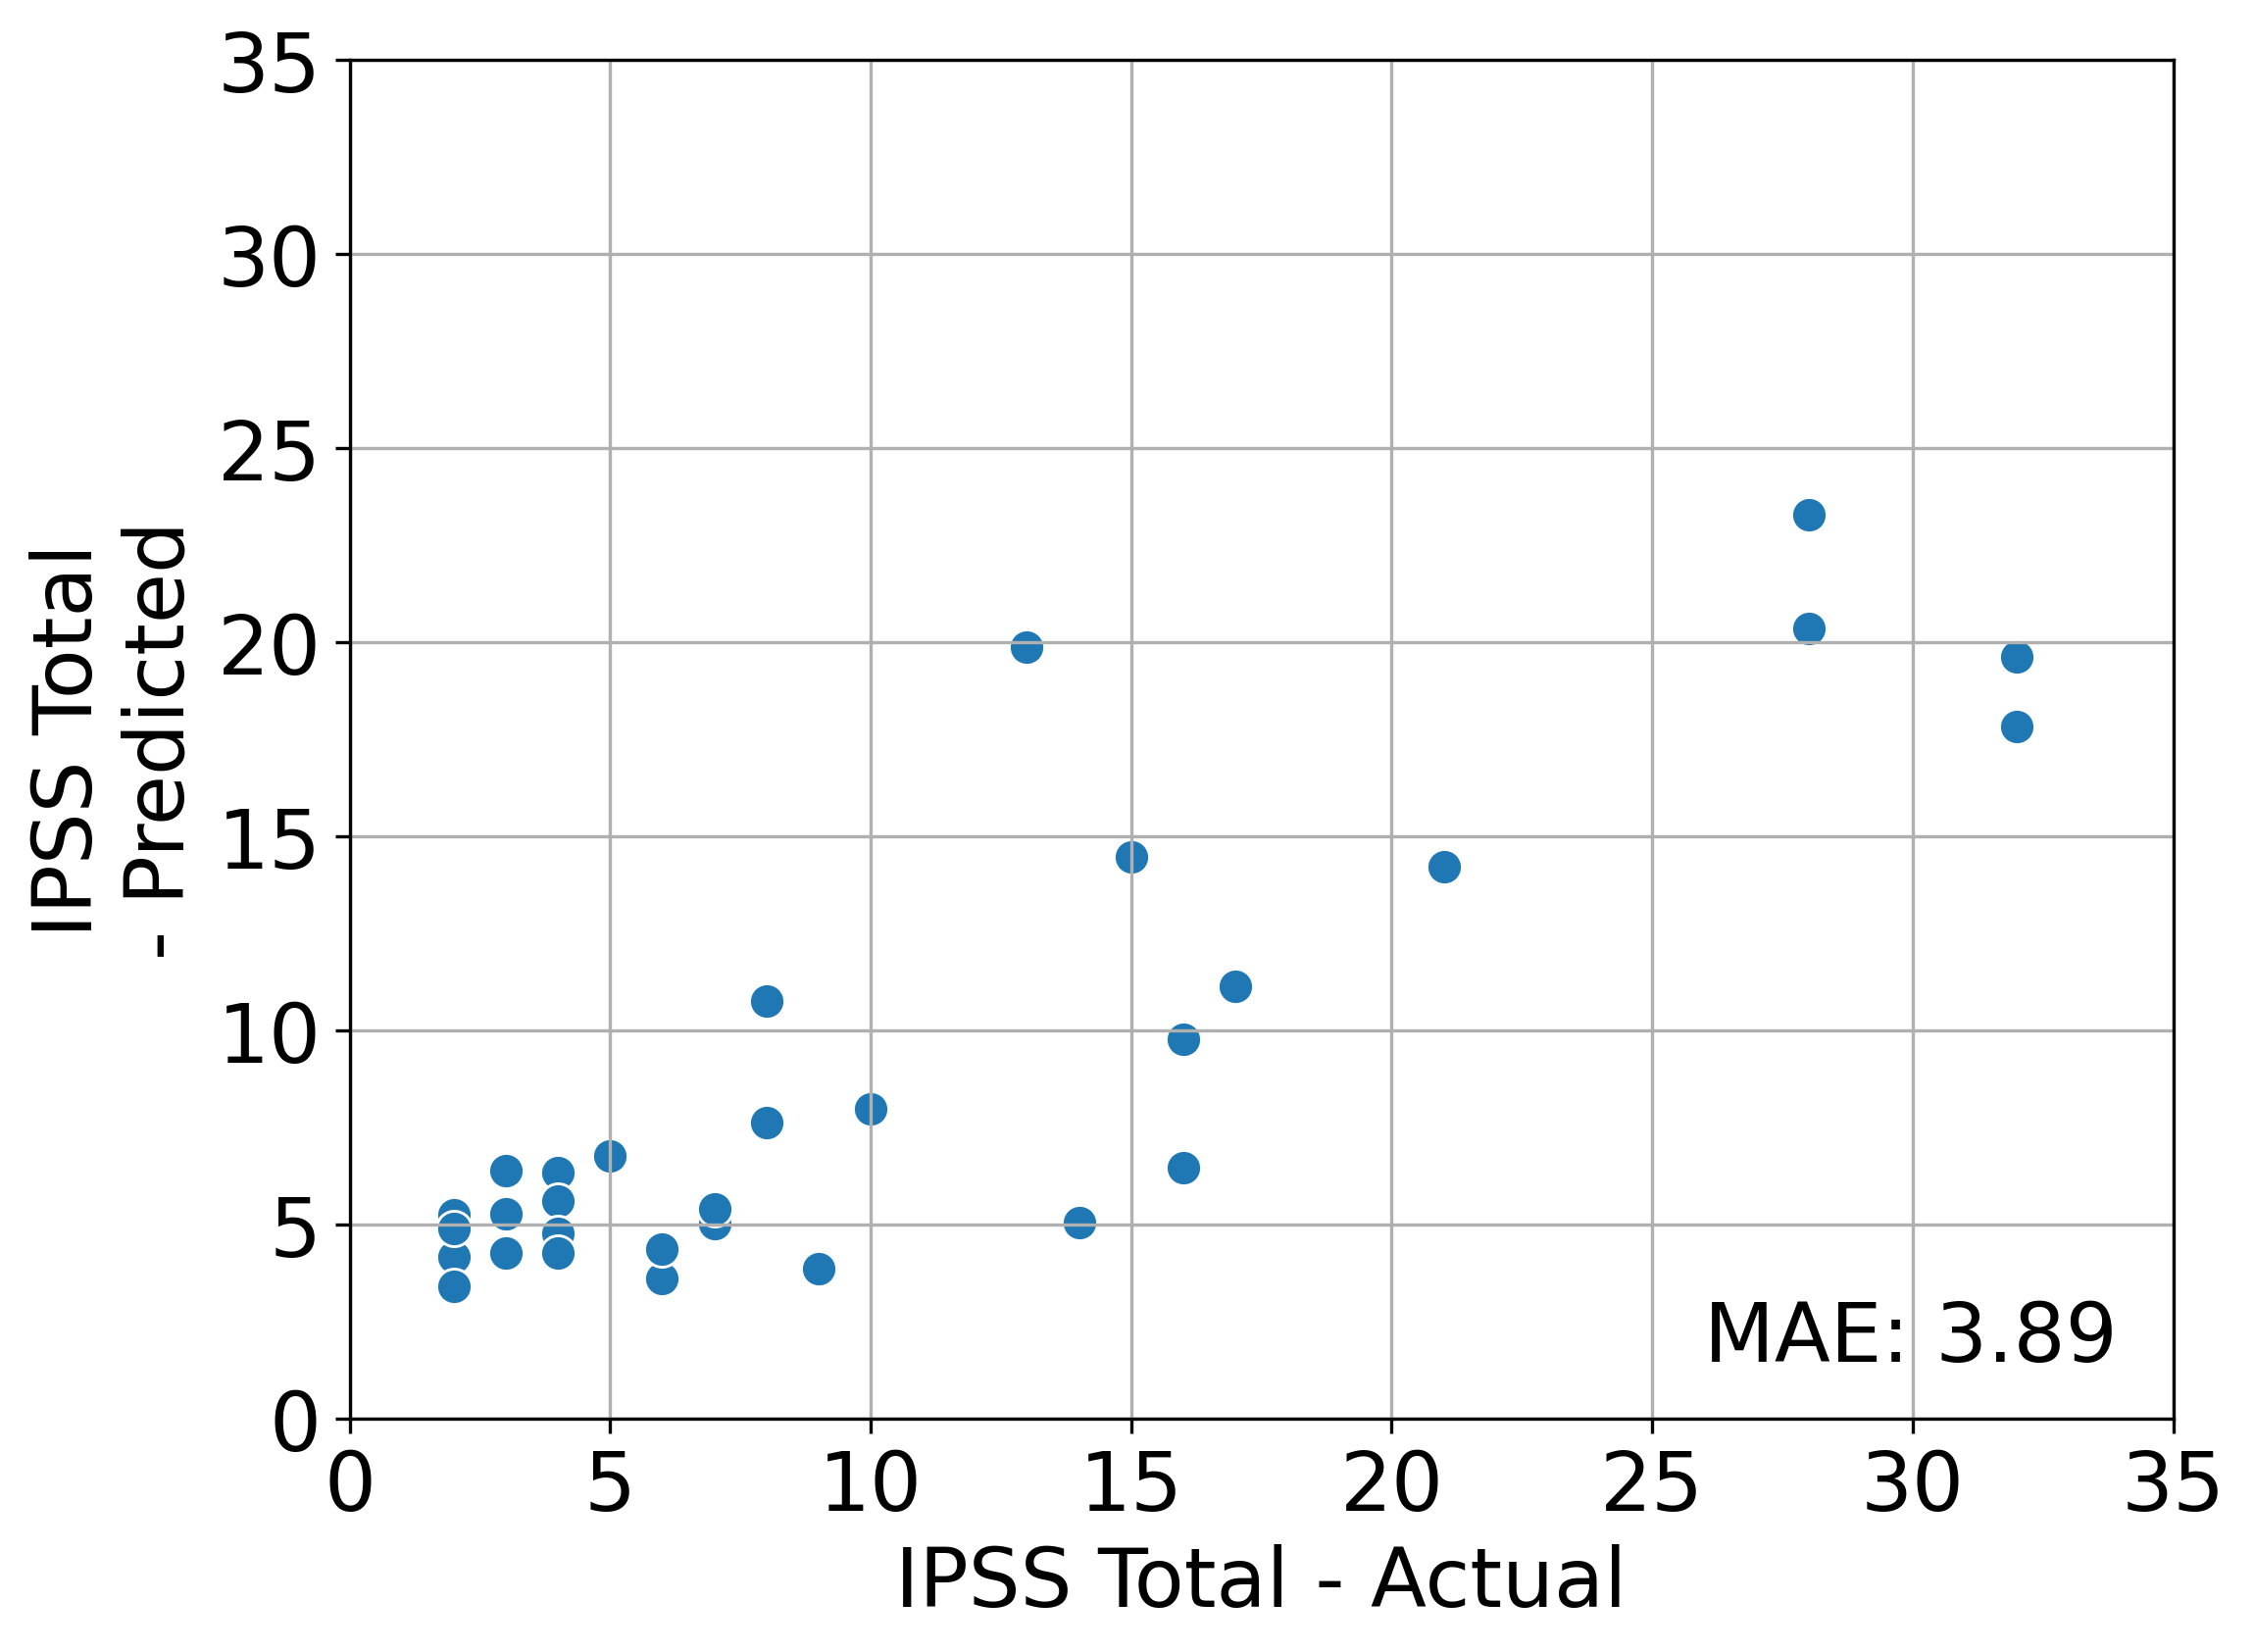

In [65]:
# Plot predictions vs. actual
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions, s=75
)
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/support_vector_regression_predict_ipss_total_from_all_epic_urinary_questions_plot.png", bbox_inches='tight')

### K-Neighbors Regressor

In [66]:
# Create and train model
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_cv = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions={
        "n_neighbors": range(1, 10),
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
        "leaf_size": range(1, 50),
        "p": [1, 2],
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

kneighbors_predict_ipss_total_from_all_epic_urinary_questions_cv.fit(X_train_all_epic_urinary_questions, y_train_ipss_total)
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END algorithm=brute, leaf_size=37, n_neighbors=8, p=2, weights=uniform;, score=-2.538 total time=   0.0s
[CV 2/4] END algorithm=brute, leaf_size=37, n_neighbors=8, p=2, weights=uniform;, score=-3.253 total time=   0.0s
[CV 3/4] END algorithm=brute, leaf_size=37, n_neighbors=8, p=2, weights=uniform;, score=-2.557 total time=   0.0s
[CV 4/4] END algorithm=brute, leaf_size=37, n_neighbors=8, p=2, weights=uniform;, score=-3.161 total time=   0.0s
[CV 1/4] END algorithm=brute, leaf_size=5, n_neighbors=5, p=1, weights=uniform;, score=-2.950 total time=   0.0s
[CV 2/4] END algorithm=brute, leaf_size=5, n_neighbors=5, p=1, weights=uniform;, score=-3.239 total time=   0.0s
[CV 3/4] END algorithm=brute, leaf_size=5, n_neighbors=5, p=1, weights=uniform;, score=-2.783 total time=   0.0s
[CV 4/4] END algorithm=brute, leaf_size=5, n_neighbors=5, p=1, weights=uniform;, score=-2.737 total time=   0.0s
[CV 1/4] END algorithm=ball_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 28,
 'algorithm': 'kd_tree'}

In [67]:
# Make predictions for test set
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_predictions = kneighbors_predict_ipss_total_from_all_epic_urinary_questions_cv.predict(
    X_test_all_epic_urinary_questions
)
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_predictions

array([ 5.  ,  5.  ,  4.75,  7.25,  5.  ,  8.5 ,  6.75,  4.  ,  2.  ,
        3.5 ,  2.25,  3.5 ,  7.75,  2.5 , 10.  ,  3.75, 12.75,  5.  ,
        6.  , 11.  ,  2.25, 16.5 ,  6.25,  2.25,  5.  ,  2.25,  6.5 ,
       13.5 ,  3.75, 10.5 , 14.5 ,  2.25,  6.75])

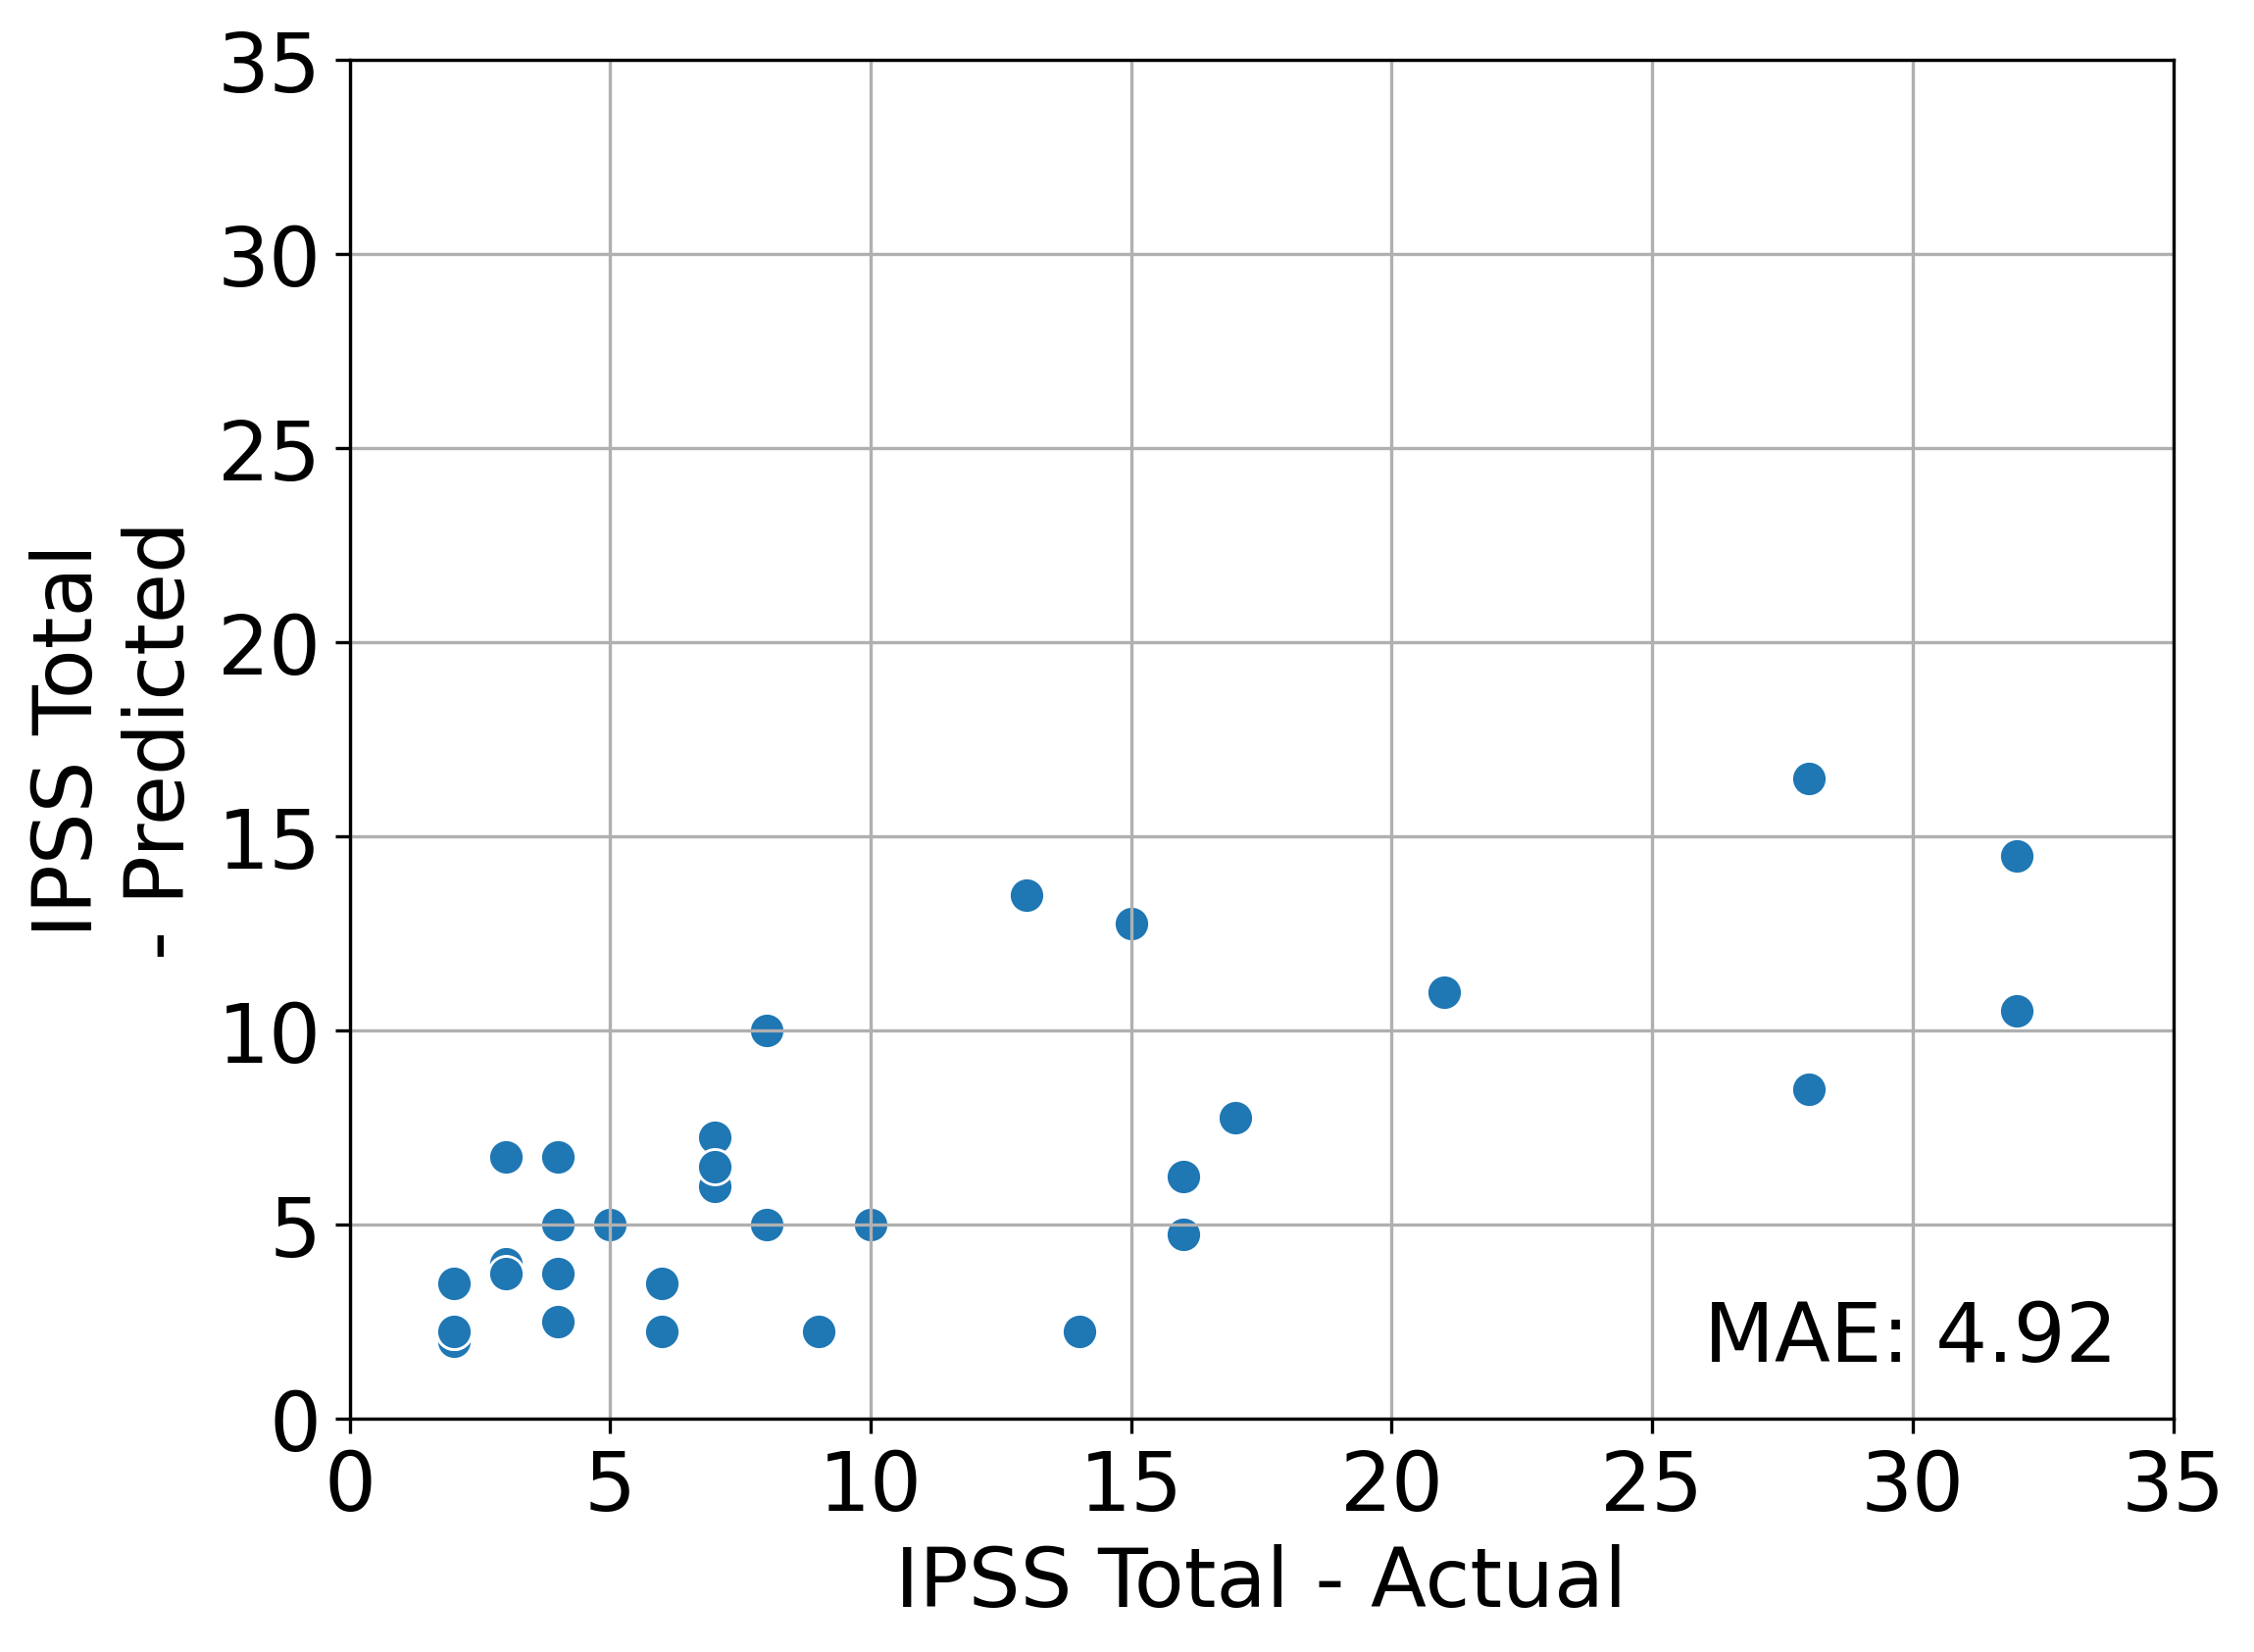

In [70]:
# Plot predictions vs. actual
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=kneighbors_predict_ipss_total_from_all_epic_urinary_questions_predictions, s=75
)
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
kneighbors_predict_ipss_total_from_all_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, kneighbors_predict_ipss_total_from_all_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {kneighbors_predict_ipss_total_from_all_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/kneighbors_predict_ipss_total_from_all_epic_urinary_questions_plot.png", bbox_inches='tight')

### XGBoost

In [71]:
# Create and train model
xgboost_predict_ipss_total_from_all_epic_urinary_questions_cv = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions={
        "learning_rate": loguniform(1e-2, 1),
        "gamma": range(0, 5),
        "max_depth": range(1, 8),
        "min_child_weight": range(1, 8),
        "lambda": loguniform(1e-5, 10),
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

xgboost_predict_ipss_total_from_all_epic_urinary_questions_cv.fit(X_train_all_epic_urinary_questions, y_train_ipss_total)
xgboost_predict_ipss_total_from_all_epic_urinary_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END gamma=2, lambda=3.803560365821079e-05, learning_rate=0.9032815199482508, max_depth=7, min_child_weight=6;, score=-3.490 total time=   0.1s
[CV 2/4] END gamma=2, lambda=3.803560365821079e-05, learning_rate=0.9032815199482508, max_depth=7, min_child_weight=6;, score=-3.704 total time=   0.1s
[CV 3/4] END gamma=2, lambda=3.803560365821079e-05, learning_rate=0.9032815199482508, max_depth=7, min_child_weight=6;, score=-3.891 total time=   0.2s
[CV 4/4] END gamma=2, lambda=3.803560365821079e-05, learning_rate=0.9032815199482508, max_depth=7, min_child_weight=6;, score=-2.465 total time=   0.1s
[CV 1/4] END gamma=1, lambda=0.10587248795898534, learning_rate=0.05306699606543194, max_depth=4, min_child_weight=7;, score=-2.552 total time=   0.0s
[CV 2/4] END gamma=1, lambda=0.10587248795898534, learning_rate=0.05306699606543194, max_depth=4, min_child_weight=7;, score=-3.403 total time=   0.0s
[CV 3/4] END gamma=1, lamb

{'gamma': 3,
 'lambda': 0.030155253554076104,
 'learning_rate': 0.18414449003480837,
 'max_depth': 1,
 'min_child_weight': 3}

In [72]:
# Make predictions for test set
xgboost_predict_ipss_total_from_all_epic_urinary_questions_predictions = xgboost_predict_ipss_total_from_all_epic_urinary_questions_cv.predict(
    X_test_all_epic_urinary_questions
)
xgboost_predict_ipss_total_from_all_epic_urinary_questions_predictions

array([ 5.412283 ,  7.075701 ,  7.9081135,  6.6610956,  7.3886557,
       19.880924 ,  5.730684 ,  4.579755 ,  3.7588906,  5.5895147,
        3.7588906,  4.6591015,  9.614092 ,  4.9516764,  7.2254534,
        4.2668004, 12.546118 ,  6.153873 ,  5.730684 , 13.176651 ,
        4.0718436, 14.841203 , 10.79091  ,  6.8807425, 11.960704 ,
        3.7588906,  5.6513376, 14.143984 ,  4.2668004, 13.439146 ,
       17.687548 ,  4.579755 ,  7.3886557], dtype=float32)

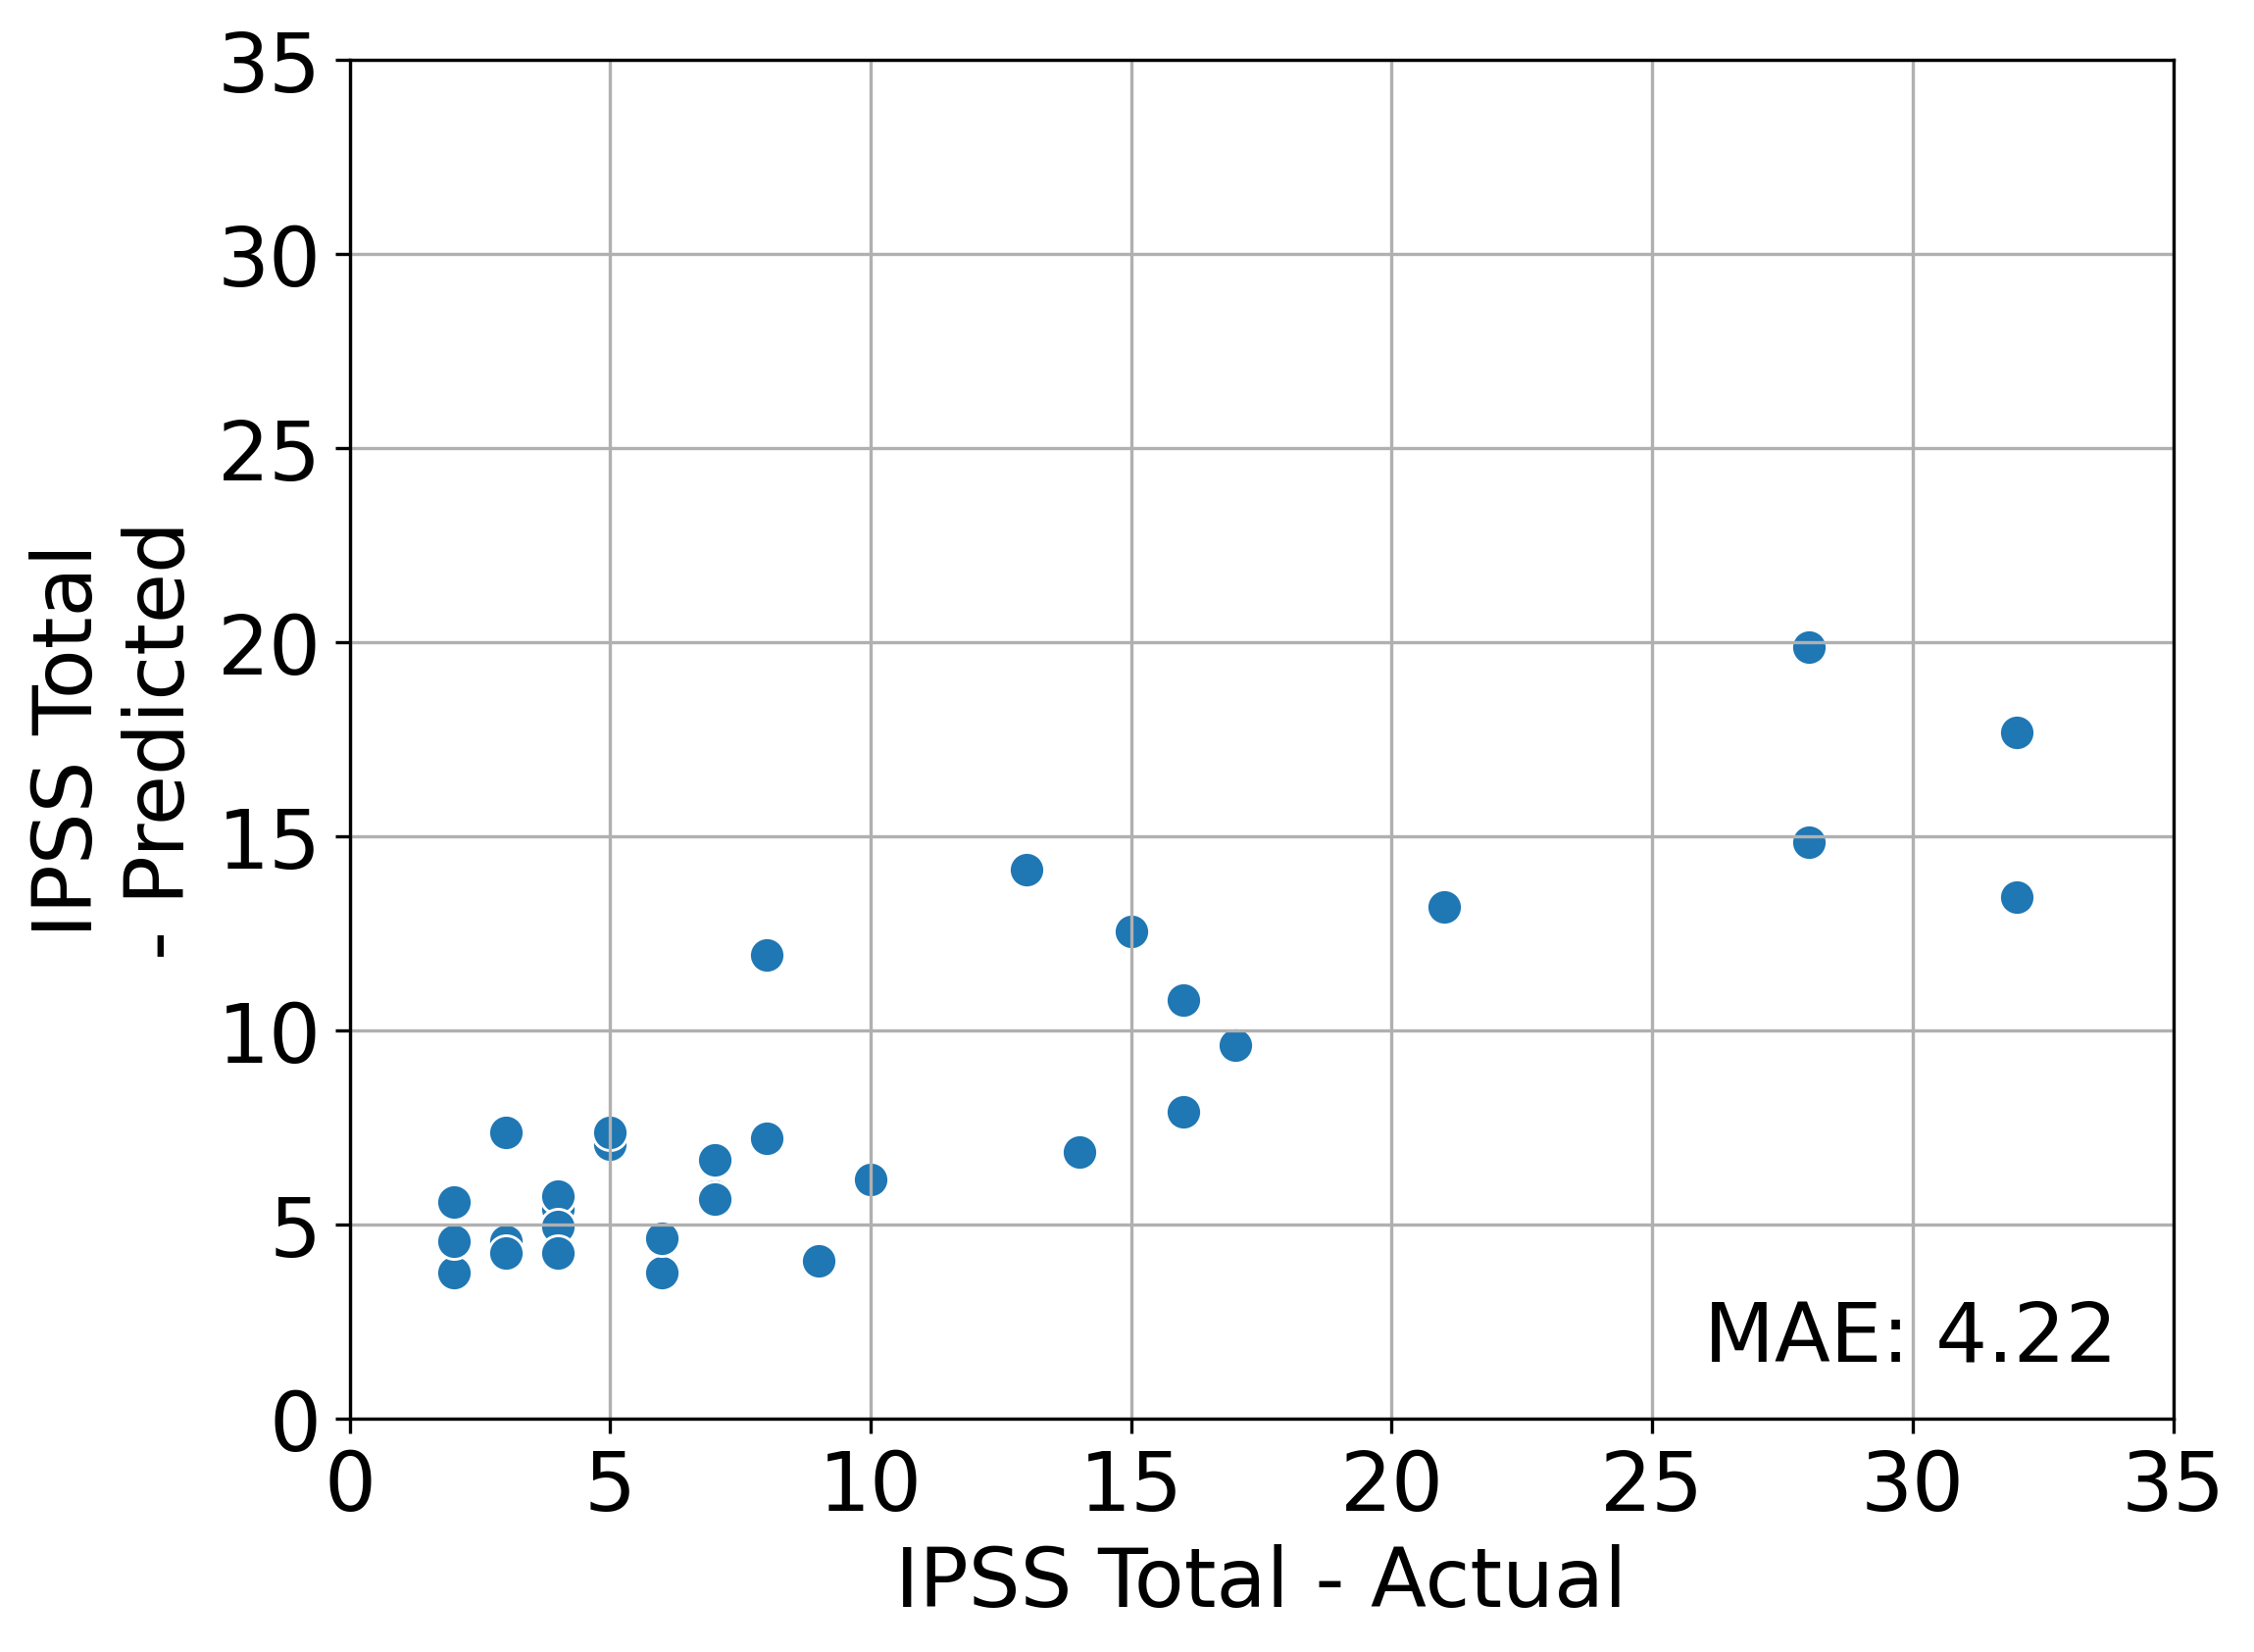

In [73]:
# Plot predictions vs. actual
xgboost_predict_ipss_total_from_all_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=xgboost_predict_ipss_total_from_all_epic_urinary_questions_predictions, s=75
)
xgboost_predict_ipss_total_from_all_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
xgboost_predict_ipss_total_from_all_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
xgboost_predict_ipss_total_from_all_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, xgboost_predict_ipss_total_from_all_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {xgboost_predict_ipss_total_from_all_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/xgboost_predict_ipss_total_from_all_epic_urinary_questions_plot.png", bbox_inches='tight')

## Predict IPSS total using only relevant EPIC urinary questions

### Linear regression

In [75]:
# Create and train model
# RandomizedSearchCV is only used for cross validation
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_cv = estimator = RandomizedSearchCV(
    LinearRegression(),
    param_distributions={},
    n_iter=1,
    scoring="neg_mean_absolute_error",
    cv=4,
)
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_cv.fit(
    X_train_relevant_epic_urinary_questions, y_train_ipss_total
)

RandomizedSearchCV(cv=4, estimator=LinearRegression(), n_iter=1,
                   param_distributions={}, scoring='neg_mean_absolute_error')

In [76]:
# Make predictions for test set
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions = (
    linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_cv.predict(X_test_relevant_epic_urinary_questions)
)
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions

array([ 3.06184037,  6.33590844,  6.48304959,  4.10414934,  6.33590844,
       20.46740285,  4.10414934,  3.06184037,  1.87239024,  3.06184037,
        1.87239024,  3.06184037, 10.79942663,  3.06184037,  7.33966041,
        3.06184037, 16.08099864,  7.48680157,  4.10414934, 16.2281398 ,
        1.87239024, 19.31650972,  7.52535856,  3.95700818, 10.42803033,
        1.87239024,  4.10414934, 20.50595984,  3.06184037, 18.27420075,
       20.50595984,  3.06184037,  6.33590844])

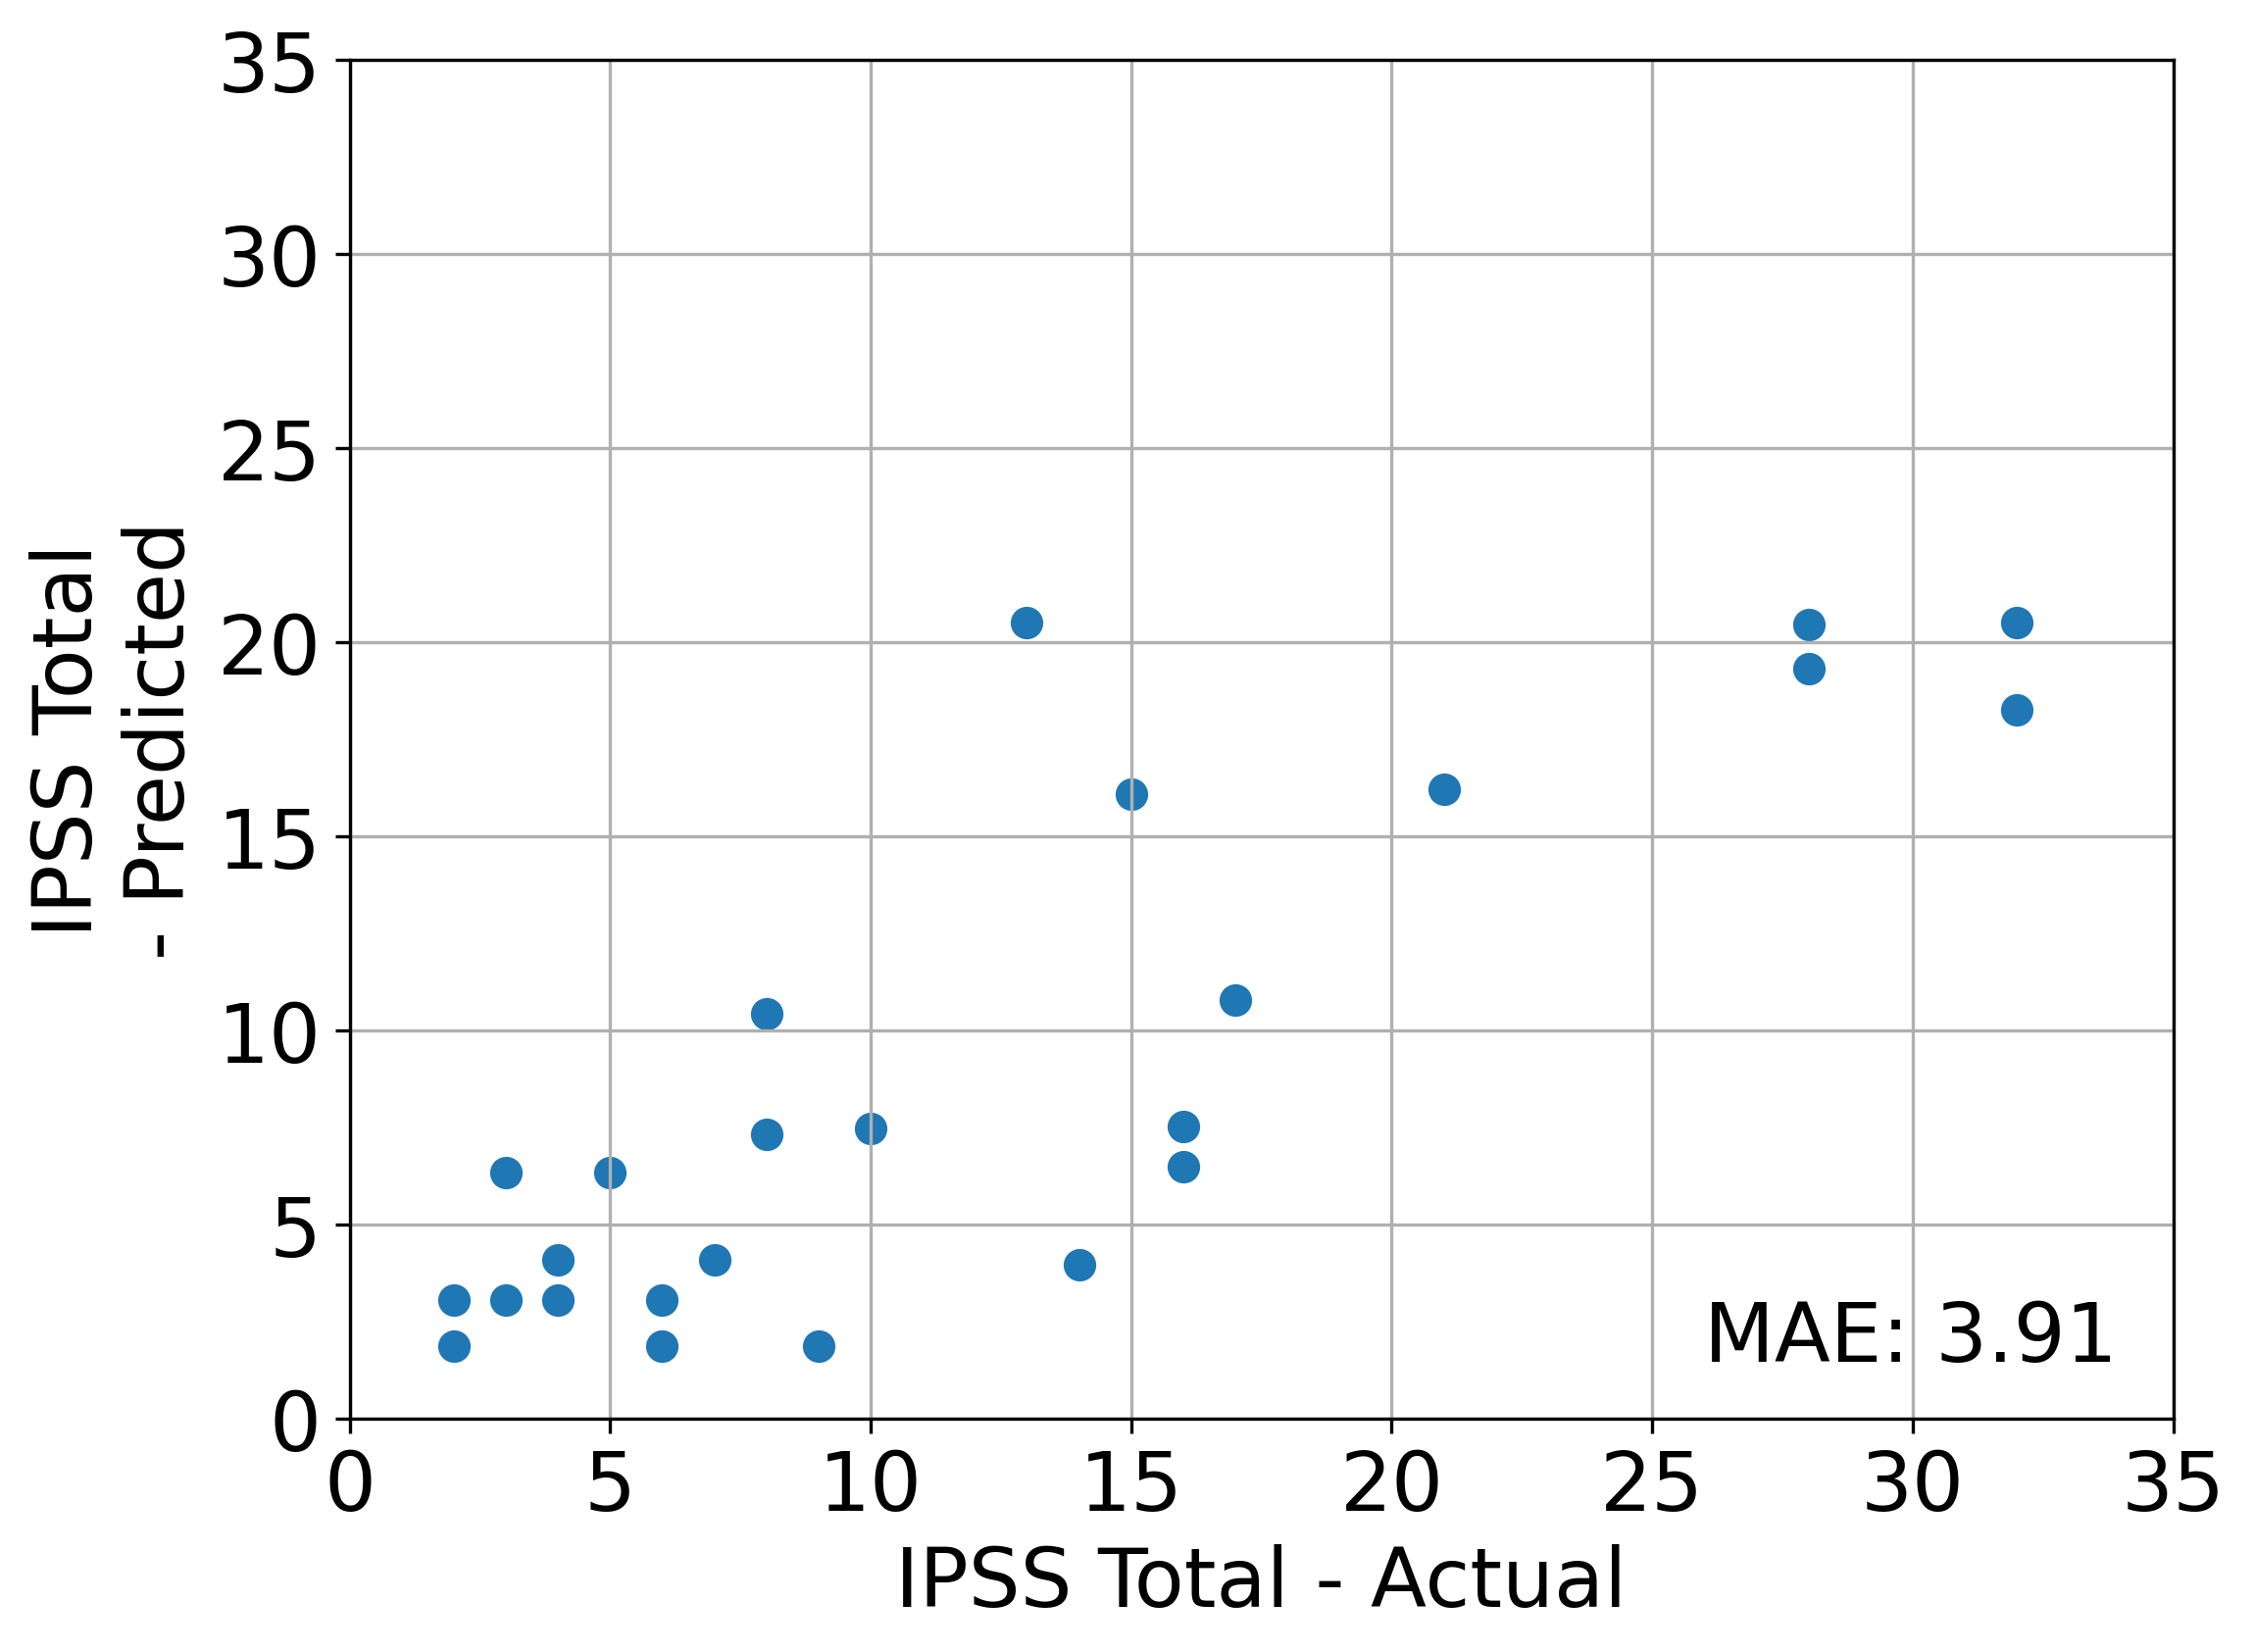

In [77]:
# Plot predictions vs. actual
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions, s=75
)
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/linear_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot.png", bbox_inches='tight')

### Support Vector Regression

In [78]:
# Create and train model
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_cv = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions={
        "kernel": ("linear", "poly", "rbf", "sigmoid"),
        "C": loguniform(1, 1e2),
        "epsilon": loguniform(1e-3, 1),
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_cv.fit(
    X_train_relevant_epic_urinary_questions, y_train_ipss_total
)
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END C=19.56056237975431, epsilon=0.01611593409753372, kernel=linear;, score=-2.082 total time=   0.0s
[CV 2/4] END C=19.56056237975431, epsilon=0.01611593409753372, kernel=linear;, score=-3.122 total time=   0.0s
[CV 3/4] END C=19.56056237975431, epsilon=0.01611593409753372, kernel=linear;, score=-2.704 total time=   0.0s
[CV 4/4] END C=19.56056237975431, epsilon=0.01611593409753372, kernel=linear;, score=-3.010 total time=   0.0s
[CV 1/4] END C=12.89663651996453, epsilon=0.6286286504966189, kernel=linear;, score=-2.079 total time=   0.0s
[CV 2/4] END C=12.89663651996453, epsilon=0.6286286504966189, kernel=linear;, score=-3.095 total time=   0.0s
[CV 3/4] END C=12.89663651996453, epsilon=0.6286286504966189, kernel=linear;, score=-2.603 total time=   0.0s
[CV 4/4] END C=12.89663651996453, epsilon=0.6286286504966189, kernel=linear;, score=-2.915 total time=   0.0s
[CV 1/4] END C=3.502979547715091, epsilon=0.01062258

{'C': 12.89663651996453, 'epsilon': 0.6286286504966189, 'kernel': 'linear'}

In [80]:
# Make predictions for test set
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions = (
    support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_cv.predict(
        X_test_relevant_epic_urinary_questions
    )
)
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions

array([ 2.62857781,  5.62847417,  5.62868145,  3.62847417,  5.62847417,
       18.63104166,  3.62847417,  2.62857781,  1.62847417,  2.62857781,
        1.62847417,  2.62857781,  9.62847417,  2.62857781,  6.62909013,
        2.62857781, 14.62960245,  6.62929742,  3.62847417, 14.62980973,
        1.62847417, 17.63021841,  6.62857781,  3.62826688,  9.62949881,
        1.62847417,  3.62847417, 18.63032205,  2.62857781, 16.63032205,
       18.63032205,  2.62857781,  5.62847417])

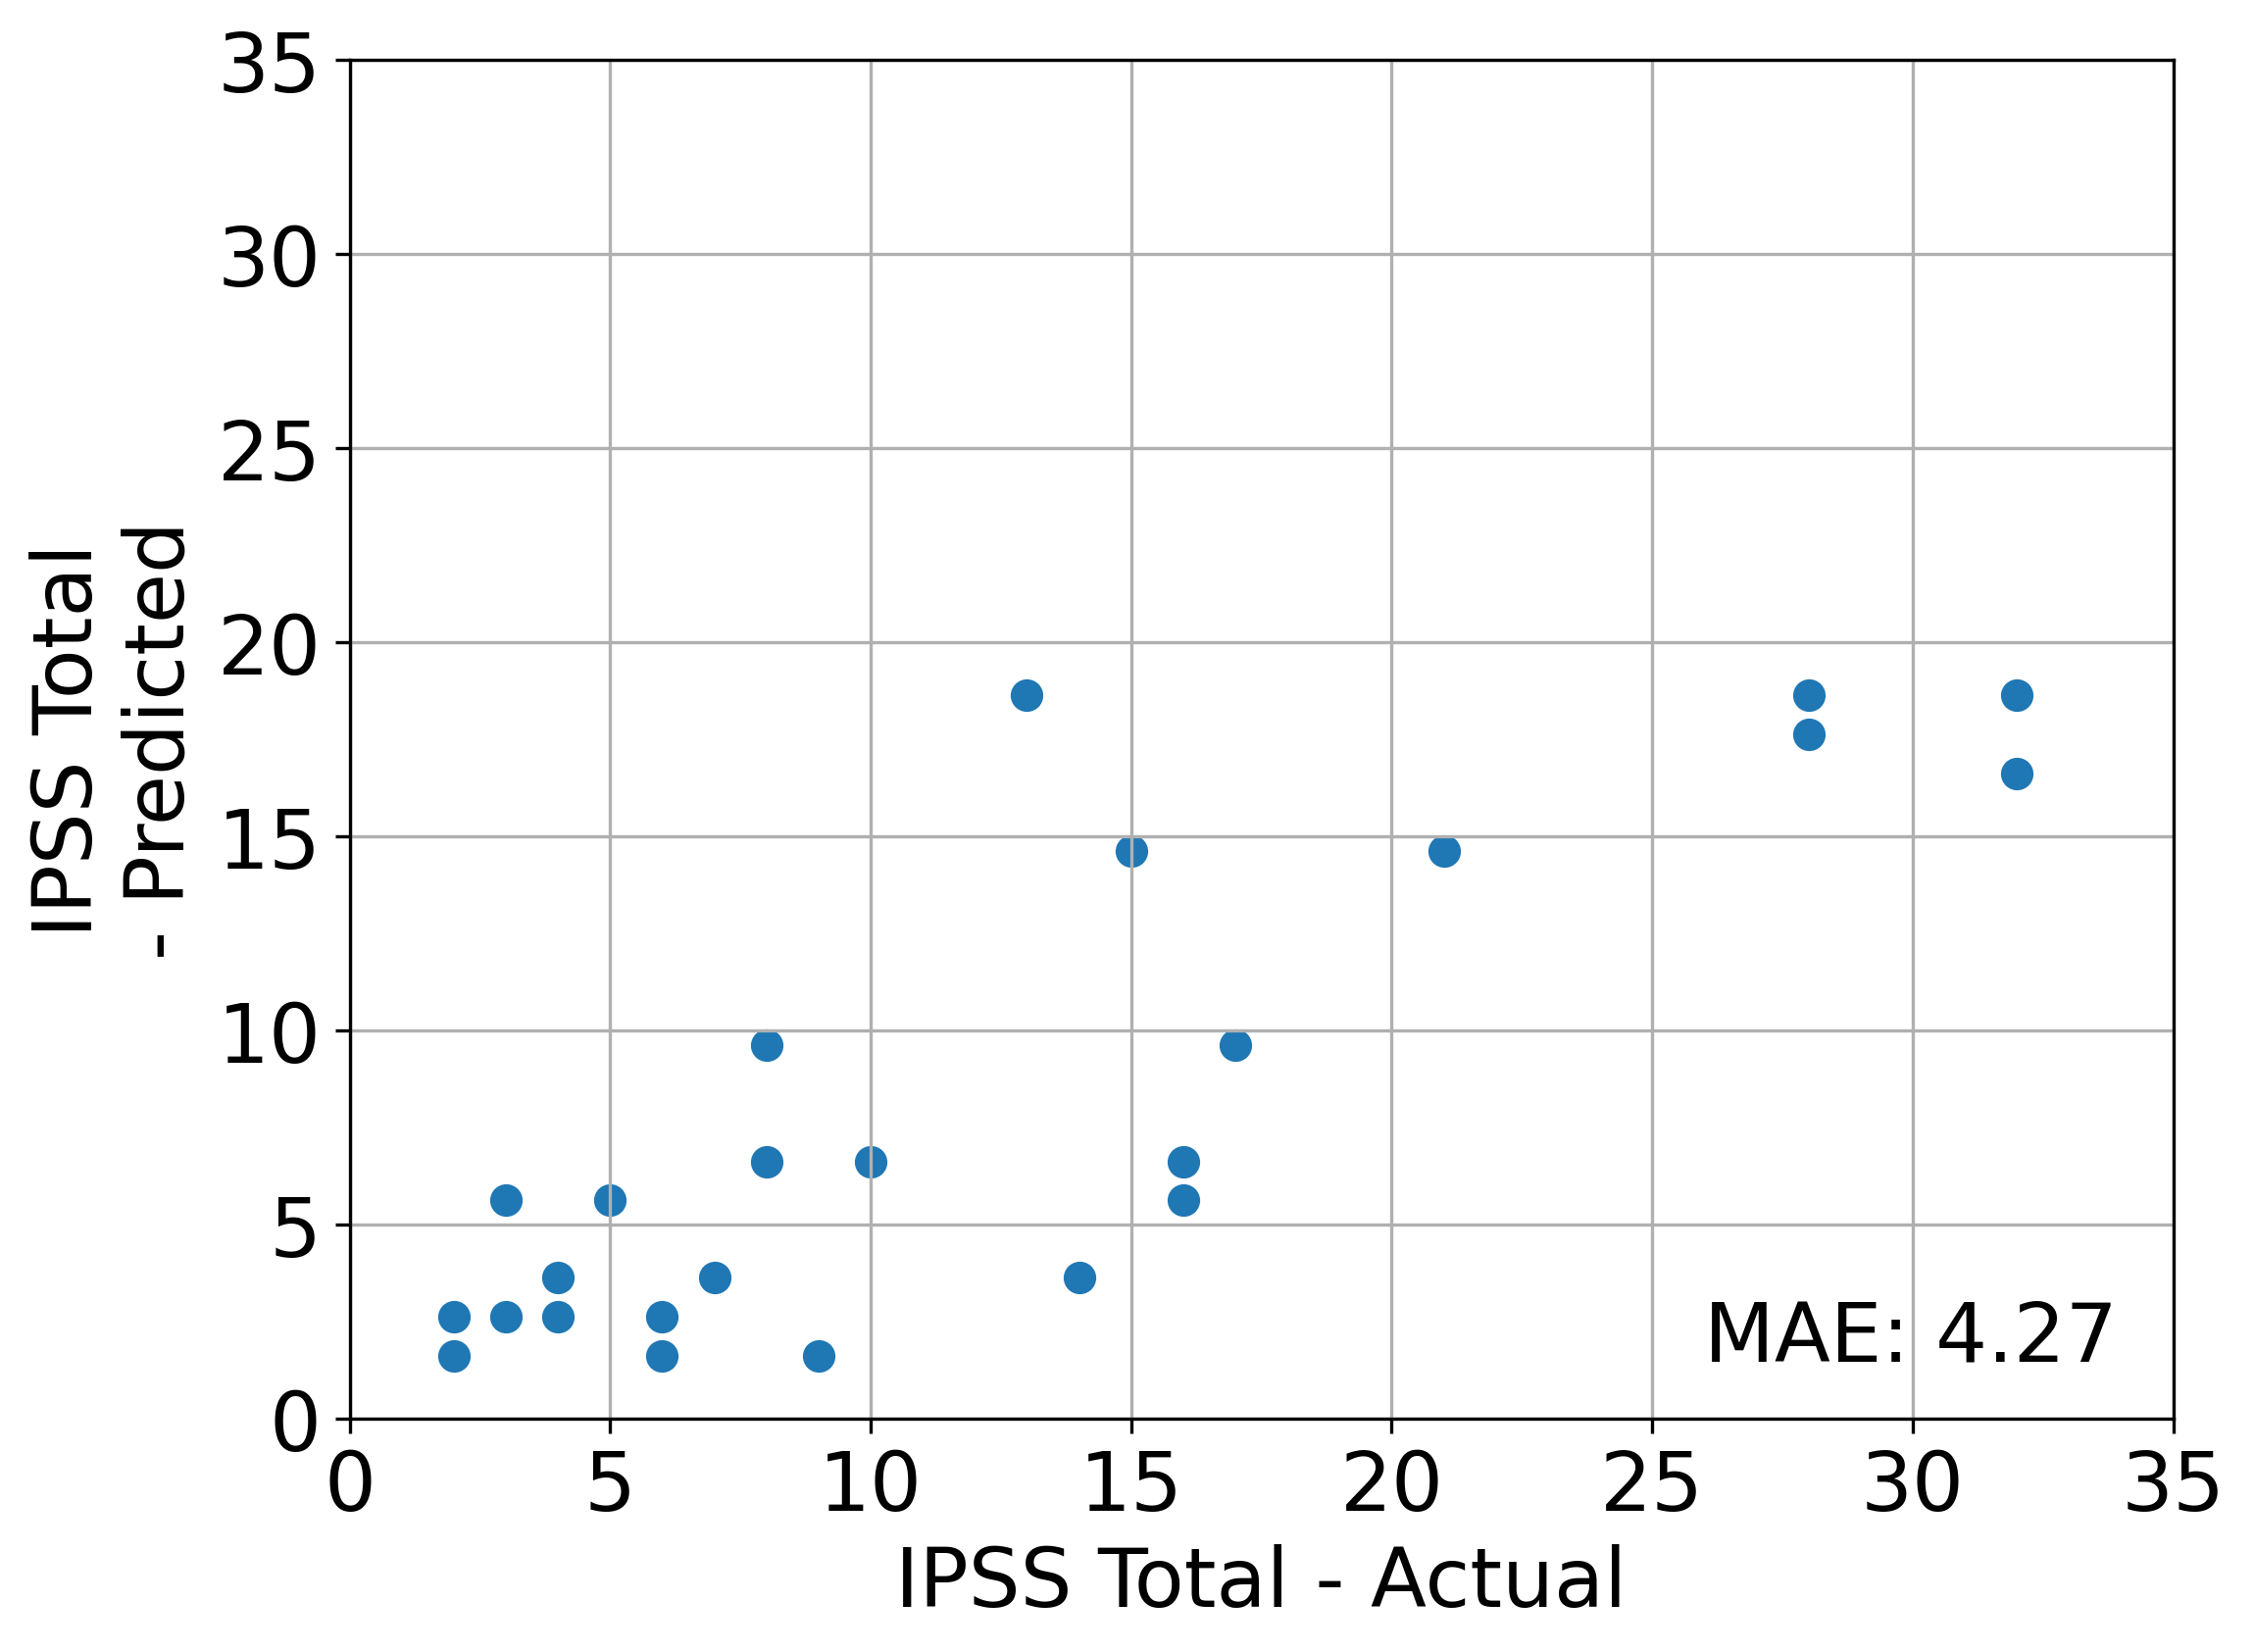

In [81]:
# Plot predictions vs. actual
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions, s=75
)
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/support_vector_regression_predict_ipss_total_from_relevant_epic_urinary_questions_plot.png", bbox_inches='tight')

### K-Neighbors Regressor

In [82]:
# Create and train model
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_cv = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions={
        "n_neighbors": range(1, 10),
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
        "leaf_size": range(1, 50),
        "p": [1, 2],
    },
    n_iter=250,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_cv.fit(X_train_relevant_epic_urinary_questions, y_train_ipss_total)
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_cv.best_params_

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
[CV 1/4] END algorithm=ball_tree, leaf_size=12, n_neighbors=4, p=2, weights=uniform;, score=-2.458 total time=   0.0s
[CV 2/4] END algorithm=ball_tree, leaf_size=12, n_neighbors=4, p=2, weights=uniform;, score=-3.243 total time=   0.0s
[CV 3/4] END algorithm=ball_tree, leaf_size=12, n_neighbors=4, p=2, weights=uniform;, score=-2.700 total time=   0.0s
[CV 4/4] END algorithm=ball_tree, leaf_size=12, n_neighbors=4, p=2, weights=uniform;, score=-3.029 total time=   0.0s
[CV 1/4] END algorithm=brute, leaf_size=9, n_neighbors=7, p=2, weights=distance;, score=-2.305 total time=   0.0s
[CV 2/4] END algorithm=brute, leaf_size=9, n_neighbors=7, p=2, weights=distance;, score=-3.867 total time=   0.0s
[CV 3/4] END algorithm=brute, leaf_size=9, n_neighbors=7, p=2, weights=distance;, score=-2.868 total time=   0.0s
[CV 4/4] END algorithm=brute, leaf_size=9, n_neighbors=7, p=2, weights=distance;, score=-2.910 total time=   0.0s
[CV 1/4]

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 9,
 'leaf_size': 27,
 'algorithm': 'kd_tree'}

In [83]:
# Make predictions for test set
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_predictions = (
    kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_cv.predict(X_test_relevant_epic_urinary_questions)
)
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_predictions

array([ 2.33333333,  7.33333333,  4.55555556,  5.44444444,  7.33333333,
       18.44444444,  5.44444444,  2.33333333,  1.11111111,  2.33333333,
        1.11111111,  2.33333333, 10.22222222,  2.33333333,  7.11111111,
        2.33333333, 16.33333333,  5.55555556,  5.44444444, 15.55555556,
        1.11111111, 17.33333333,  7.66666667,  6.66666667,  9.        ,
        1.11111111,  5.44444444, 17.33333333,  2.33333333, 17.22222222,
       17.33333333,  2.33333333,  7.33333333])

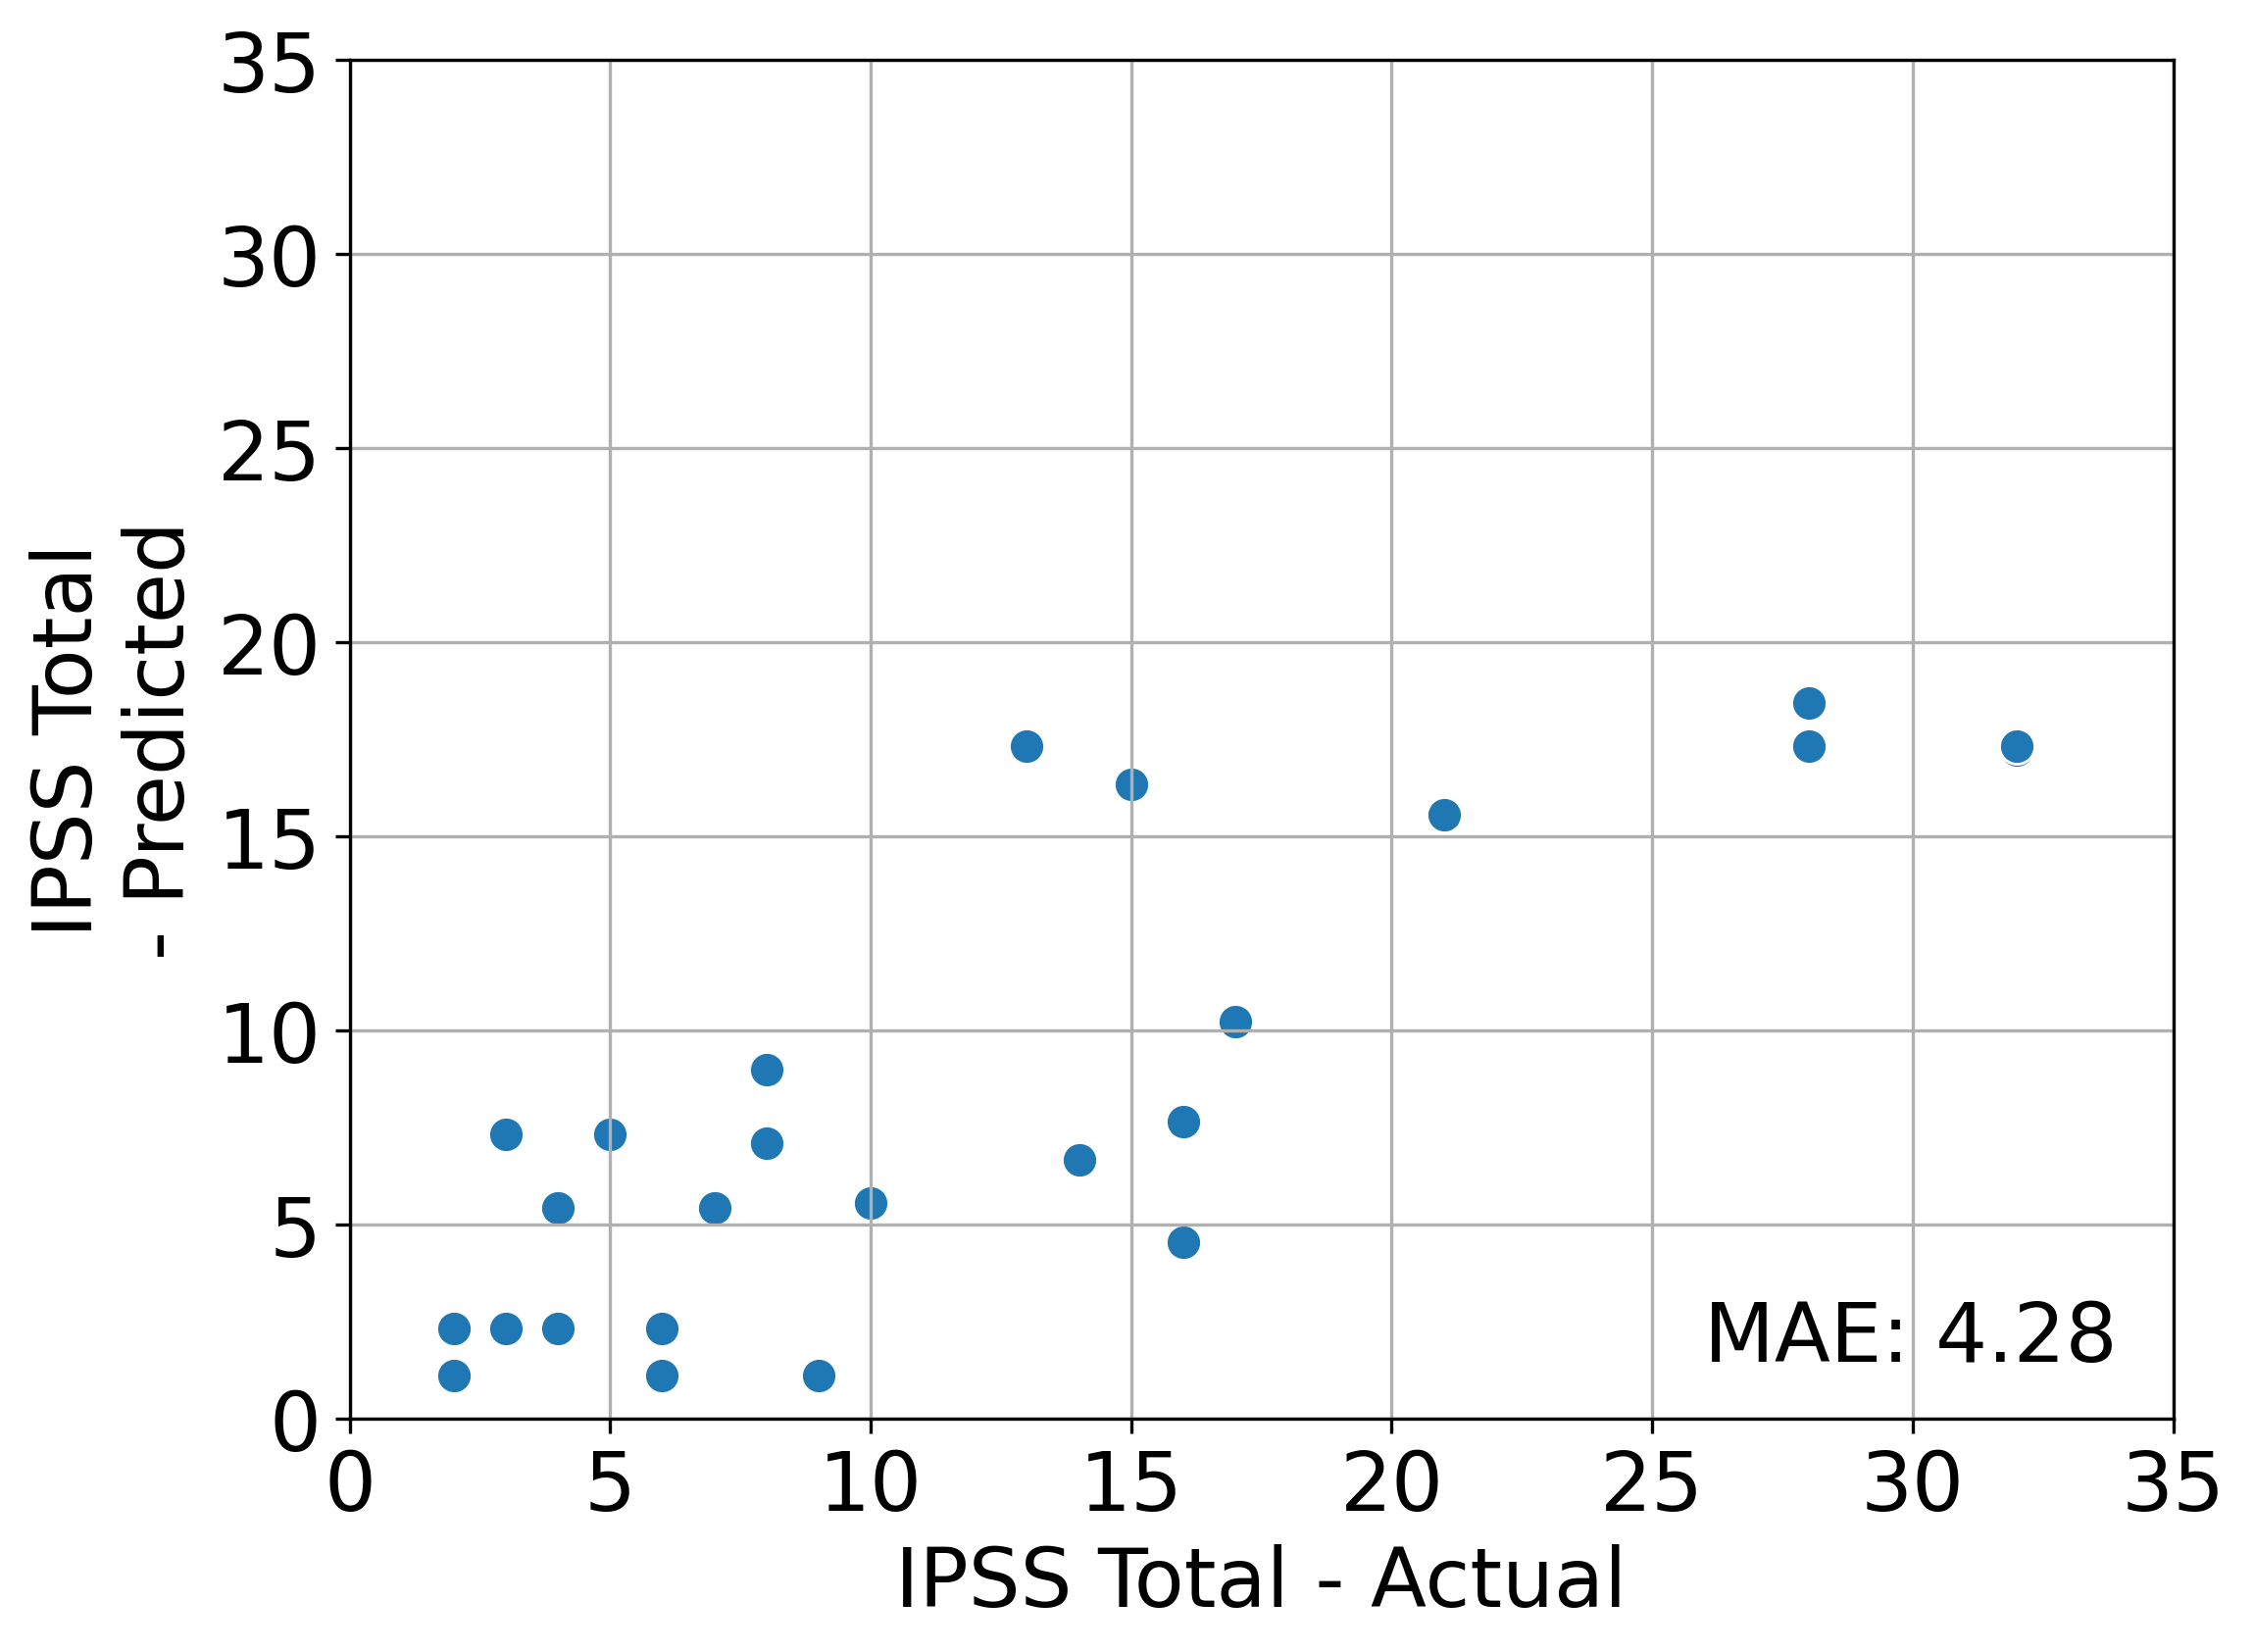

In [84]:
# Plot predictions vs. actual
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_predictions, s=75
)
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/kneighbors_predict_ipss_total_from_relevant_epic_urinary_questions_plot.png", bbox_inches='tight')

### XGBoost

In [85]:
# Create and train model
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_cv = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions={
        "learning_rate": loguniform(1e-2, 1),
        "gamma": range(0, 5),
        "max_depth": range(1, 8),
        "min_child_weight": range(1, 8),
        "lambda": loguniform(1e-5, 10),
    },
    n_iter=125,
    cv=4,
    scoring="neg_mean_absolute_error",
    verbose=3,
)

xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_cv.fit(X_train_relevant_epic_urinary_questions, y_train_ipss_total)
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_cv.best_params_

Fitting 4 folds for each of 125 candidates, totalling 500 fits
[CV 1/4] END gamma=0, lambda=0.13011657936296922, learning_rate=0.13951334221805028, max_depth=2, min_child_weight=1;, score=-2.492 total time=   0.1s
[CV 2/4] END gamma=0, lambda=0.13011657936296922, learning_rate=0.13951334221805028, max_depth=2, min_child_weight=1;, score=-3.347 total time=   0.0s
[CV 3/4] END gamma=0, lambda=0.13011657936296922, learning_rate=0.13951334221805028, max_depth=2, min_child_weight=1;, score=-2.661 total time=   0.1s
[CV 4/4] END gamma=0, lambda=0.13011657936296922, learning_rate=0.13951334221805028, max_depth=2, min_child_weight=1;, score=-2.721 total time=   0.1s
[CV 1/4] END gamma=4, lambda=7.560652017069197e-05, learning_rate=0.06616542446729427, max_depth=1, min_child_weight=4;, score=-2.311 total time=   0.0s
[CV 2/4] END gamma=4, lambda=7.560652017069197e-05, learning_rate=0.06616542446729427, max_depth=1, min_child_weight=4;, score=-2.983 total time=   0.0s
[CV 3/4] END gamma=4, lambd

{'gamma': 4,
 'lambda': 0.003409803422192996,
 'learning_rate': 0.048238820585120766,
 'max_depth': 2,
 'min_child_weight': 4}

In [86]:
# Make predictions for test set
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_predictions = (
    xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_cv.predict(X_test_relevant_epic_urinary_questions)
)
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_predictions

array([ 3.2402434,  7.6613955,  5.915992 ,  4.6331496,  7.6613955,
       22.338066 ,  4.6331496,  3.2402434,  2.2853427,  3.2402434,
        2.2853427,  3.2402434,  9.852384 ,  3.2402434,  6.6997976,
        3.2402434, 15.723757 ,  6.156207 ,  4.6331496, 17.626251 ,
        2.2853427, 17.467268 ,  8.944237 ,  6.994027 , 11.674938 ,
        2.2853427,  4.6331496, 19.369759 ,  3.2402434, 17.467268 ,
       19.369759 ,  3.2402434,  7.6613955], dtype=float32)

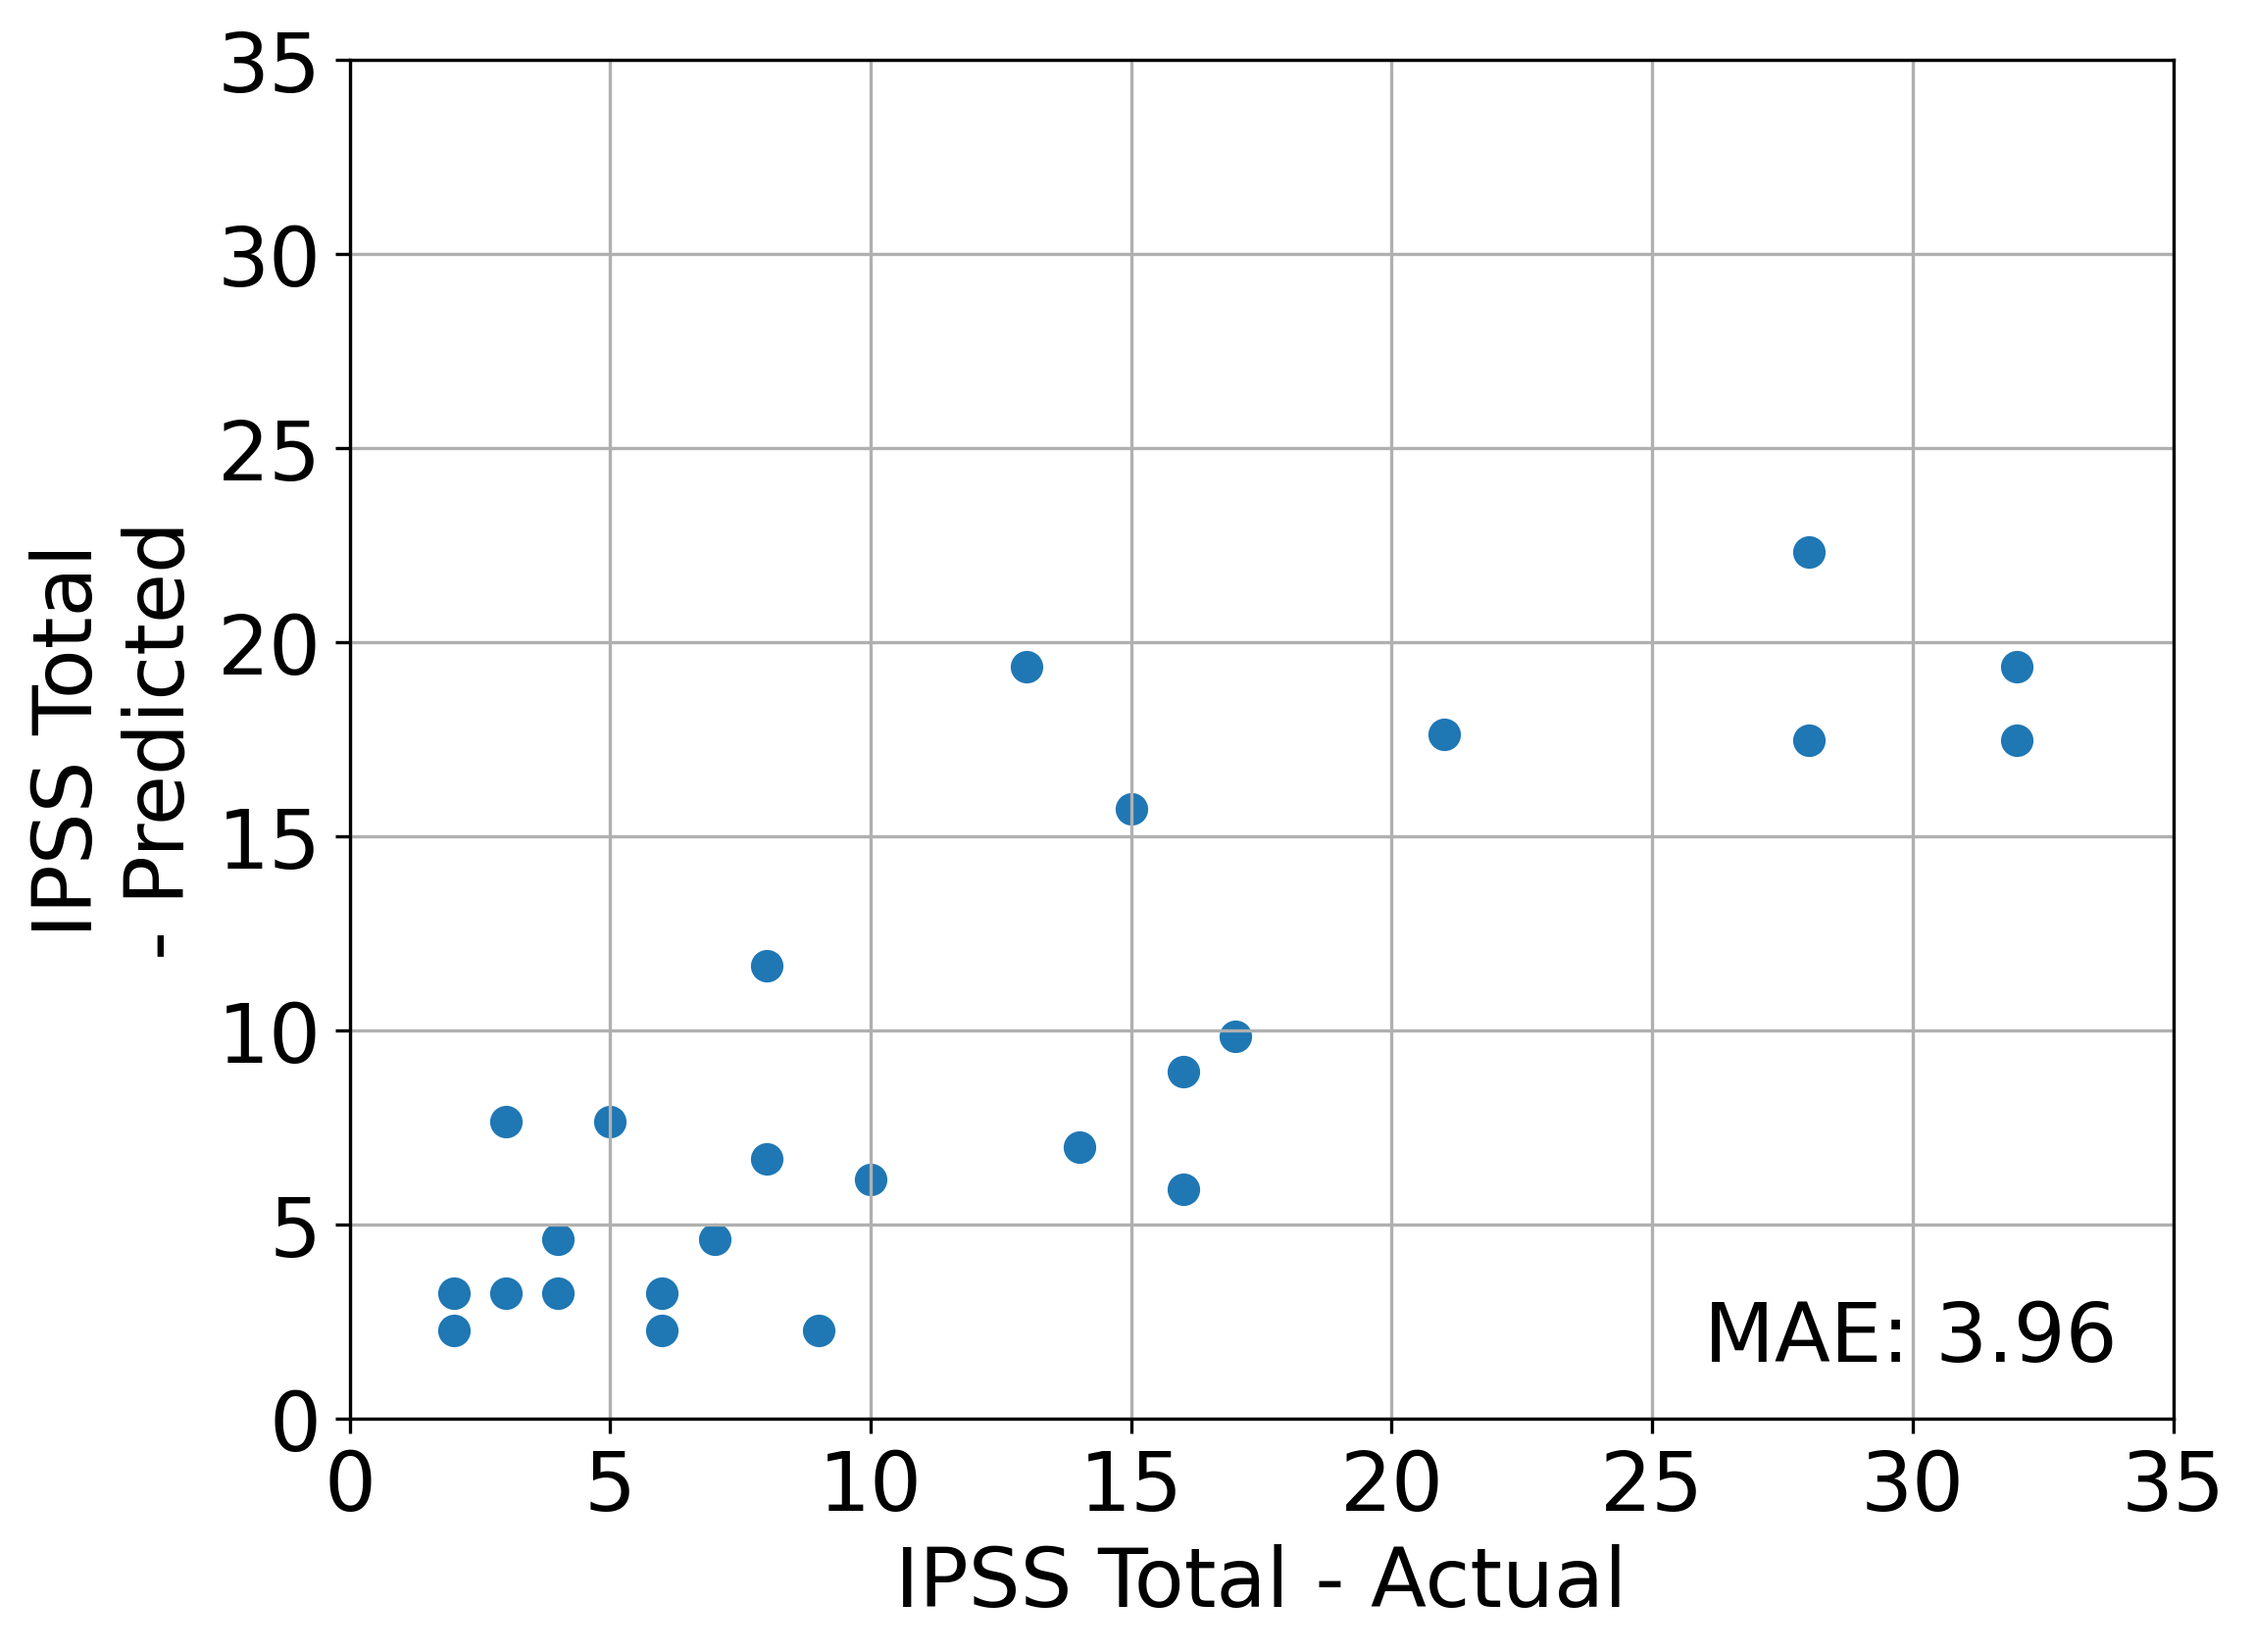

In [87]:
# Plot predictions vs. actual
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_plot = sns.scatterplot(
    x=y_test_ipss_total, y=xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_predictions, s=75
)
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(xlim=(0, 35), ylim=(0, 35))
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_plot.set(
    xlabel="IPSS Total - Actual", ylabel="IPSS Total\n- Predicted"
)

# Calculate and plot mean absolute error
xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_mae = mean_absolute_error(y_test_ipss_total, xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_predictions)
plt.text(26,1.5,f"MAE: {xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_mae:.2f}")

plt.grid()
plt.show
plt.savefig("plots/xgboost_predict_ipss_total_from_relevant_epic_urinary_questions_plot.png", bbox_inches='tight')